In [65]:
# Stop showing warnings
using Suppressor: @suppress_err

In [1]:
using Clustering
using MultivariateStats
using StatsBase
using CSV
using DataFrames
using CairoMakie
using GaussianMixtures

In [2]:
function ground_true(df_1, df_2)
    a = fill(1,nrow(df_1))
    b = fill(2,nrow(df_2))
    gt = cat(a,b, dims = 1)
    return gt
end

# convert tree from dataframe to matrix. Each column is a tree
function standardize_tree(tree)    
    data = collect(Matrix(tree[:,:])');
    
    # standardize tree
    dt = fit(ZScoreTransform, data, dims=2)
    data = StatsBase.transform(dt, data)
    
    # replace NaN value with 0
    replace!(data, NaN=>0)
    return data
end

function plot_clusters(tree, label)
    PCA_model = fit(PCA, tree, maxoutdim = 2);
    PCA_data = predict(PCA_model,tree)
    scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = label)
end

plot_clusters (generic function with 1 method)

In [3]:
using MLBase
using Hungarian
using LinearAlgebra

In [43]:
# n is the number of cluters
# remember standardize trees for better performance
function kmeans_label(tree, n; seed =:kmpp)  
    # apply kmeans clustering
    # init works like seed of random, Its length should be the same as the number of clusters    
    result = kmeans(tree, n, init = seed);
    return result.assignments
end;


function GMM_label(tree, n; method=:kmeans, kind=:diag)    
    data= tree';
    gmm=GMM(n,Array(data),method=method, kind=kind);
    prob_pos=gmmposterior(gmm,Array(data))[1]
    llpg = gmmposterior(gmm,Array(data))[2]
    llpg_result = map(argmin, eachrow(llpg))
    prob_result = map(argmax, eachrow(prob_pos))
    return Pair(llpg_result, prob_result)
end;

function dbscan_label(tree, radius; min_neighbors = 1, min_cluster_size = 1)   
    result = dbscan(tree, radius,min_neighbors = min_neighbors, min_cluster_size = min_cluster_size)   
    # get only points in clusters
    result = getproperty.(result, :core_indices)
    idx = fill(0,length(tree[1,:]))
    for i in range(1, length(idx))
        if i in result[1]
            idx[i] = 1
        elseif i in result[2]
            idx[i] = 2
        end
    end
    return idx
end;
# Performance Check

function accuracy(n, gt, pred)
    matrix = confusmat(n, gt, pred)
    # Hungarian algorithm minimizes the cost, so we need to transform the matrix
    A = -matrix .+ maximum(matrix)    
    matrix = matrix[:,hungarian(A)[1]]
    x = tr(matrix)/sum(matrix)
    return Pair(matrix, x)
end

accuracy (generic function with 1 method)

In [37]:
trees = []
for i in 1:15
    path = "data/4_taxa_" * string(i) *".csv"
    tree = CSV.read(path, DataFrame);
    push!(trees, tree)
end

True:1 and 2


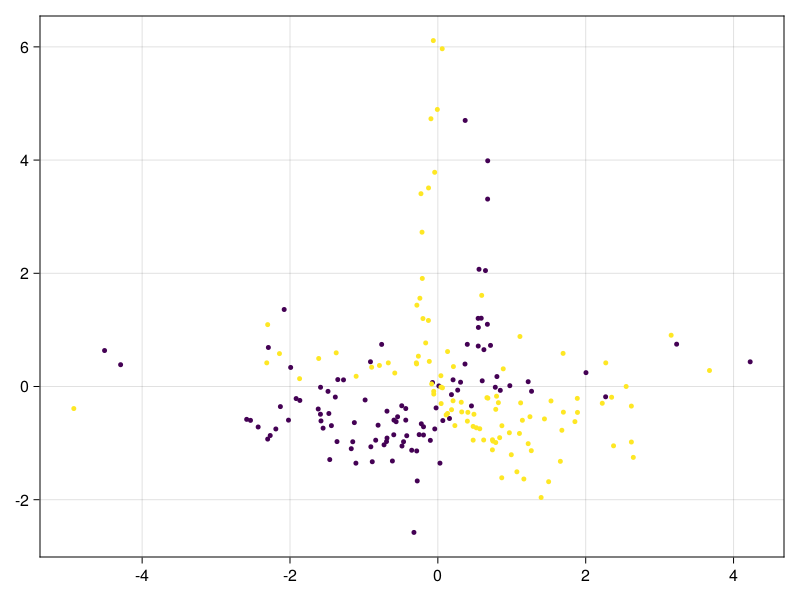

Predict:


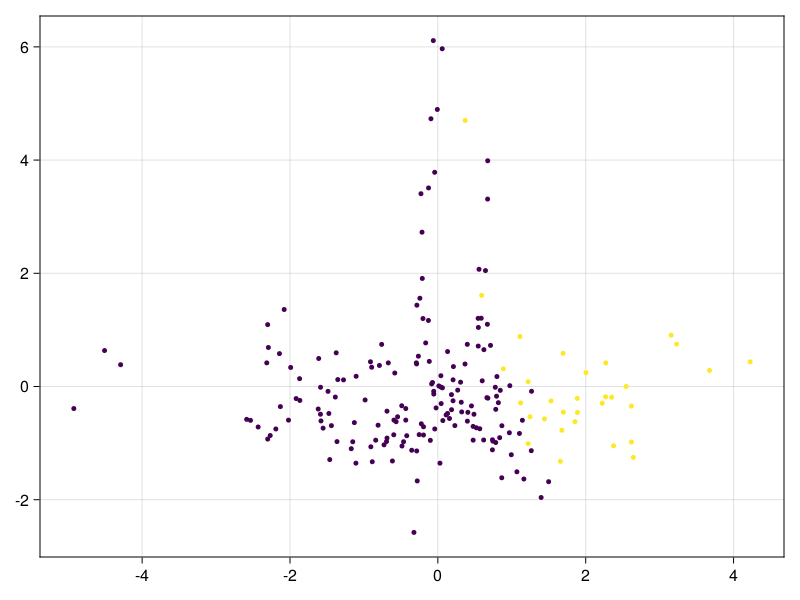

2×2 Matrix{Int64}:
 94   6
 75  25

0.595

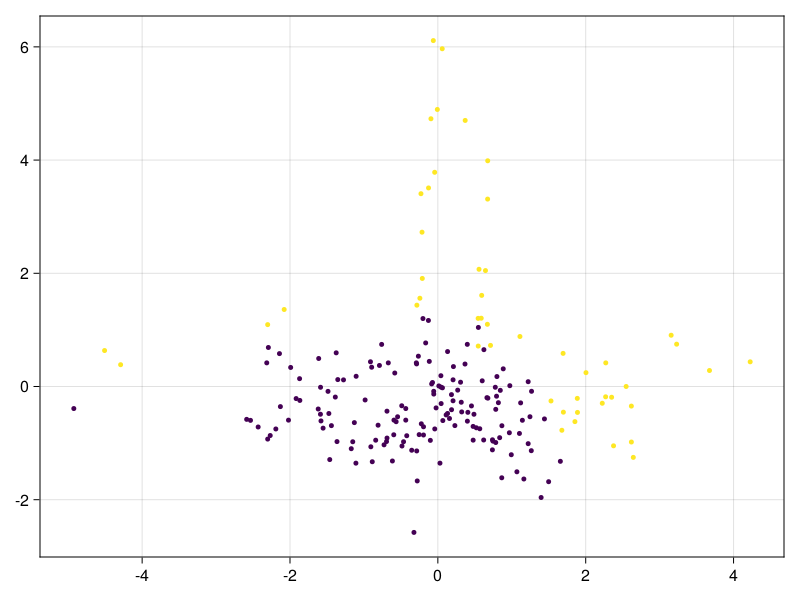

2×2 Matrix{Int64}:
 83  17
 69  31

0.57

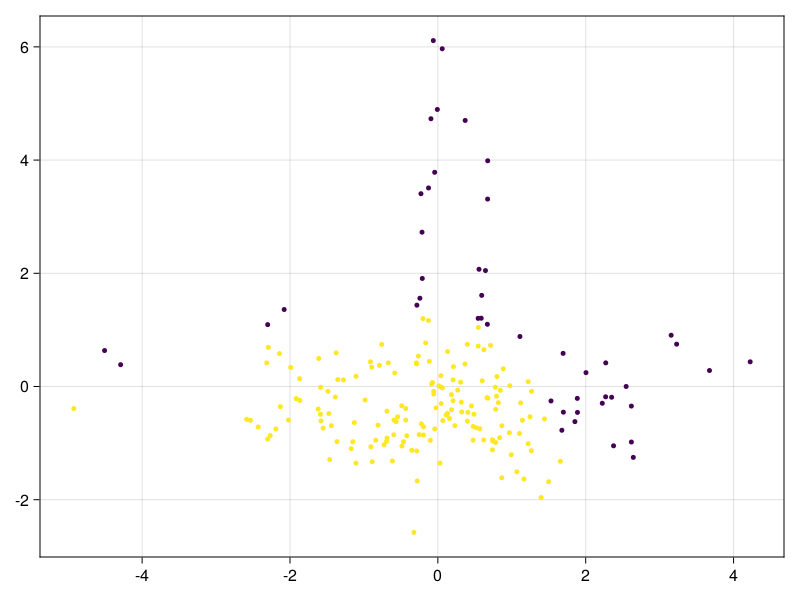

2×2 Matrix{Int64}:
 85  15
 69  31

0.58

True:1 and 3


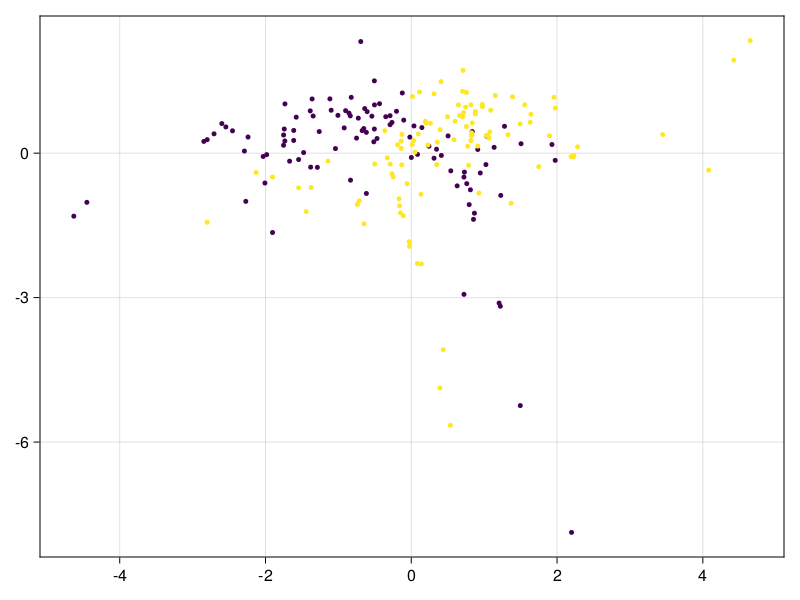

Predict:


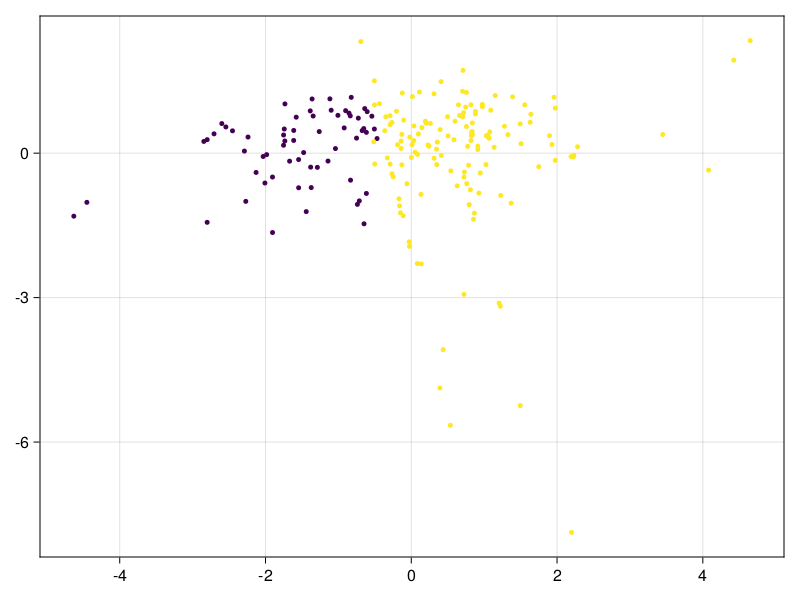

2×2 Matrix{Int64}:
 53  47
 10  90

0.715

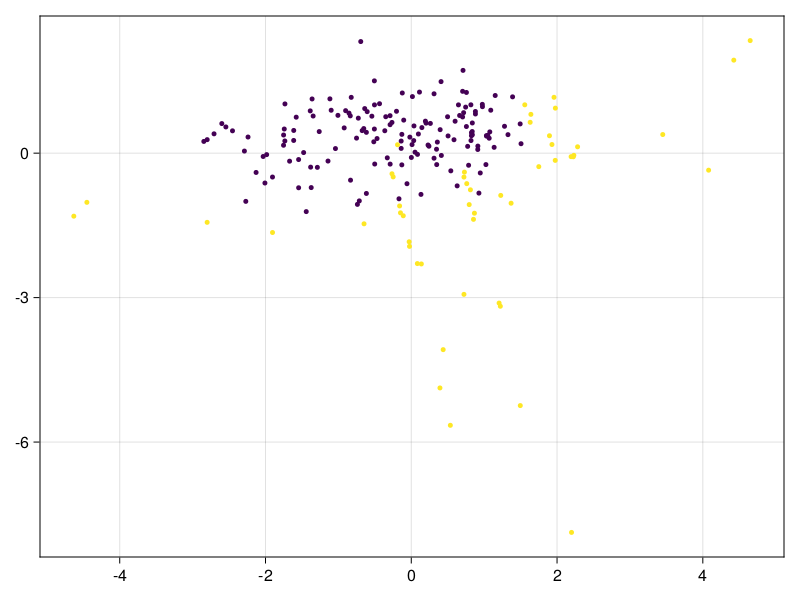

2×2 Matrix{Int64}:
 82  18
 69  31

0.565

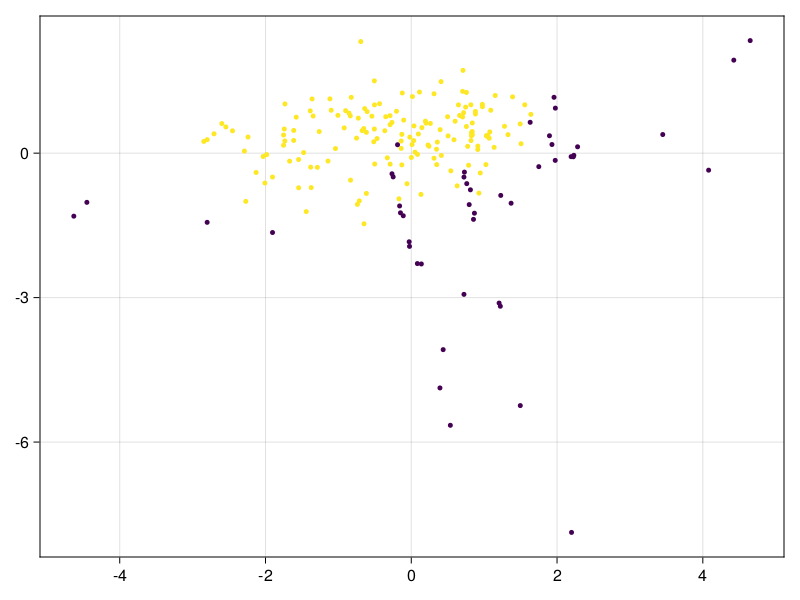

2×2 Matrix{Int64}:
 82  18
 72  28

0.55

True:1 and 4


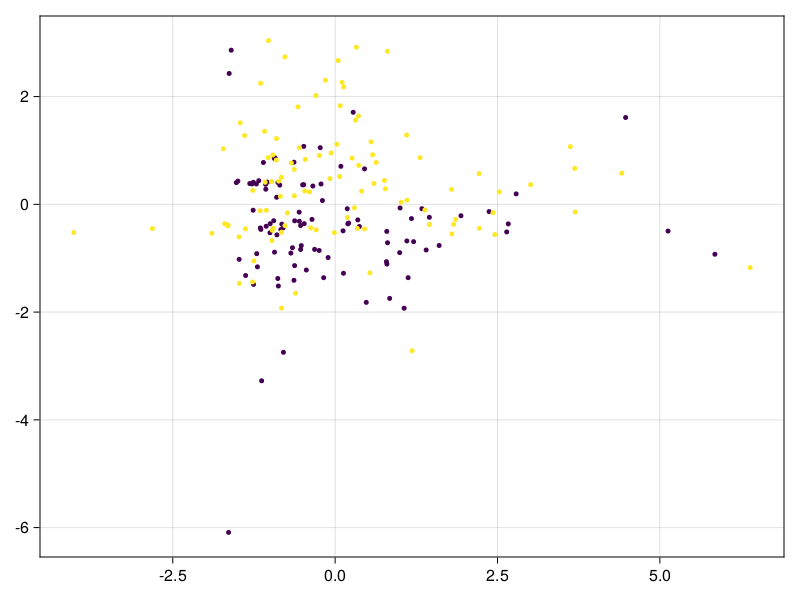

Predict:


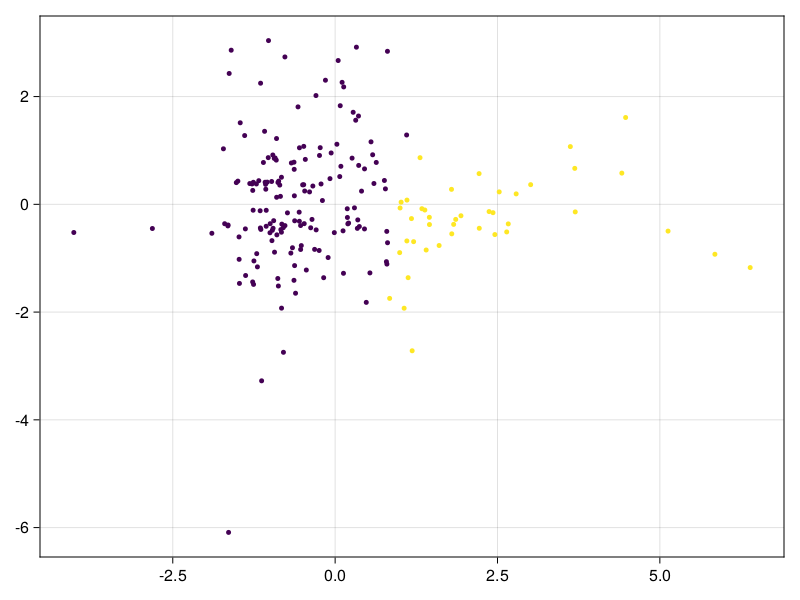

2×2 Matrix{Int64}:
 80  20
 79  21

0.505

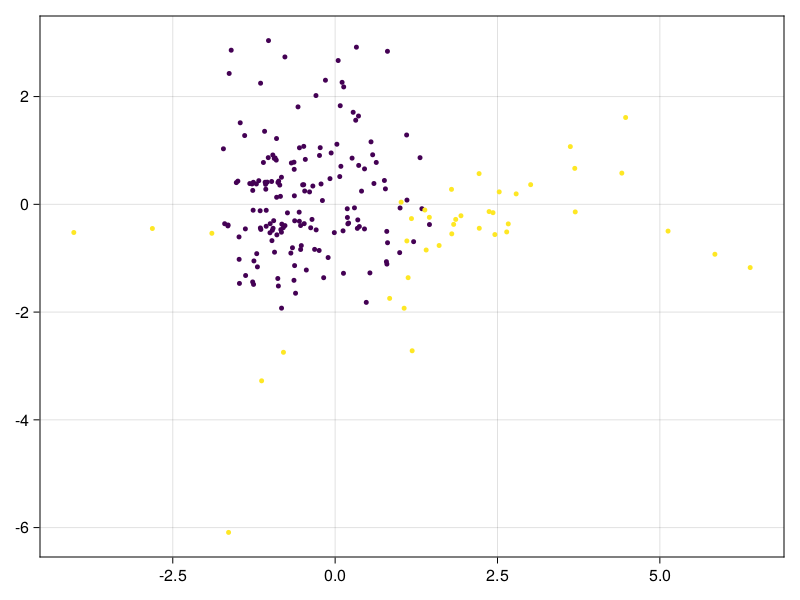

2×2 Matrix{Int64}:
 81  19
 79  21

0.51

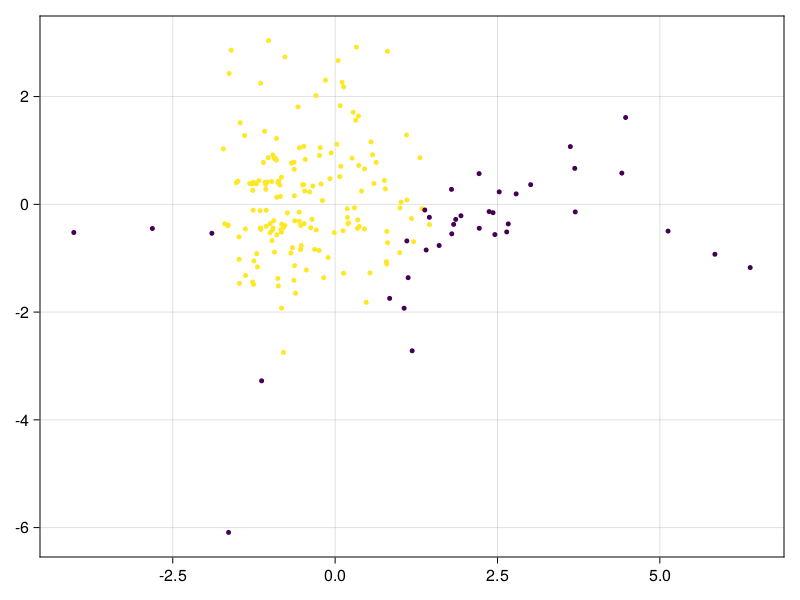

2×2 Matrix{Int64}:
 83  17
 80  20

0.515

True:1 and 5


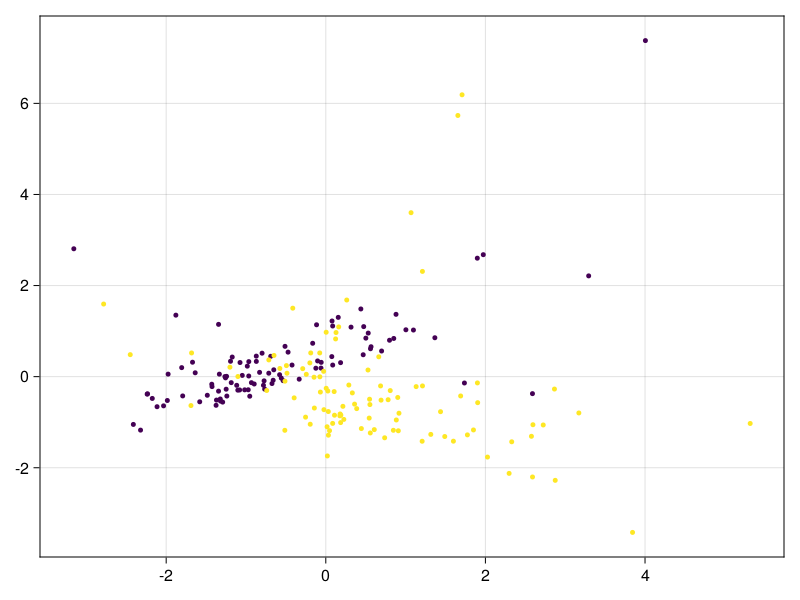

Predict:


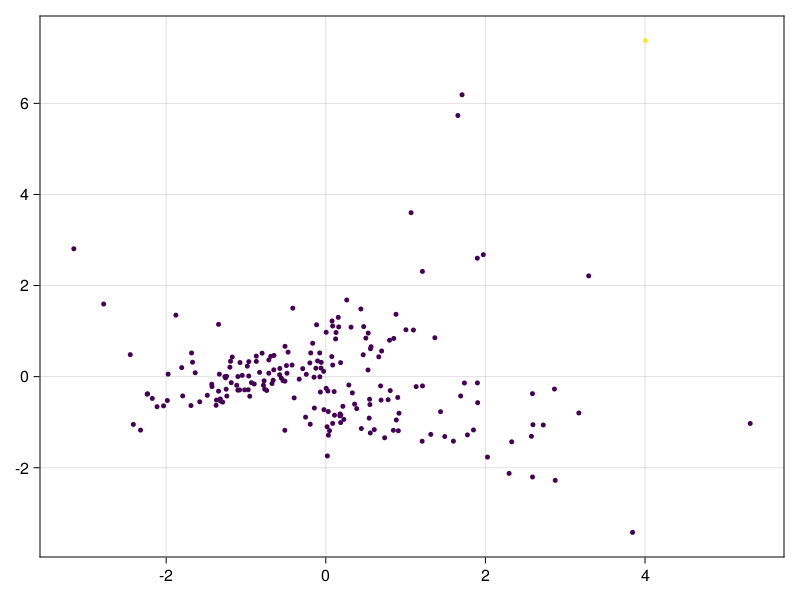

2×2 Matrix{Int64}:
 1   99
 0  100

0.505

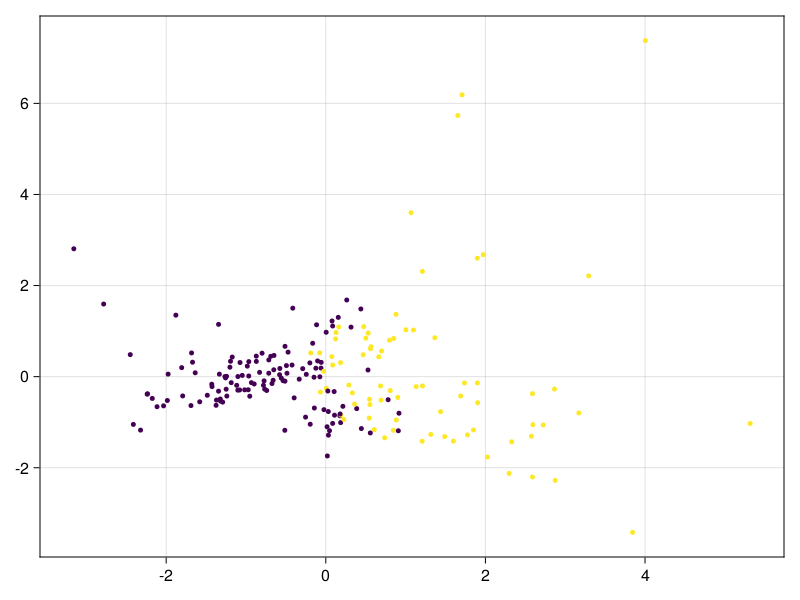

2×2 Matrix{Int64}:
 78  22
 47  53

0.655

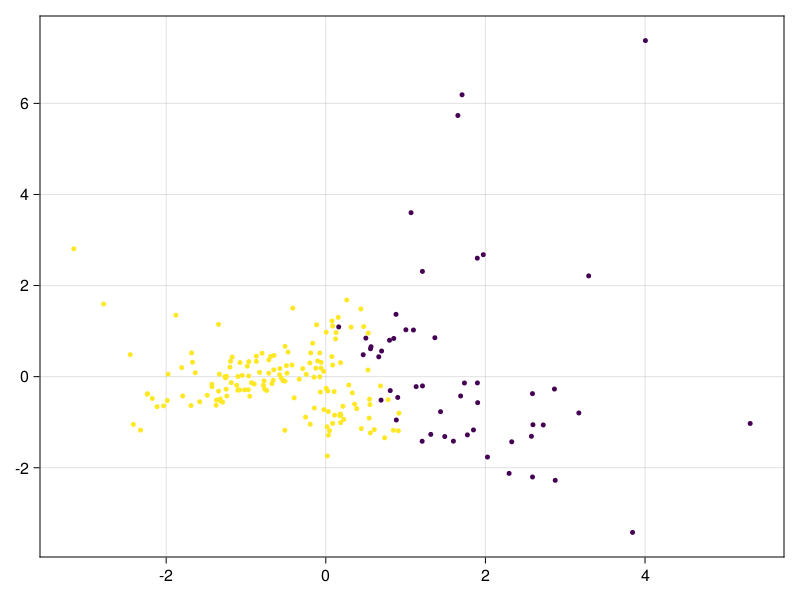

2×2 Matrix{Int64}:
 83  17
 66  34

0.585

True:1 and 6


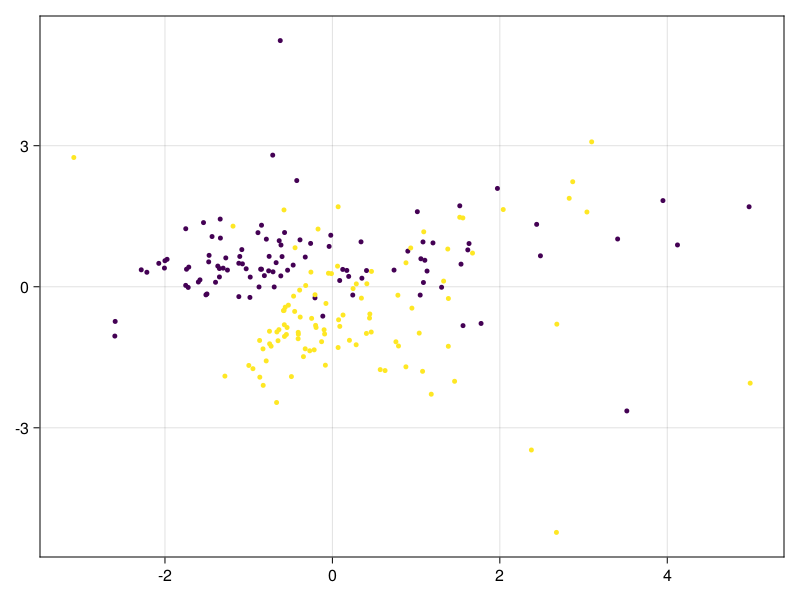

Predict:


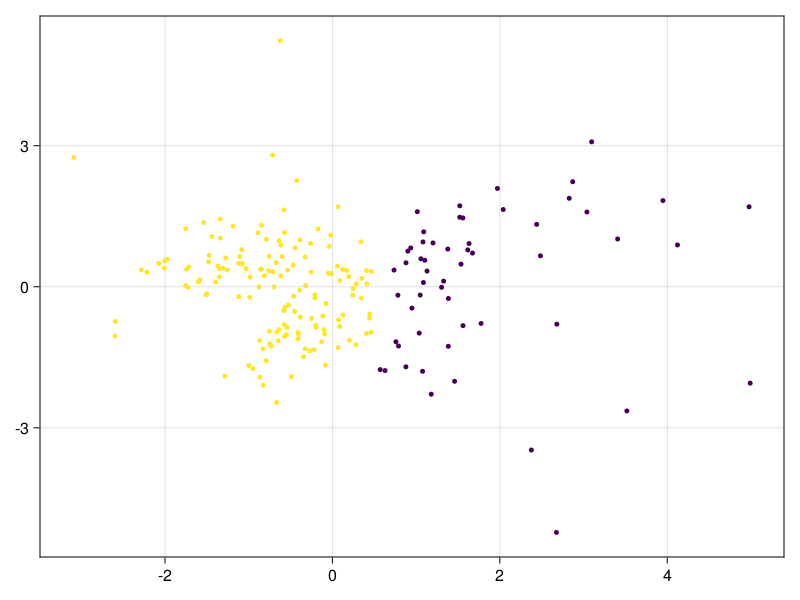

2×2 Matrix{Int64}:
 75  25
 70  30

0.525

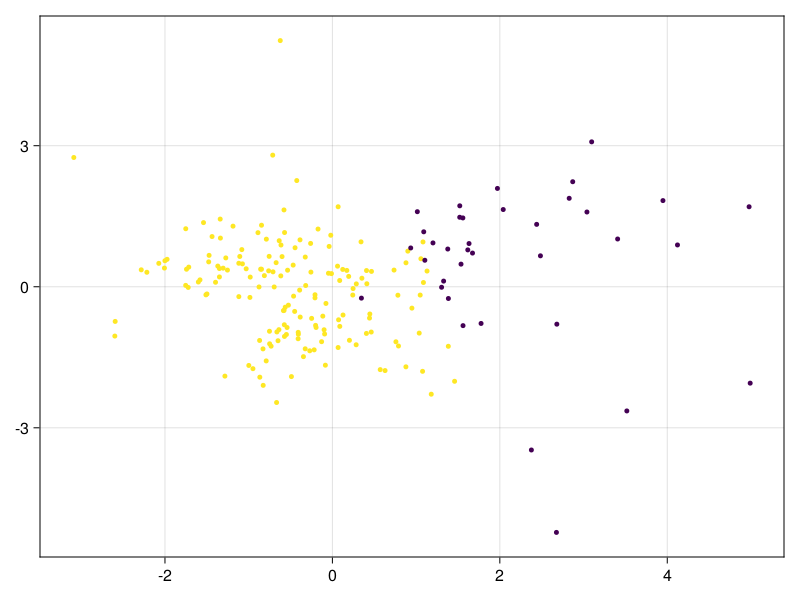

2×2 Matrix{Int64}:
 18  82
 18  82

0.5

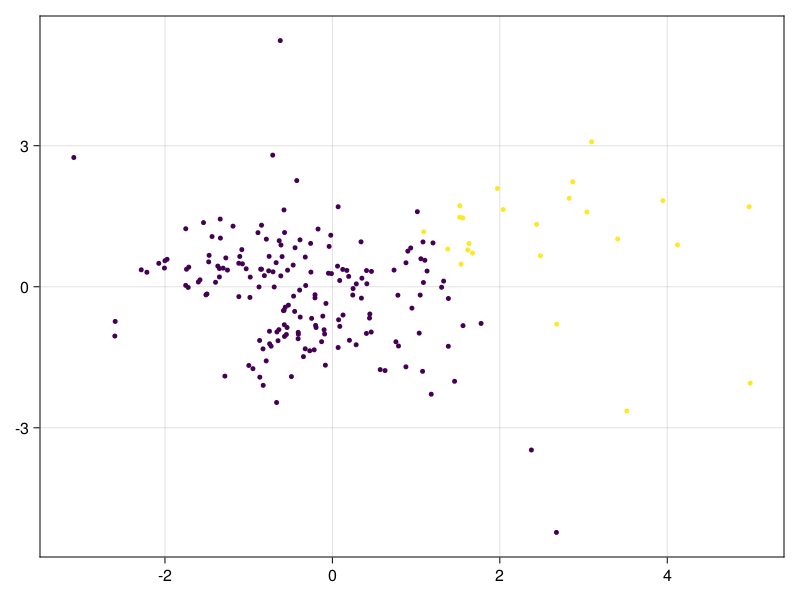

2×2 Matrix{Int64}:
 88  12
 88  12

0.5

True:1 and 7


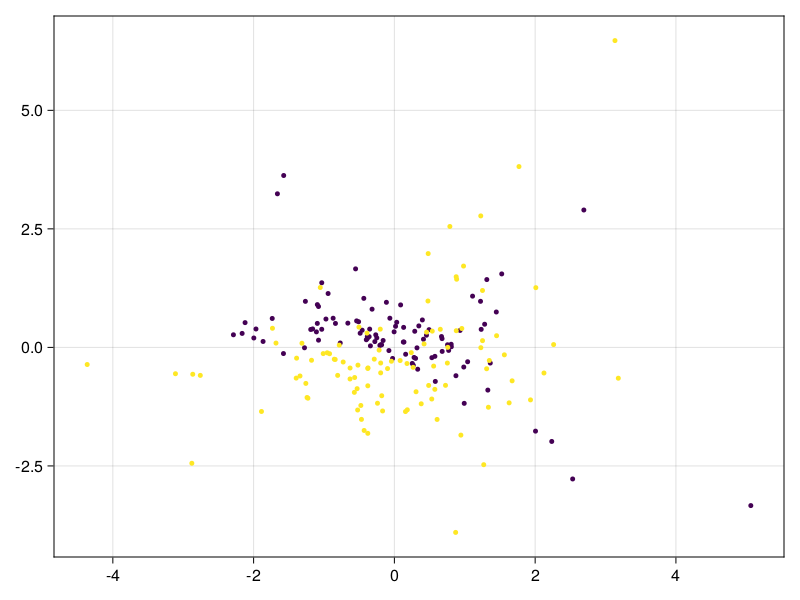

Predict:


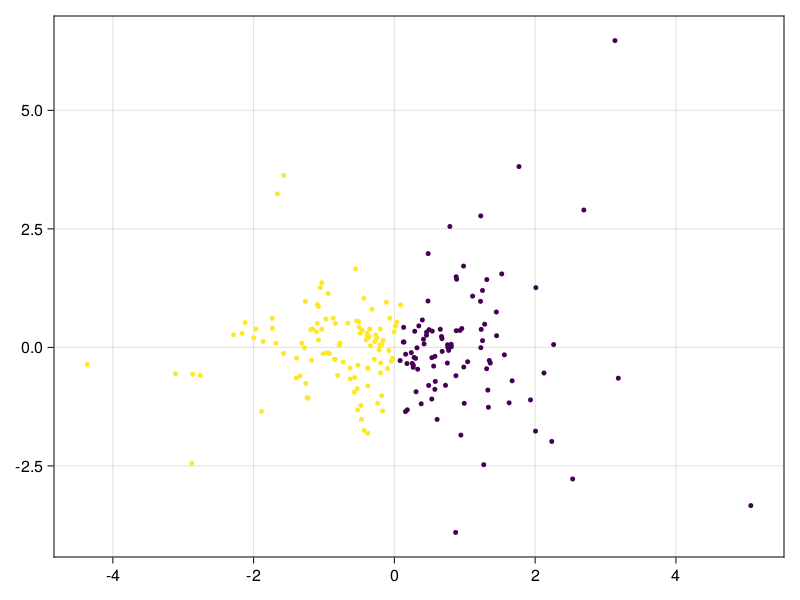

2×2 Matrix{Int64}:
 55  45
 51  49

0.52

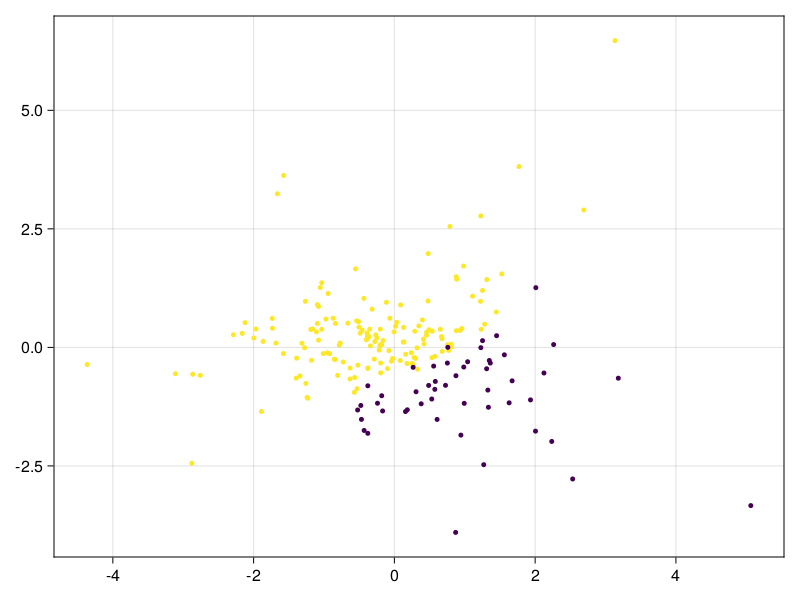

2×2 Matrix{Int64}:
 89  11
 61  39

0.64

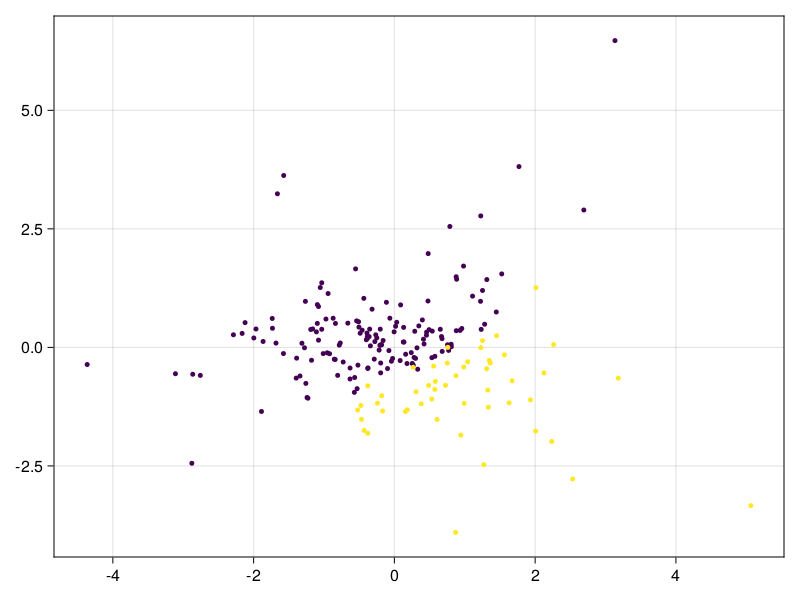

2×2 Matrix{Int64}:
 89  11
 61  39

0.64

True:1 and 8


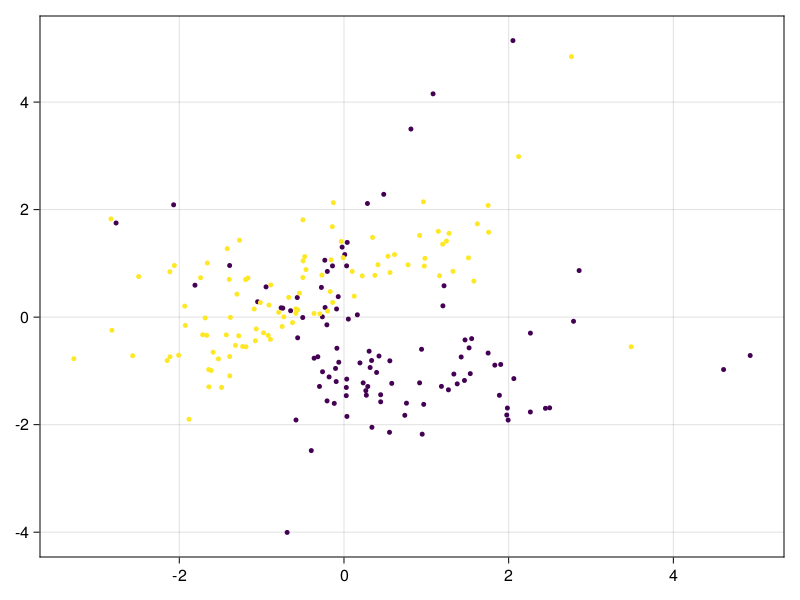

Predict:


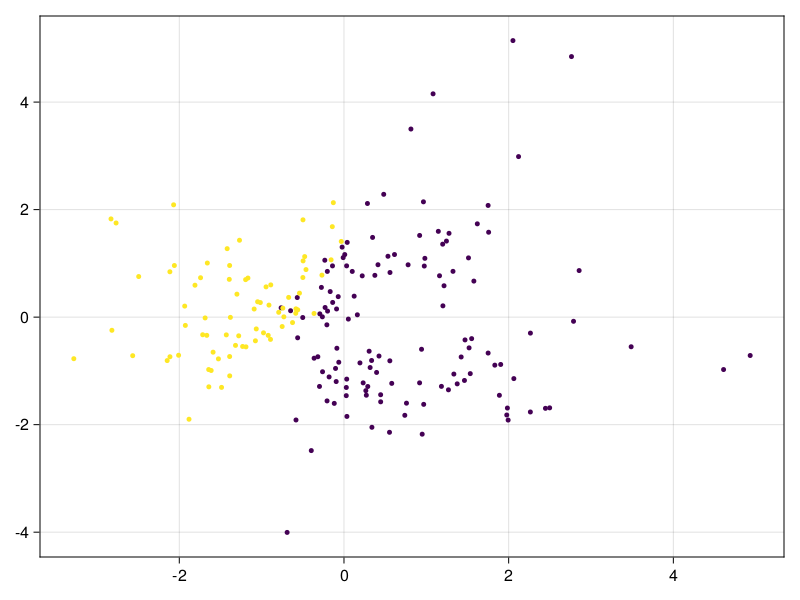

2×2 Matrix{Int64}:
 93   7
 33  67

0.8

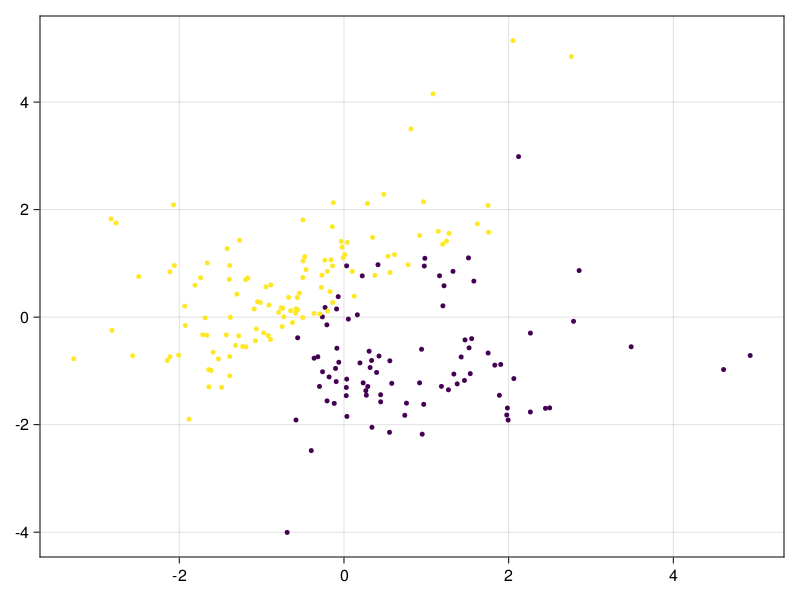

2×2 Matrix{Int64}:
 77  23
 10  90

0.835

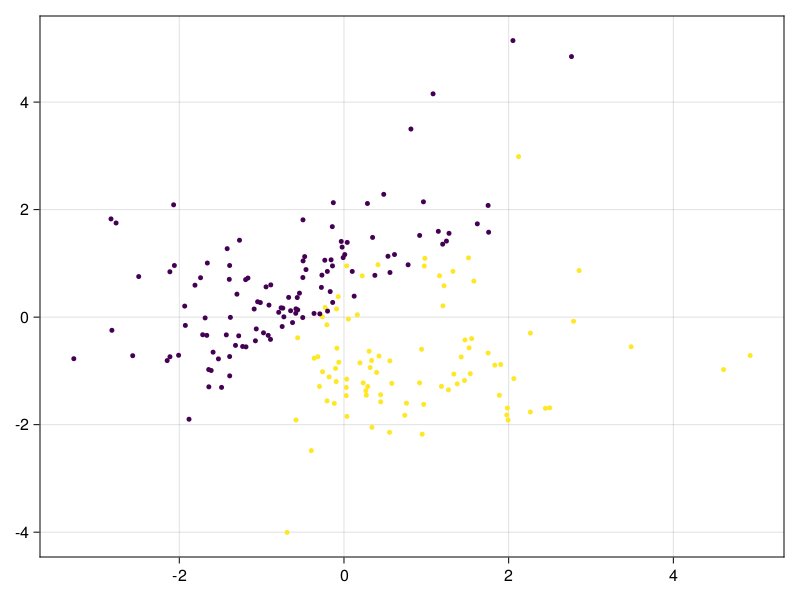

2×2 Matrix{Int64}:
 77  23
 10  90

0.835

True:1 and 9


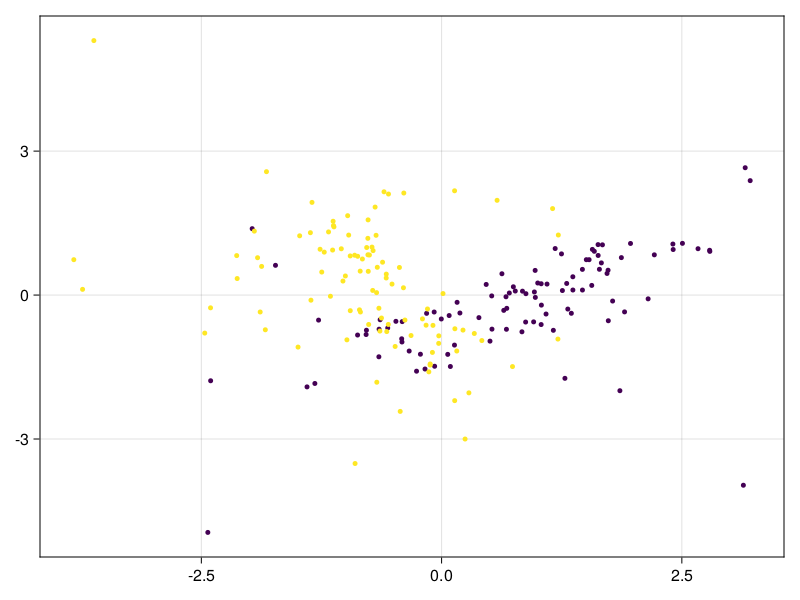

Predict:


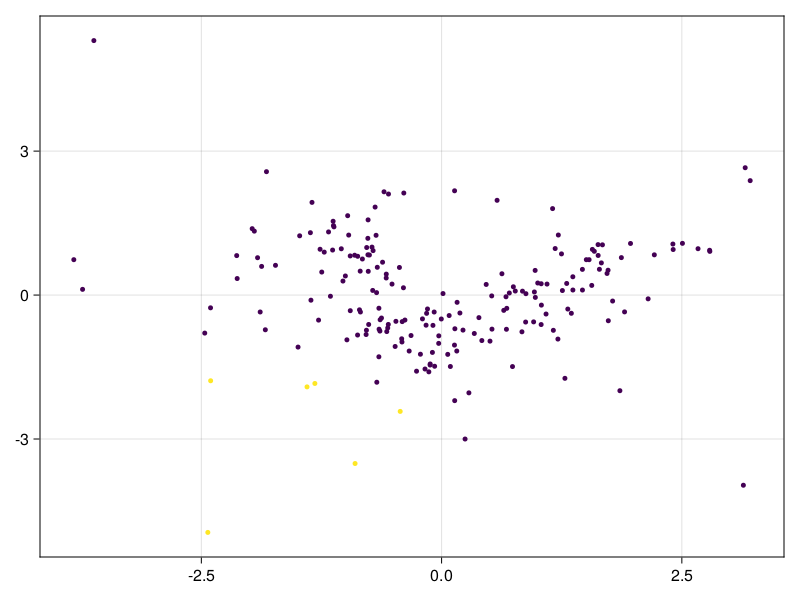

2×2 Matrix{Int64}:
 4  96
 2  98

0.51

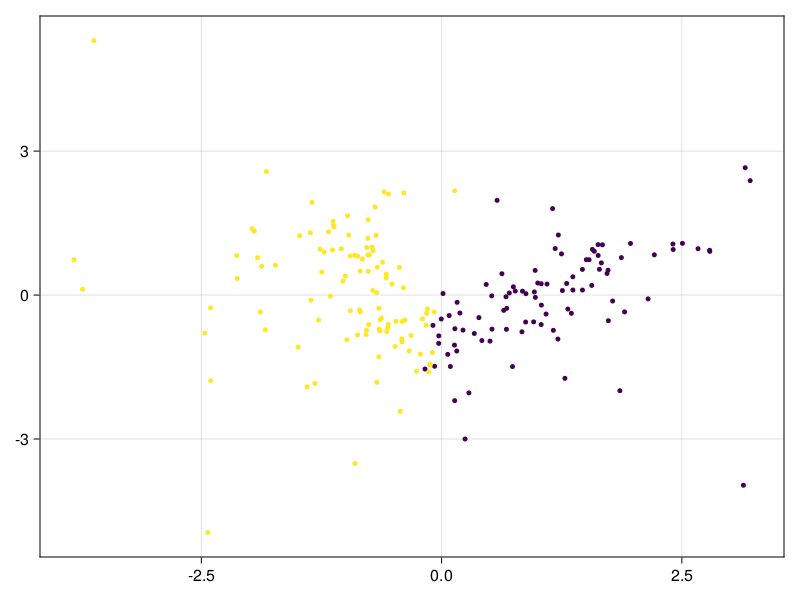

2×2 Matrix{Int64}:
 77  23
 17  83

0.8

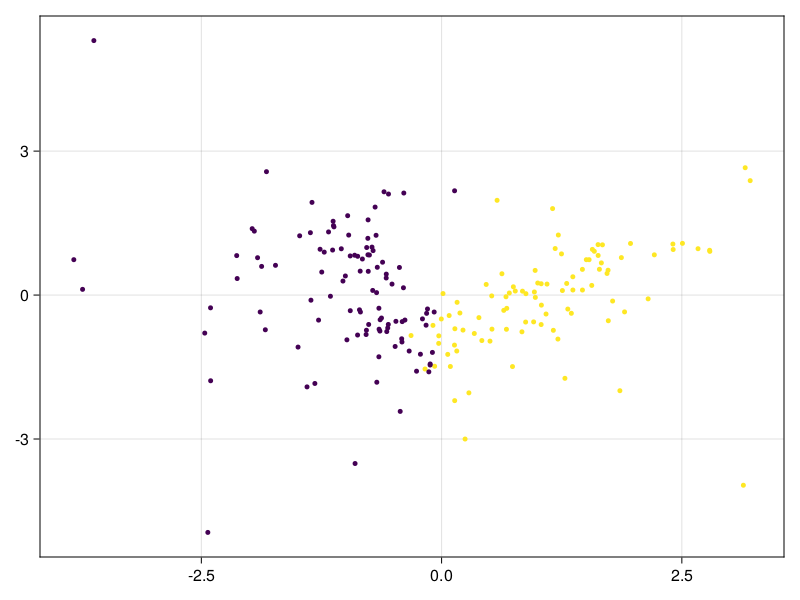

2×2 Matrix{Int64}:
 77  23
 18  82

0.795

True:1 and 10


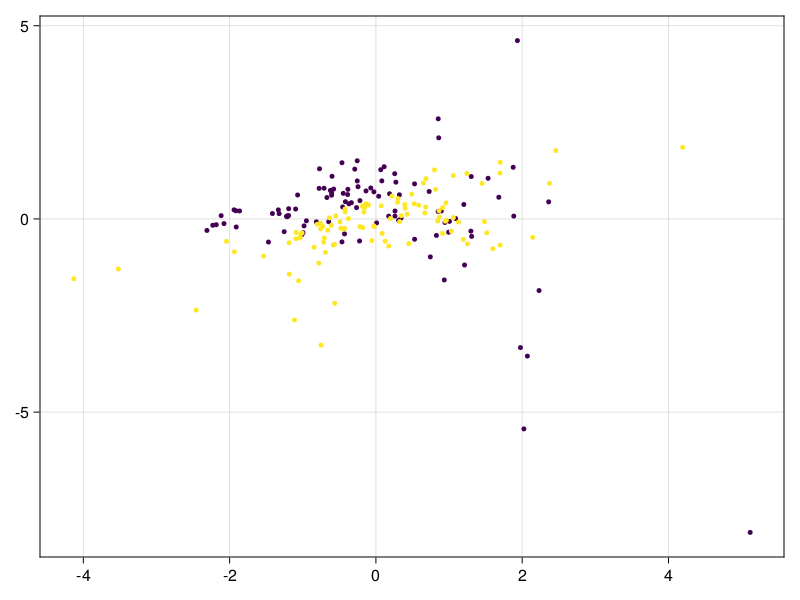

Predict:


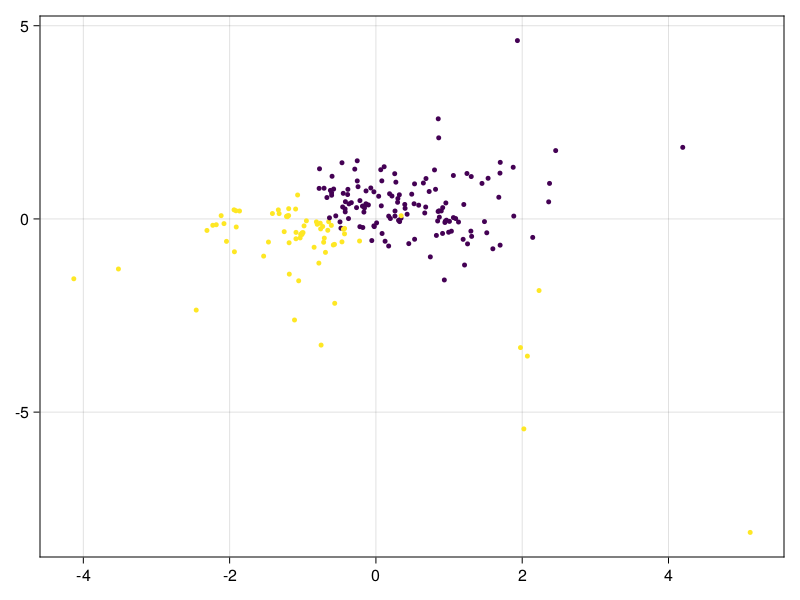

2×2 Matrix{Int64}:
 35  65
 33  67

0.51

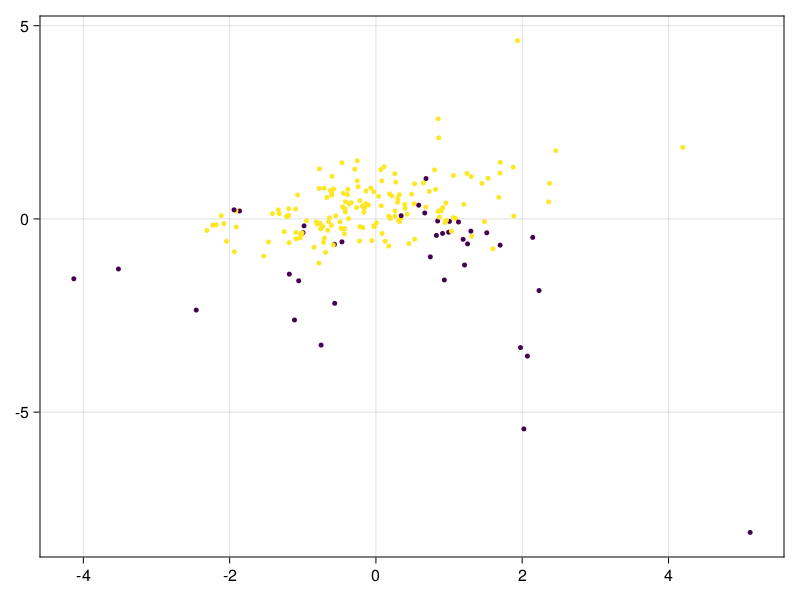

2×2 Matrix{Int64}:
 83  17
 79  21

0.52

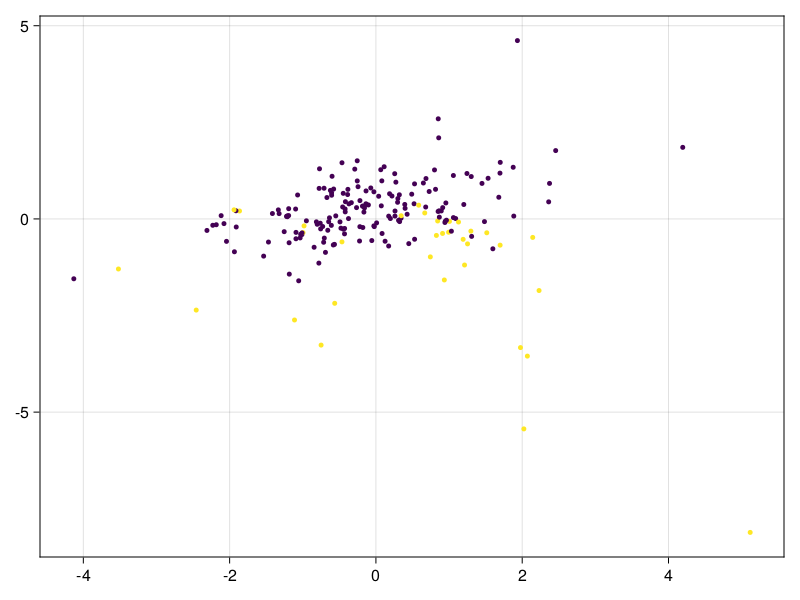

2×2 Matrix{Int64}:
 17  83
 16  84

0.505

True:1 and 11


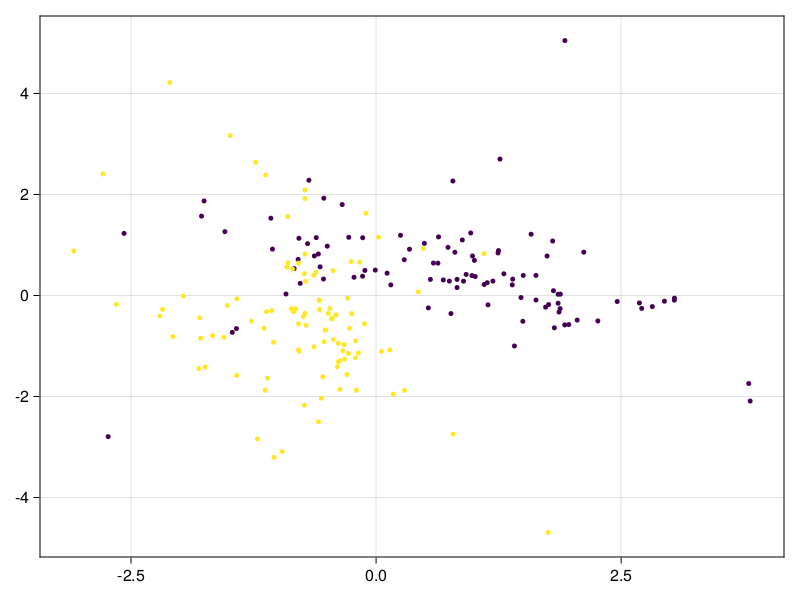

Predict:


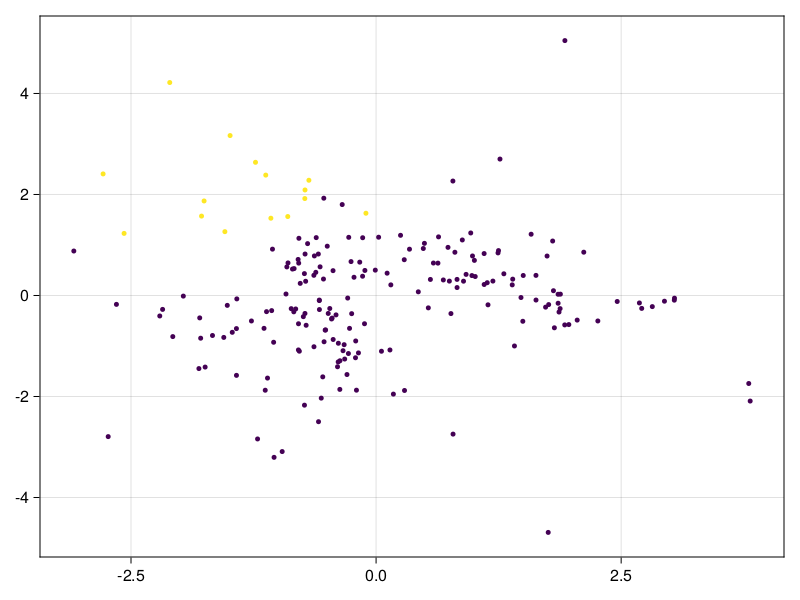

2×2 Matrix{Int64}:
 94  6
 91  9

0.515

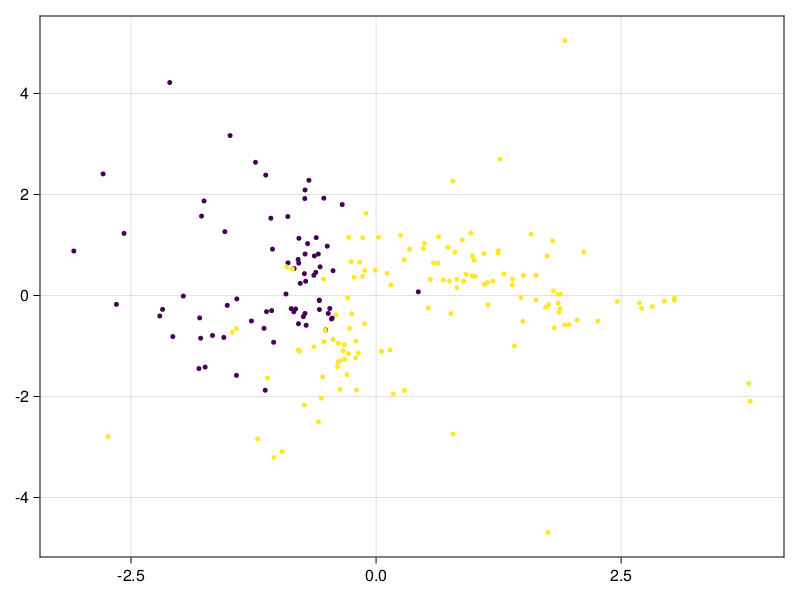

2×2 Matrix{Int64}:
 80  20
 47  53

0.665

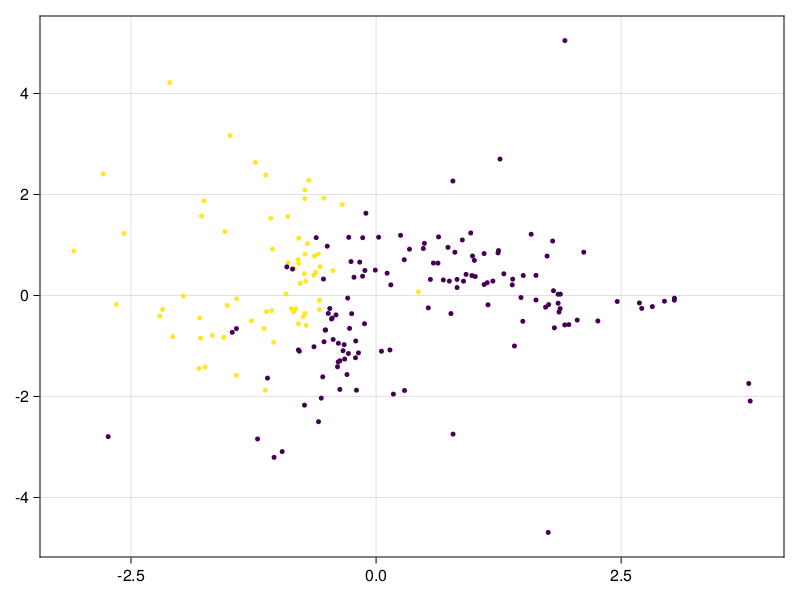

2×2 Matrix{Int64}:
 82  18
 52  48

0.65

True:1 and 12


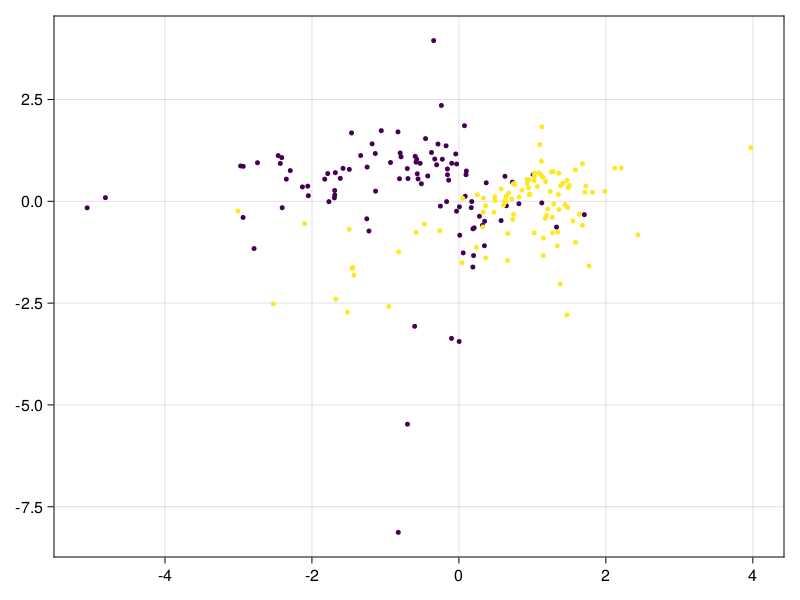

Predict:


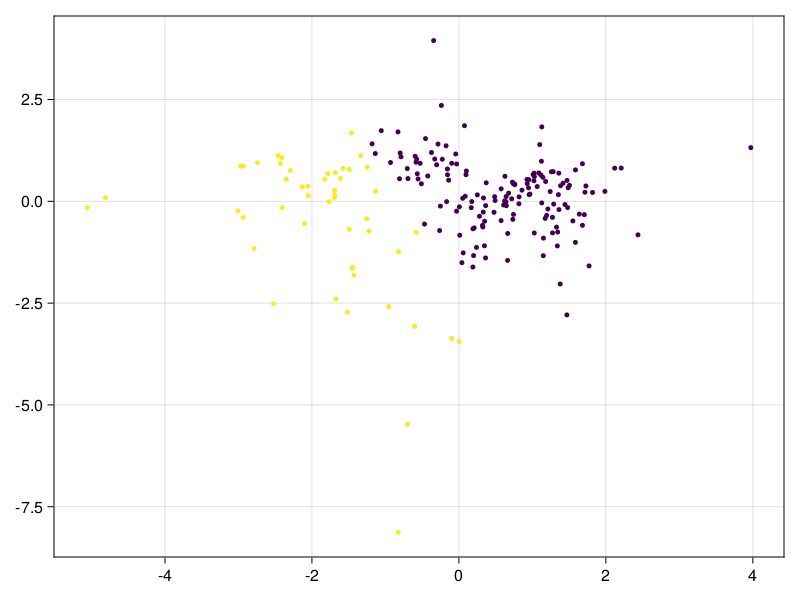

2×2 Matrix{Int64}:
 37  63
 12  88

0.625

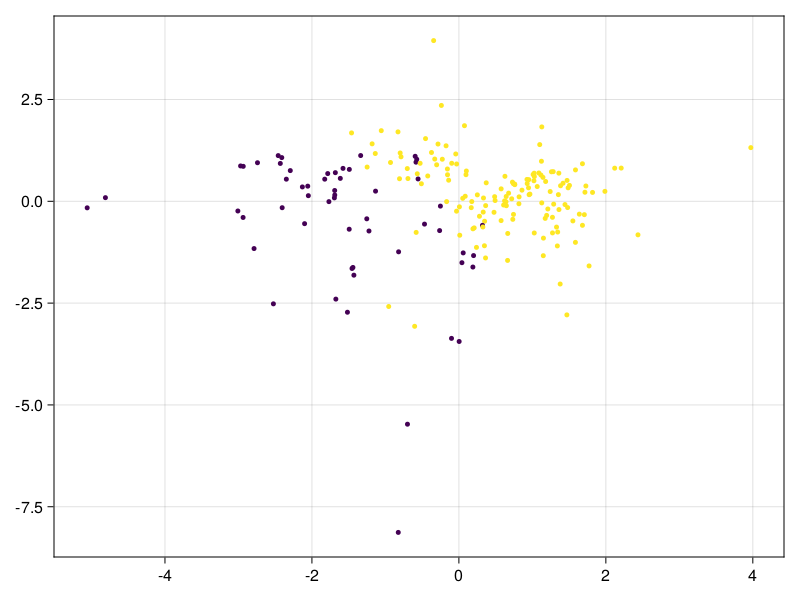

2×2 Matrix{Int64}:
 43  57
 13  87

0.65

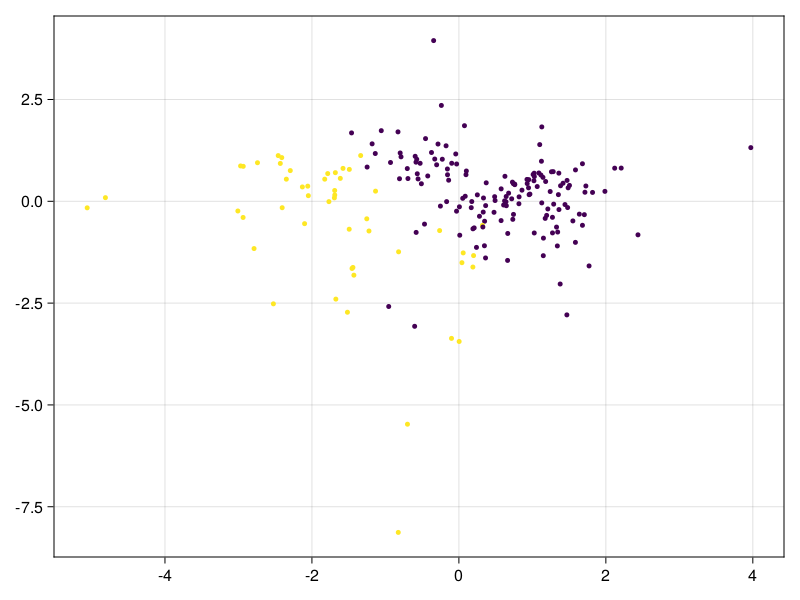

2×2 Matrix{Int64}:
 38  62
 12  88

0.63

True:1 and 13


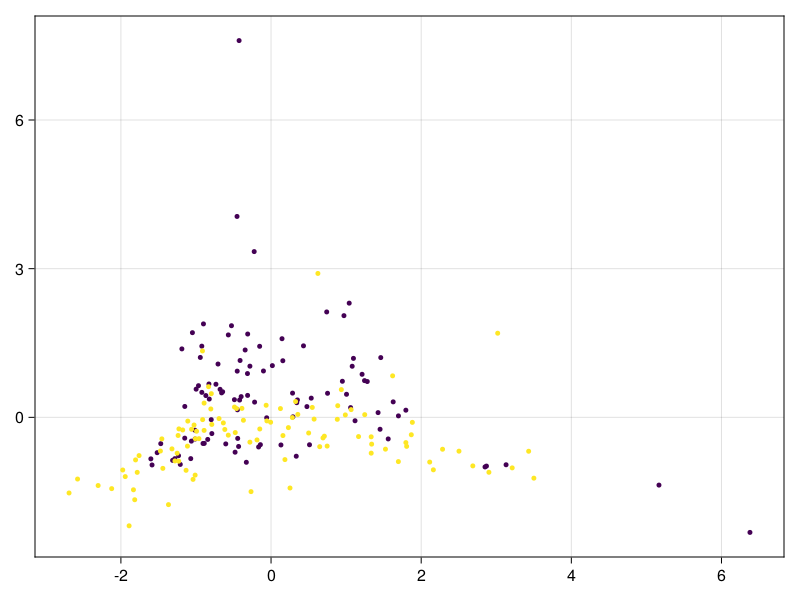

Predict:


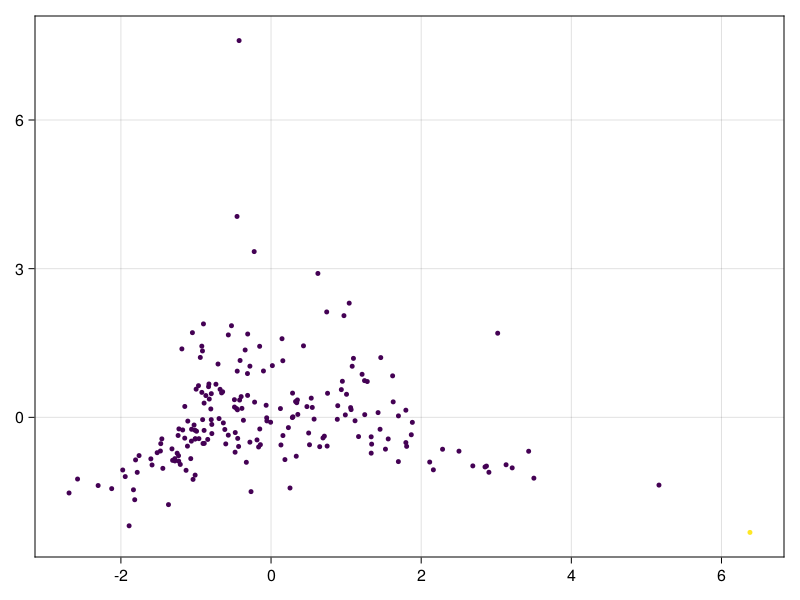

2×2 Matrix{Int64}:
 1   99
 0  100

0.505

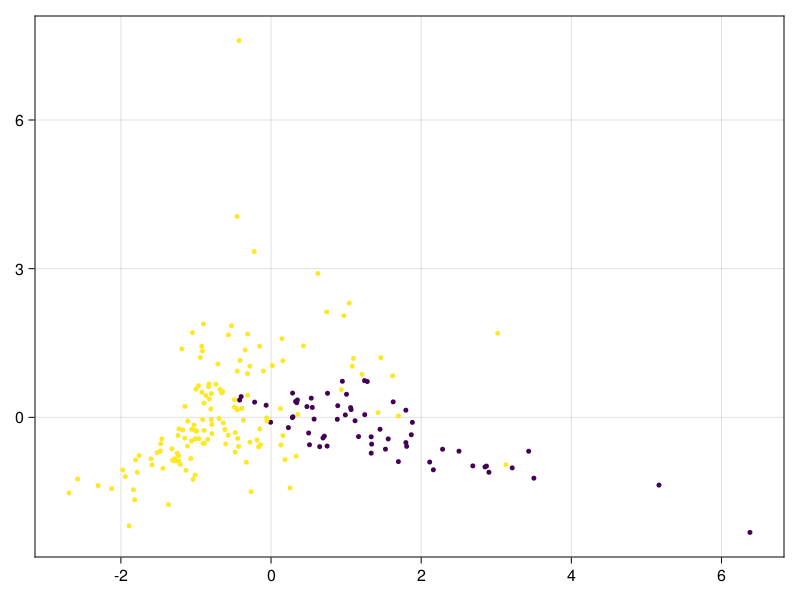

2×2 Matrix{Int64}:
 75  25
 64  36

0.555

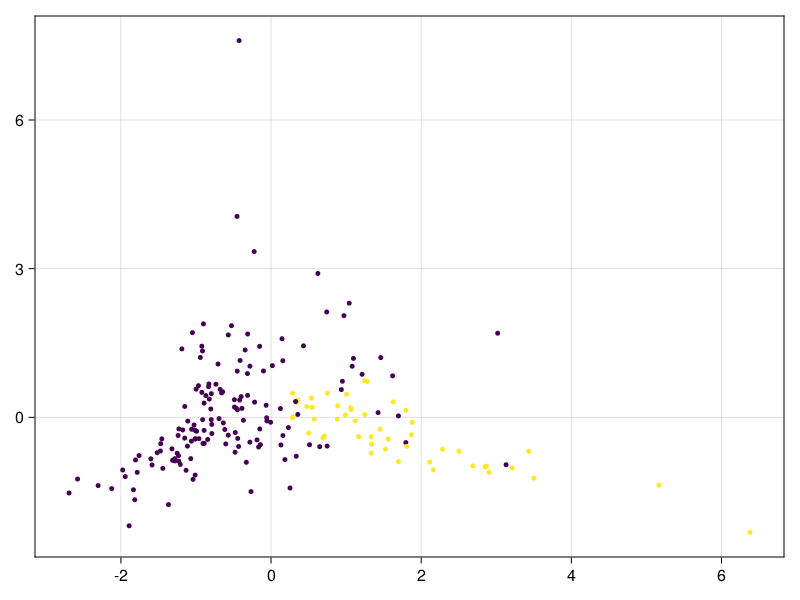

2×2 Matrix{Int64}:
 80  20
 71  29

0.545

True:1 and 14


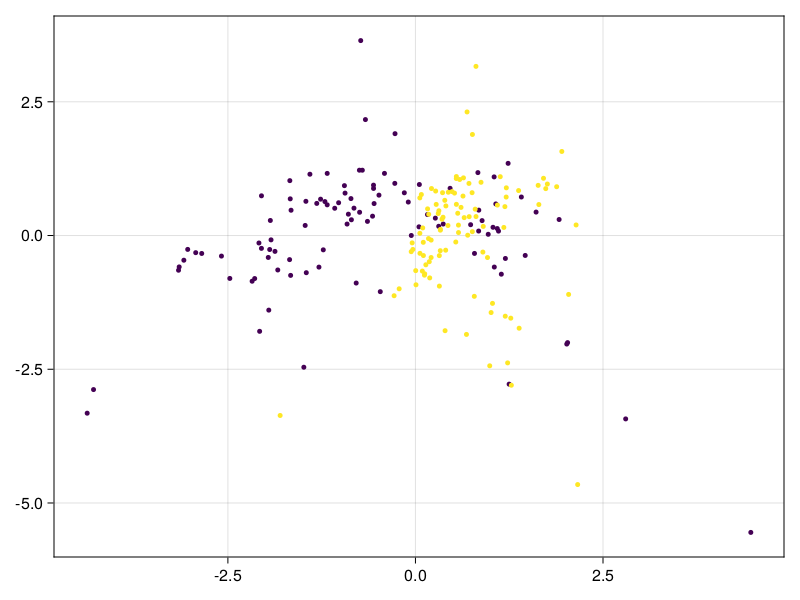

Predict:


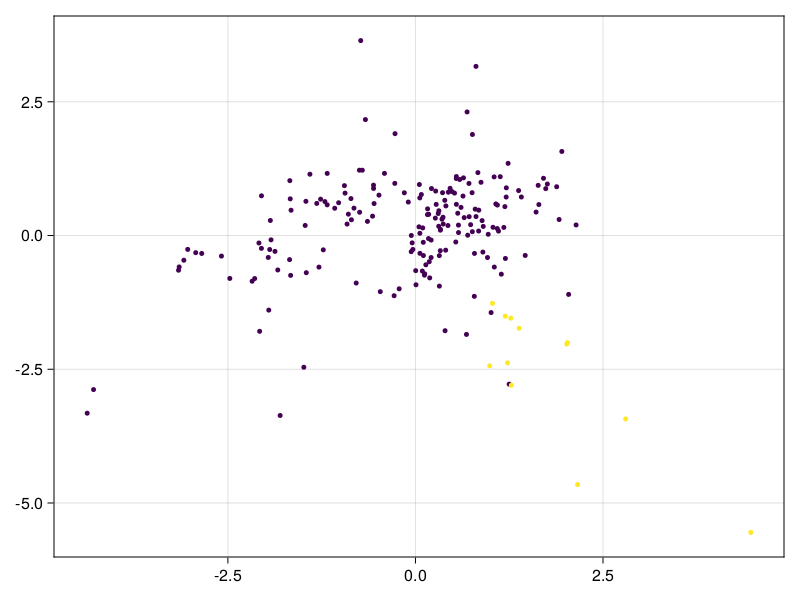

2×2 Matrix{Int64}:
 96  4
 92  8

0.52

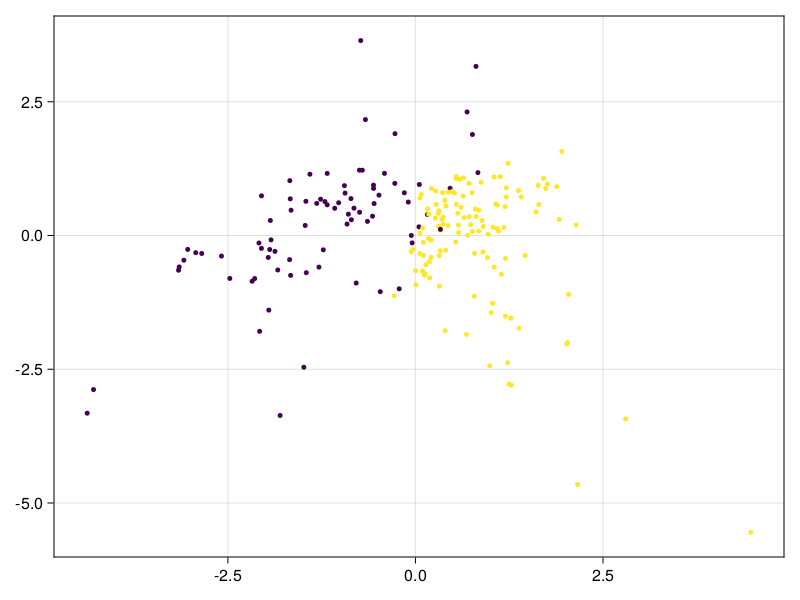

2×2 Matrix{Int64}:
 73  27
  7  93

0.83

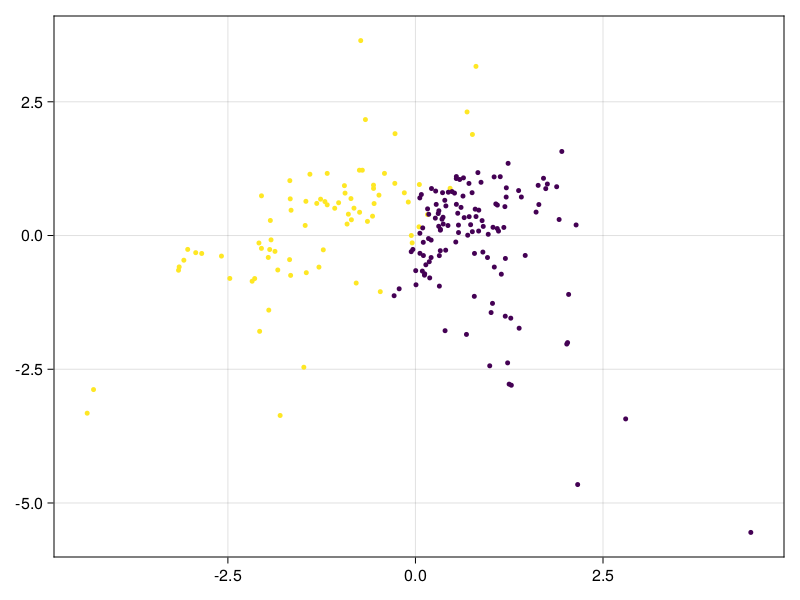

2×2 Matrix{Int64}:
 72  28
  5  95

0.835

True:1 and 15


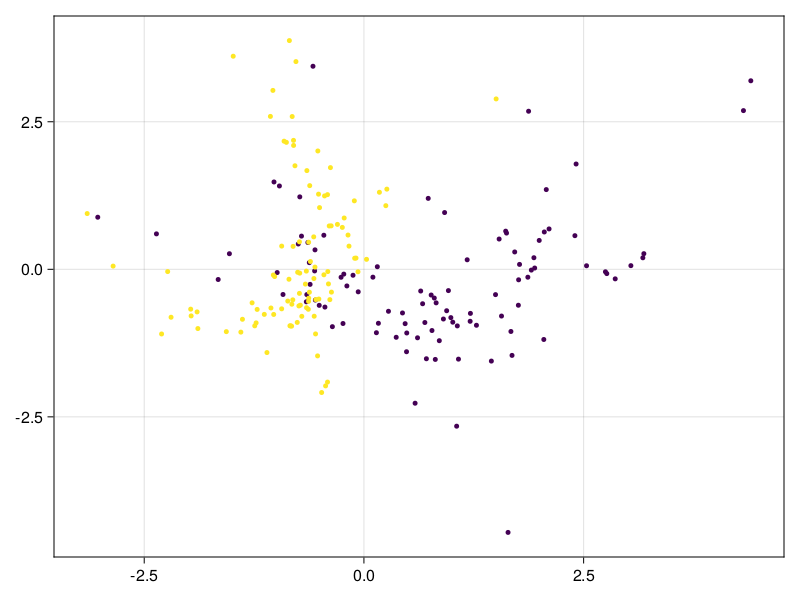

Predict:


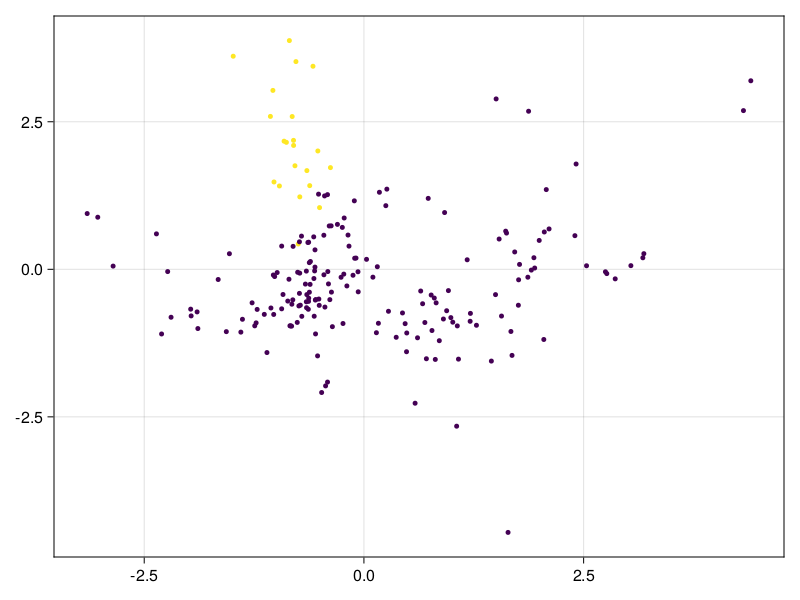

2×2 Matrix{Int64}:
 95   5
 84  16

0.555

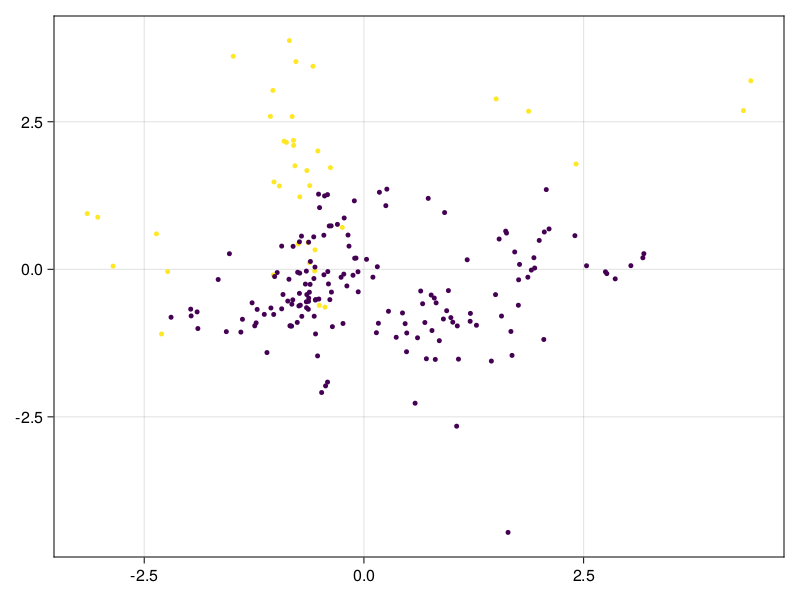

2×2 Matrix{Int64}:
 83  17
 78  22

0.525

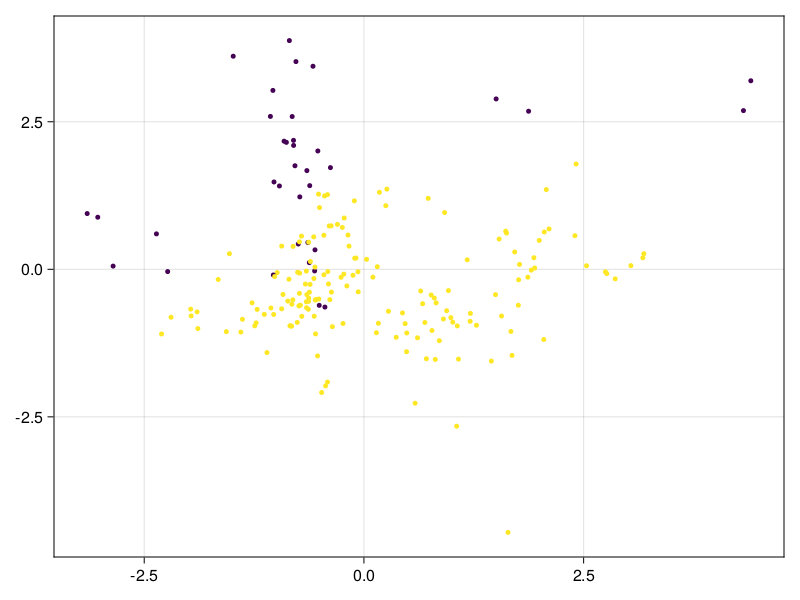

2×2 Matrix{Int64}:
 84  16
 80  20

0.52



In [83]:
@suppress_err begin
    fixed = trees[1]
    compared = copy(trees)
    compared = deleteat!(compared, 1)
    counter = 2
    for i in compared
        gt = ground_true(fixed,i)
        tree = vcat(fixed ,i)
        tree = standardize_tree(tree)

        print("True:")
        println(1, " and ",counter)   
        counter +=1
        display(plot_clusters(tree, gt))
        
        pred_kmeans = kmeans_label(tree, 2) 
        println("Predict:")
        display(plot_clusters(tree, pred_kmeans))
        m,x = accuracy(2, gt, pred_kmeans)
        display(m)
        print(x)

        pred_prob, pred_llpg = GMM_label(tree, 2, method = :split)
        display(plot_clusters(tree, pred_prob))
        m,x = accuracy(2, gt, pred_prob)
        display(m)
        print(x)

        display(plot_clusters(tree, pred_llpg))
        m,x = accuracy(2, gt, pred_llpg)
        display(m)
        println(x)
        println()
    end
end

True:1 and 1


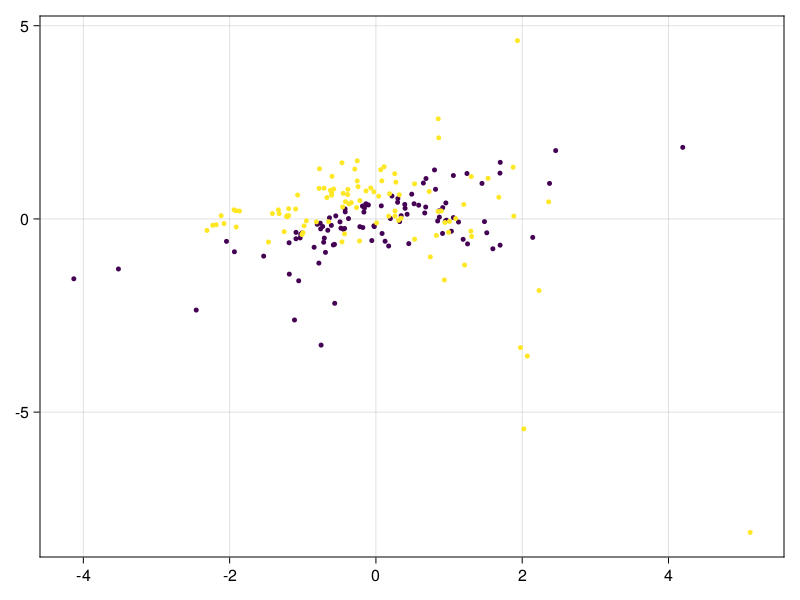

Predict:


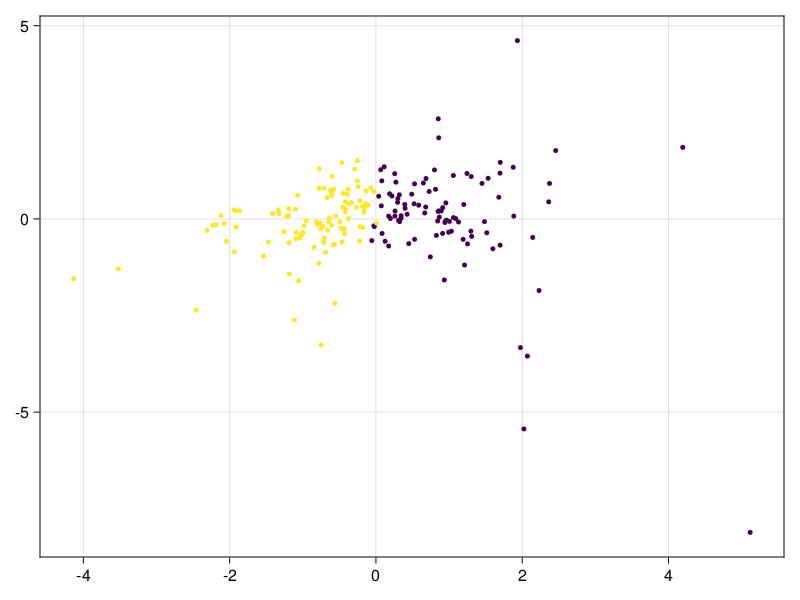

2×2 Matrix{Int64}:
 52  48
 43  57

0.545

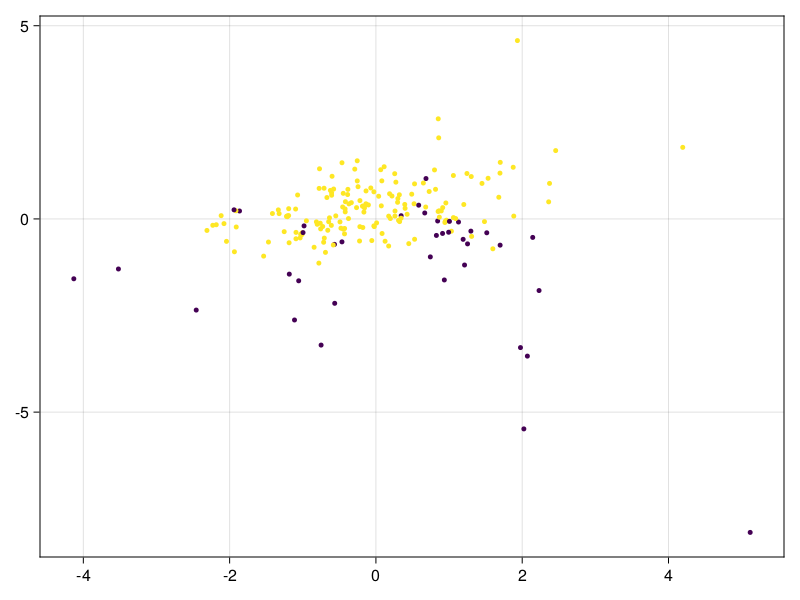

2×2 Matrix{Int64}:
 21  79
 17  83

0.52

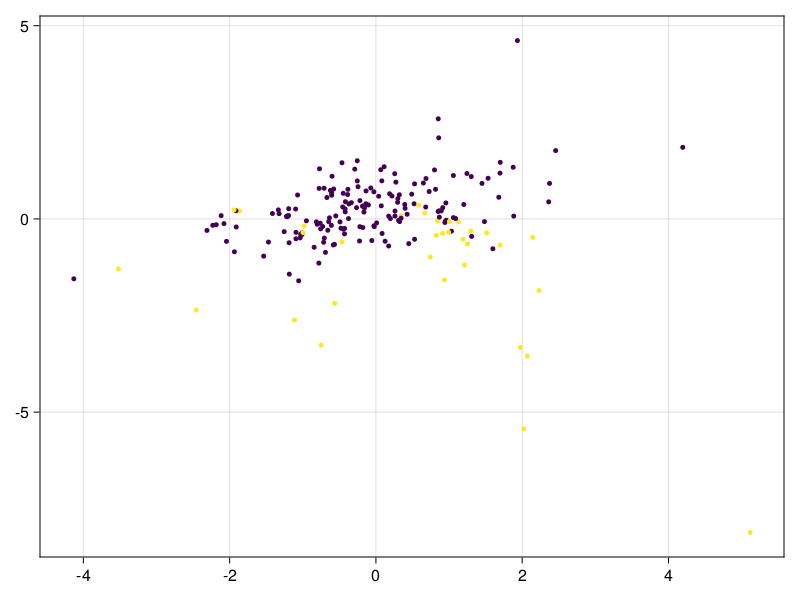

2×2 Matrix{Int64}:
 84  16
 83  17

0.505

True:1 and 2


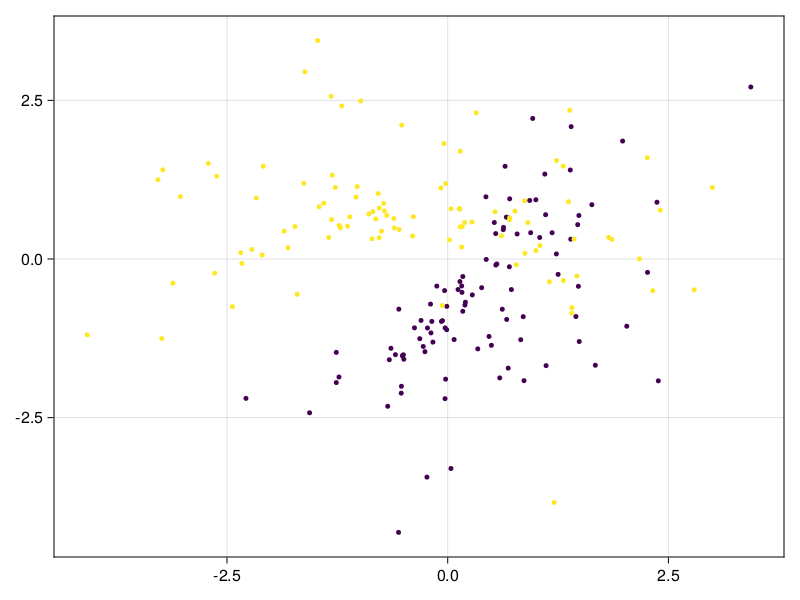

Predict:


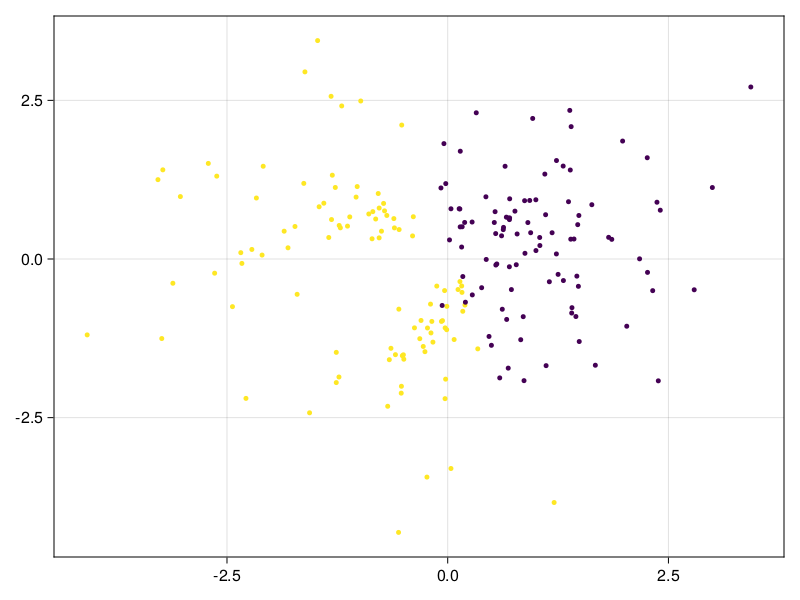

2×2 Matrix{Int64}:
 55  45
 44  56

0.555

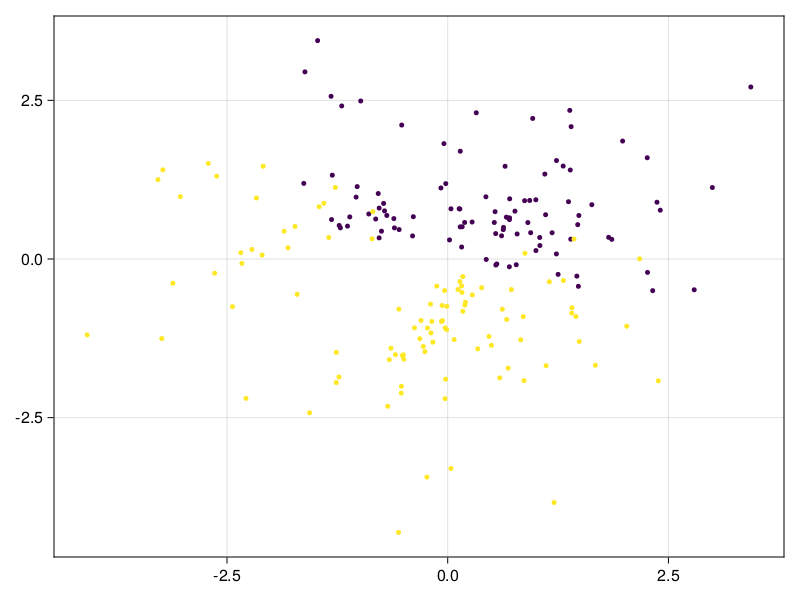

2×2 Matrix{Int64}:
 65  35
 35  65

0.65

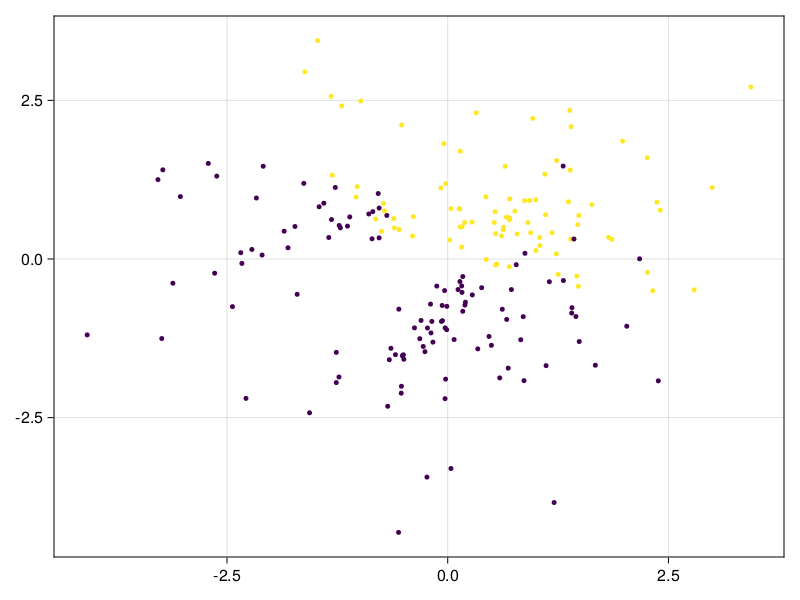

2×2 Matrix{Int64}:
 65  35
 48  52

0.585

True:1 and 3


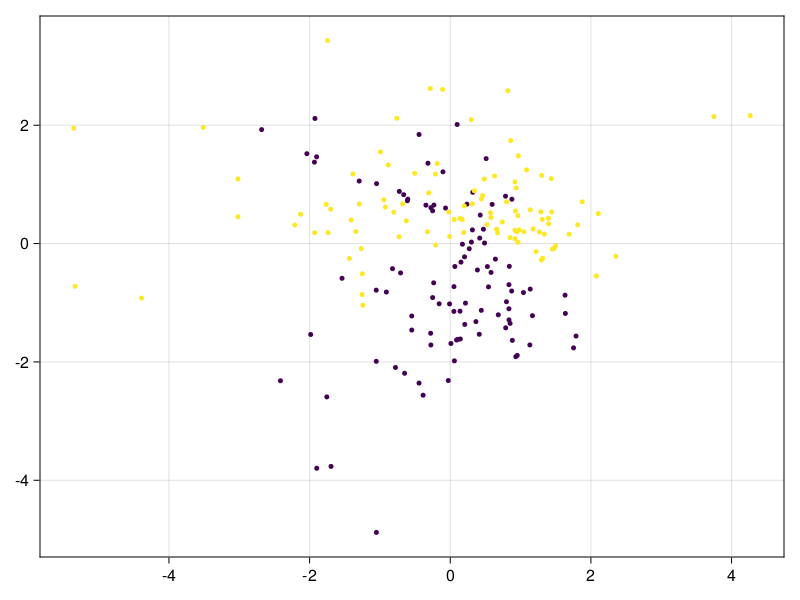

Predict:


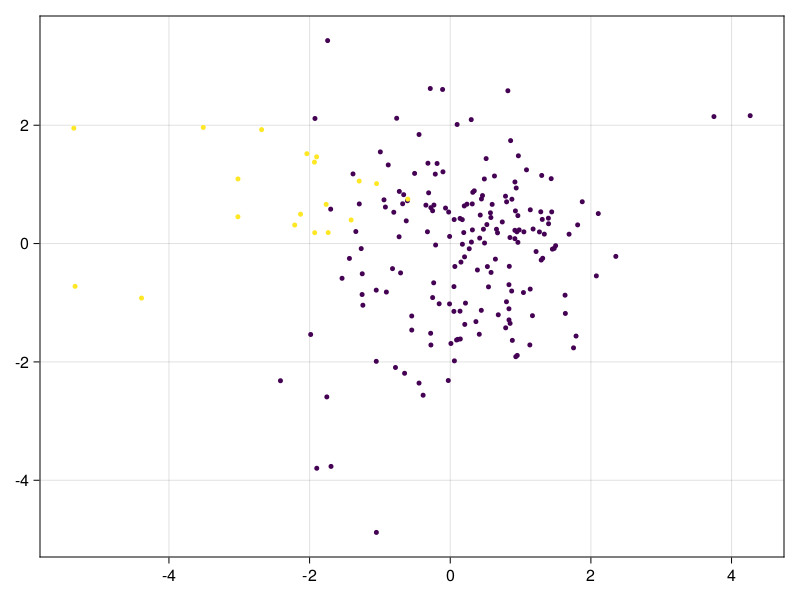

2×2 Matrix{Int64}:
 93   7
 88  12

0.525

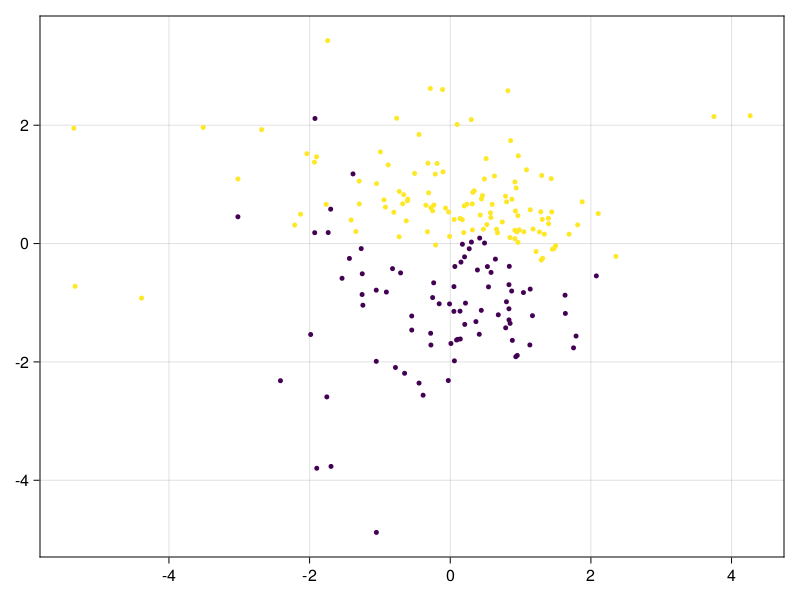

2×2 Matrix{Int64}:
 72  28
 11  89

0.805

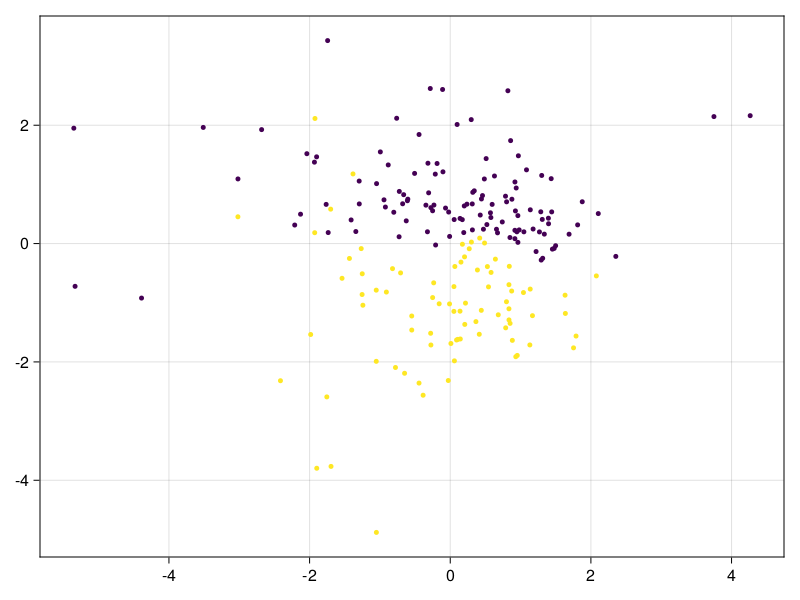

2×2 Matrix{Int64}:
 72  28
 10  90

0.81

True:1 and 4


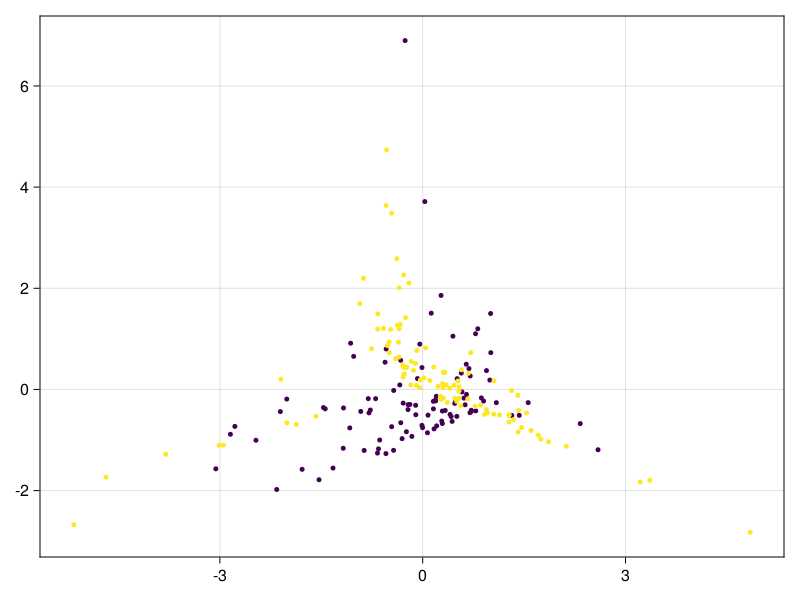

Predict:


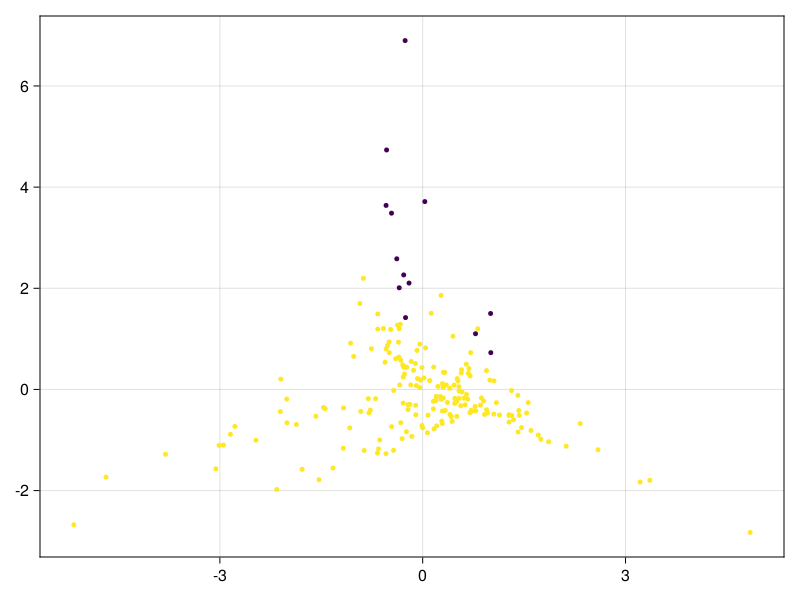

2×2 Matrix{Int64}:
 95  5
 92  8

0.515

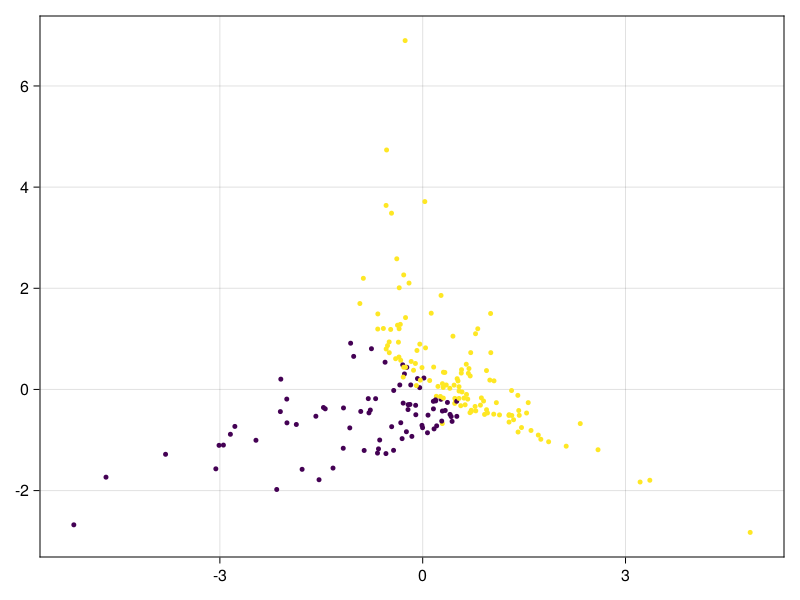

2×2 Matrix{Int64}:
 60  40
 19  81

0.705

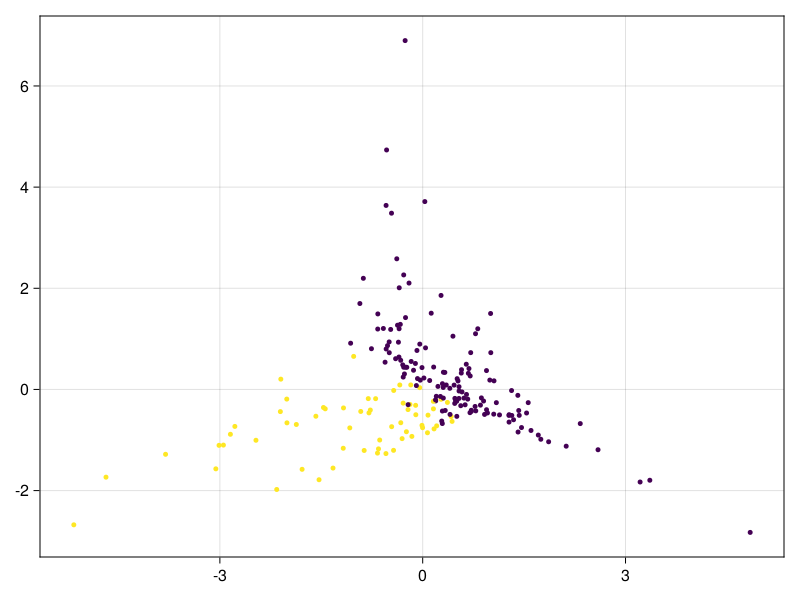

2×2 Matrix{Int64}:
 49  51
 13  87

0.68

True:1 and 5


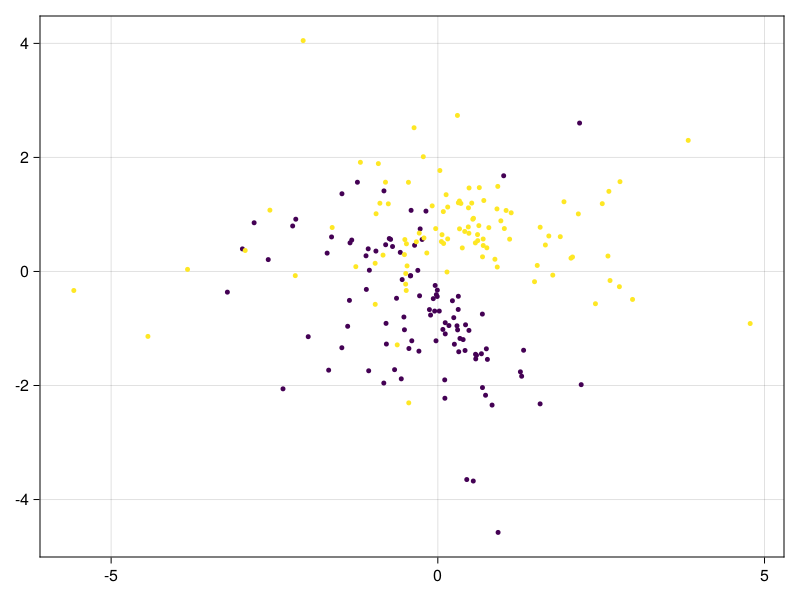

Predict:


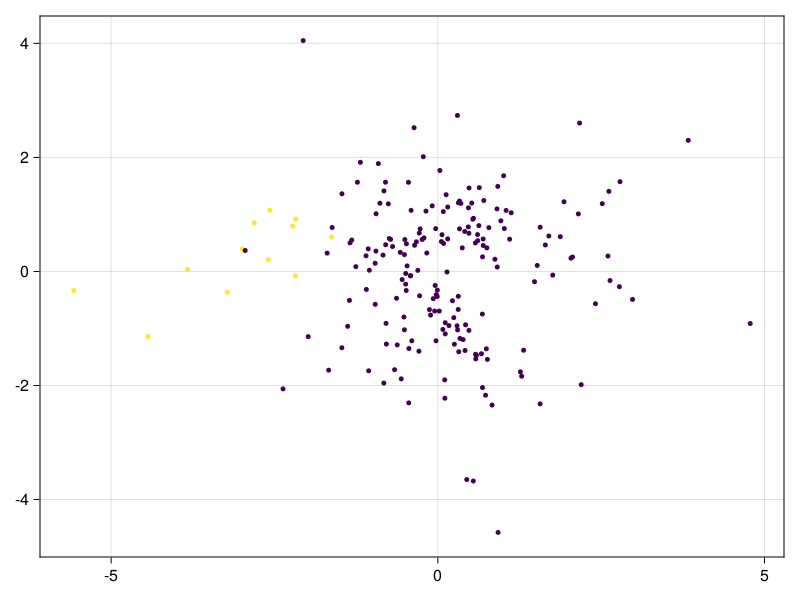

2×2 Matrix{Int64}:
 7  93
 5  95

0.51

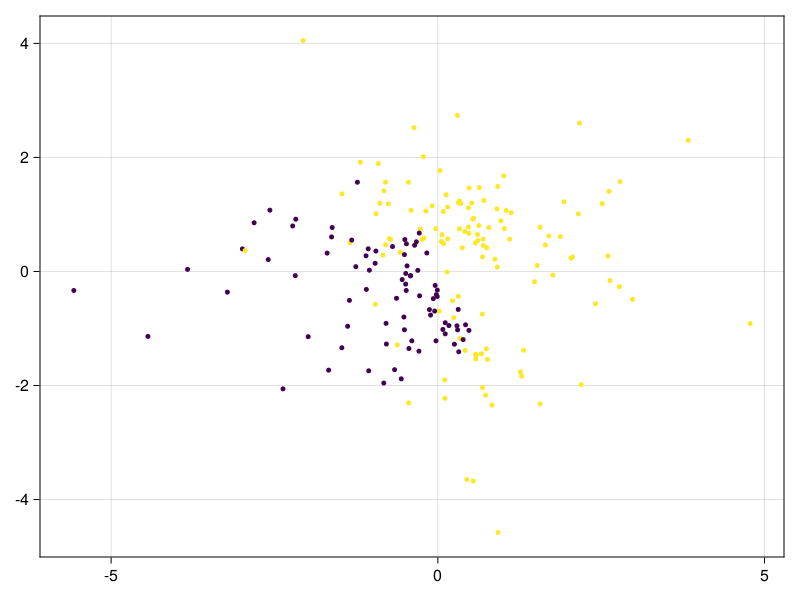

2×2 Matrix{Int64}:
 61  39
 18  82

0.715

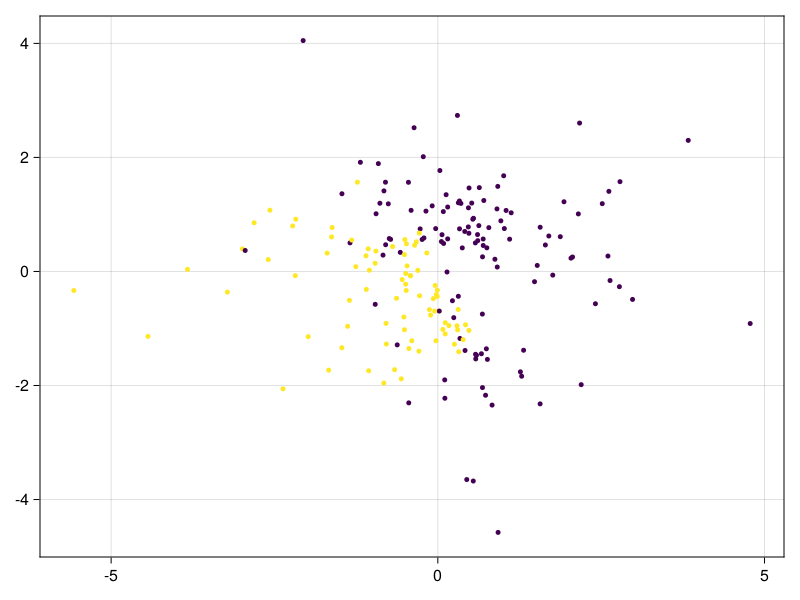

2×2 Matrix{Int64}:
 61  39
 18  82

0.715

True:1 and 6


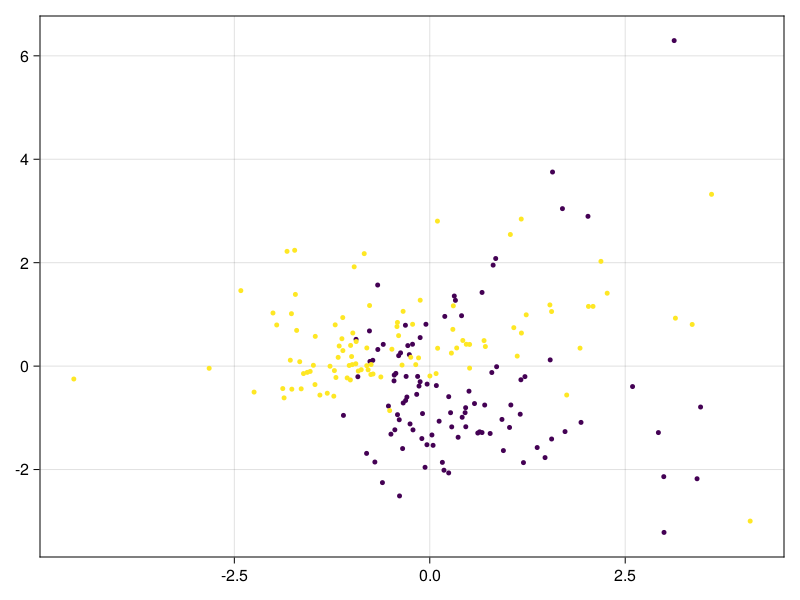

Predict:


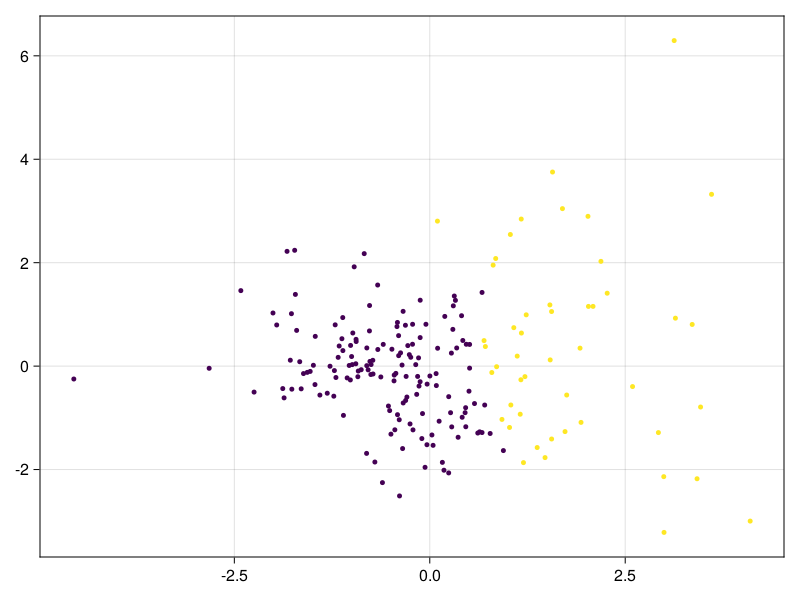

2×2 Matrix{Int64}:
 27  73
 21  79

0.53

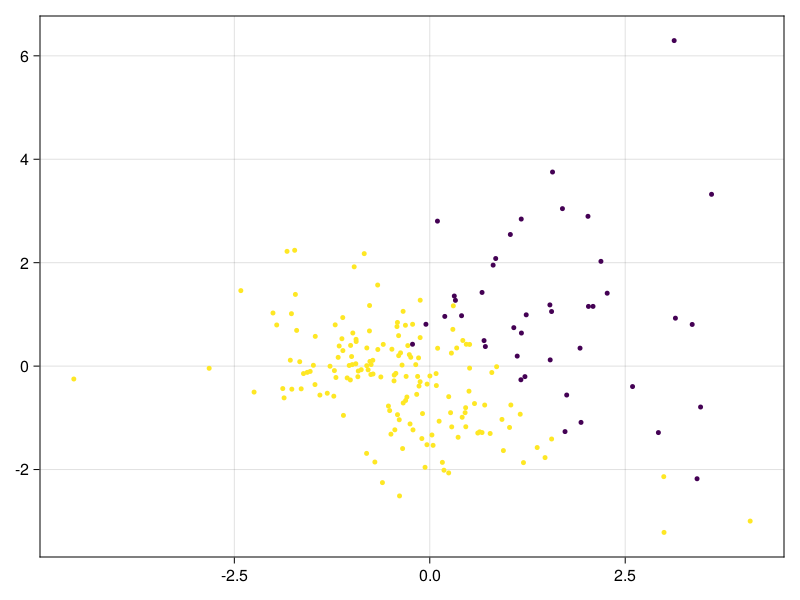

2×2 Matrix{Int64}:
 22  78
 20  80

0.51

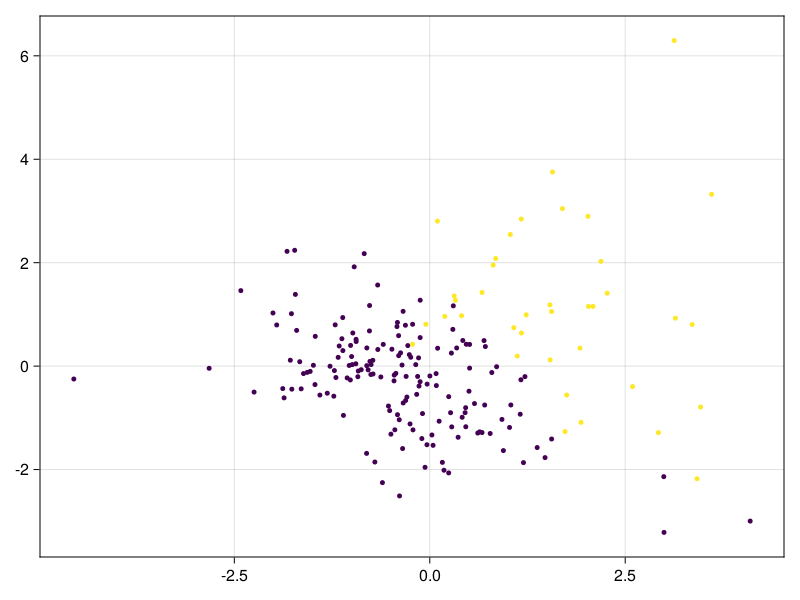

2×2 Matrix{Int64}:
 20  80
 18  82

0.51

True:1 and 7


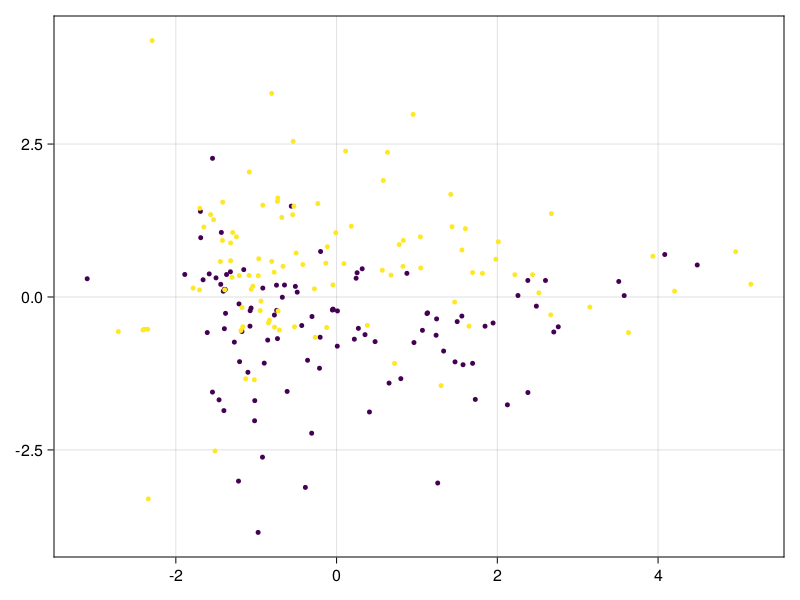

Predict:


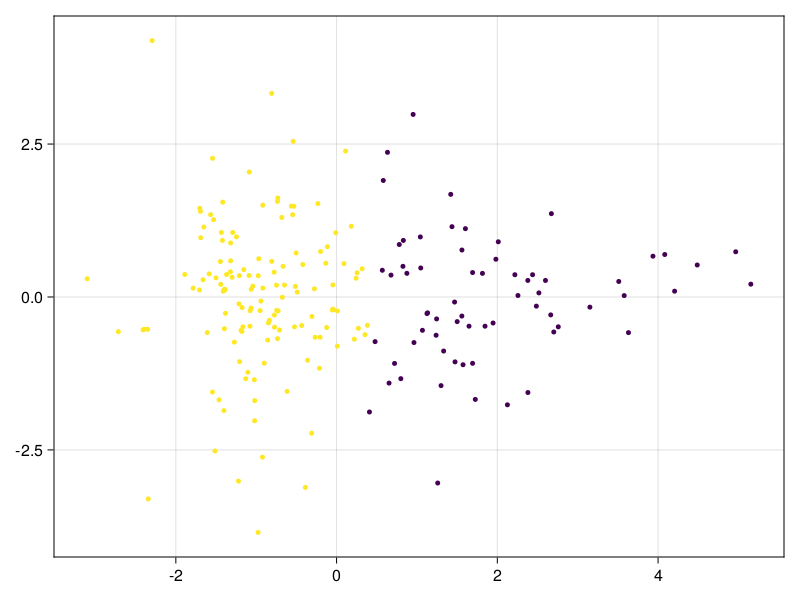

2×2 Matrix{Int64}:
 33  67
 33  67

0.5

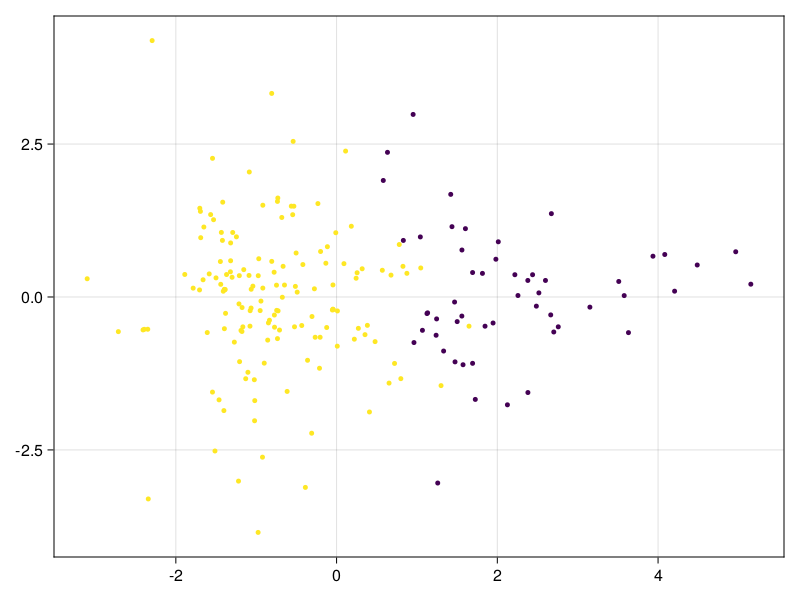

2×2 Matrix{Int64}:
 28  72
 25  75

0.515

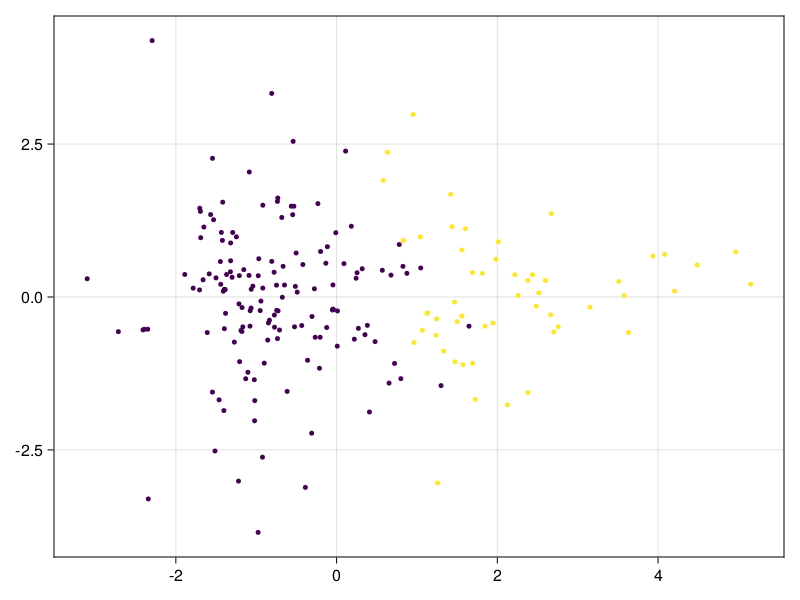

2×2 Matrix{Int64}:
 28  72
 25  75

0.515

True:1 and 8


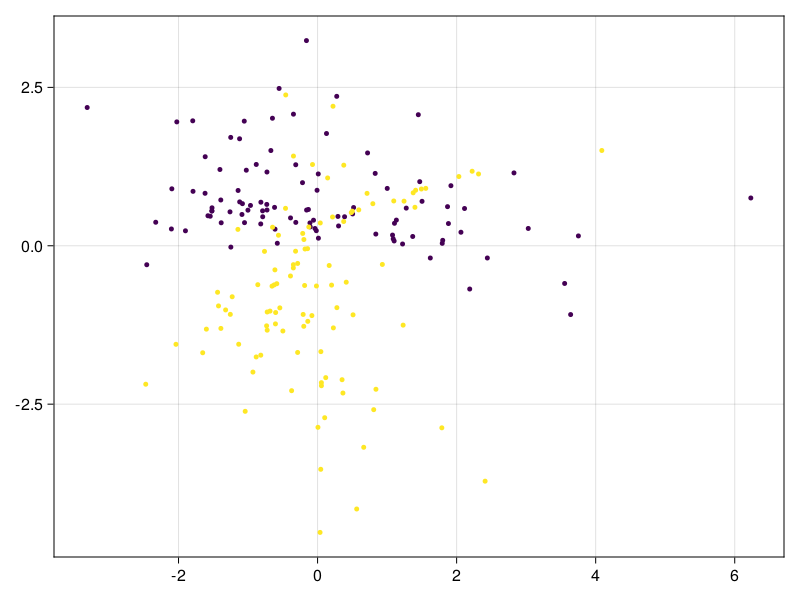

Predict:


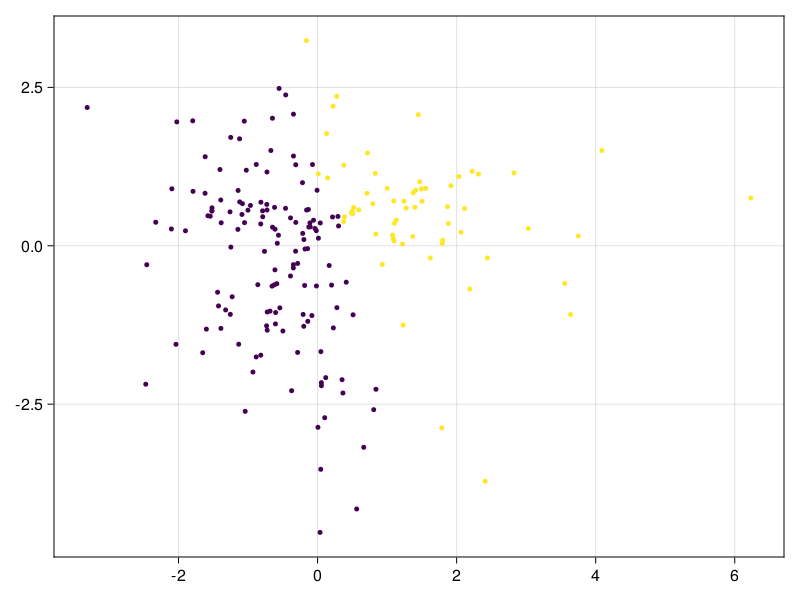

2×2 Matrix{Int64}:
 38  62
 24  76

0.57

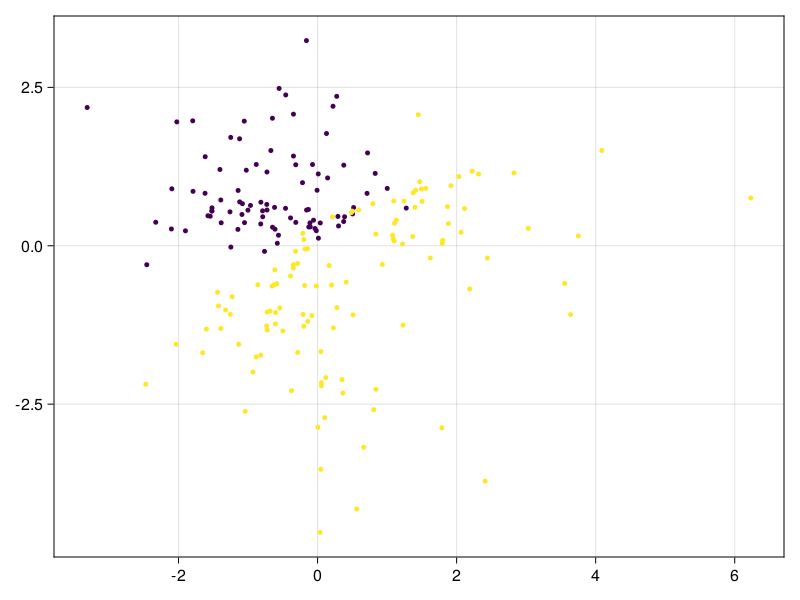

2×2 Matrix{Int64}:
 73  27
 15  85

0.79

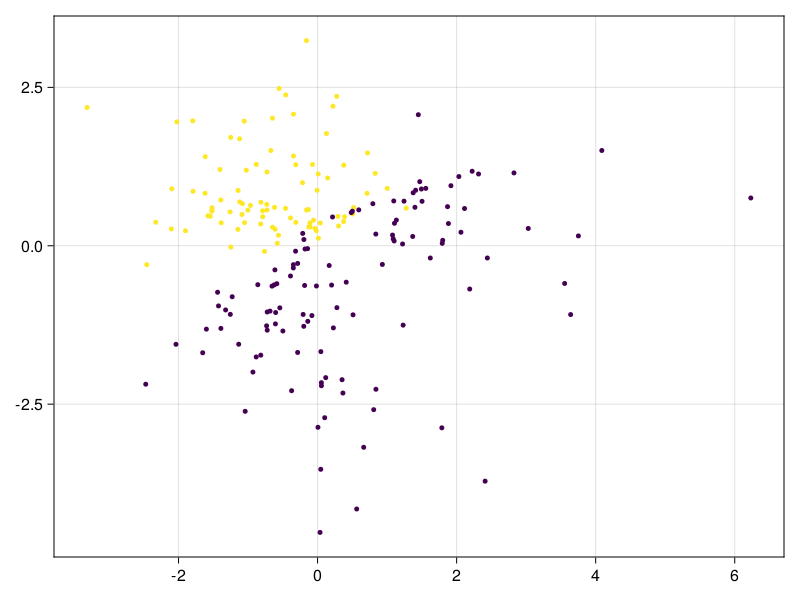

2×2 Matrix{Int64}:
 73  27
 15  85

0.79

True:1 and 9


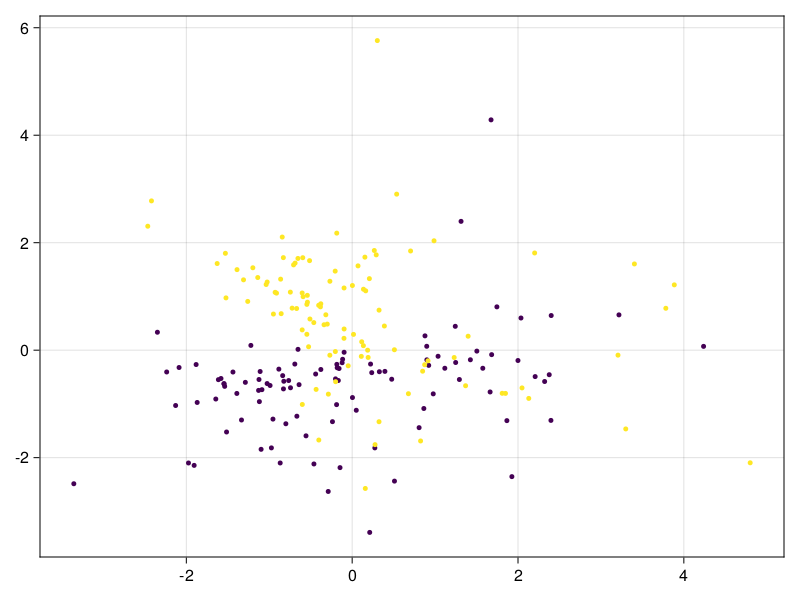

Predict:


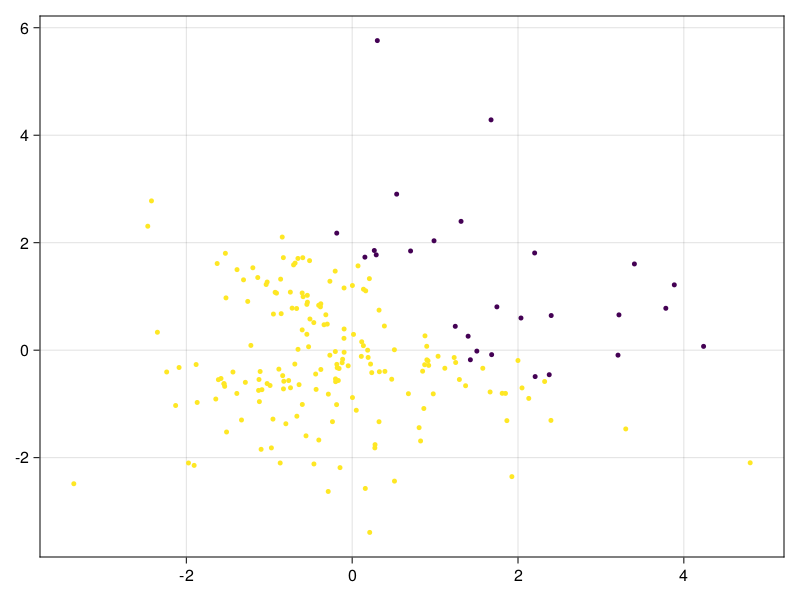

2×2 Matrix{Int64}:
 87  13
 86  14

0.505

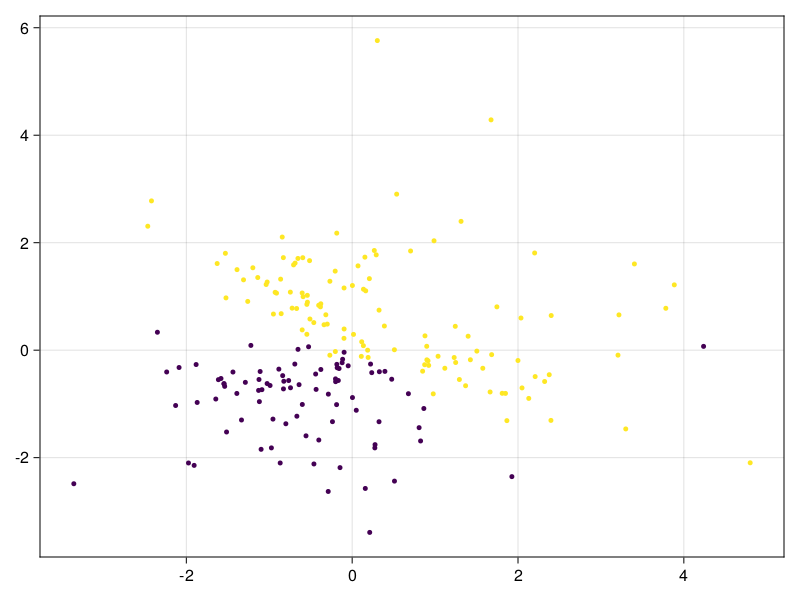

2×2 Matrix{Int64}:
 73  27
 12  88

0.805

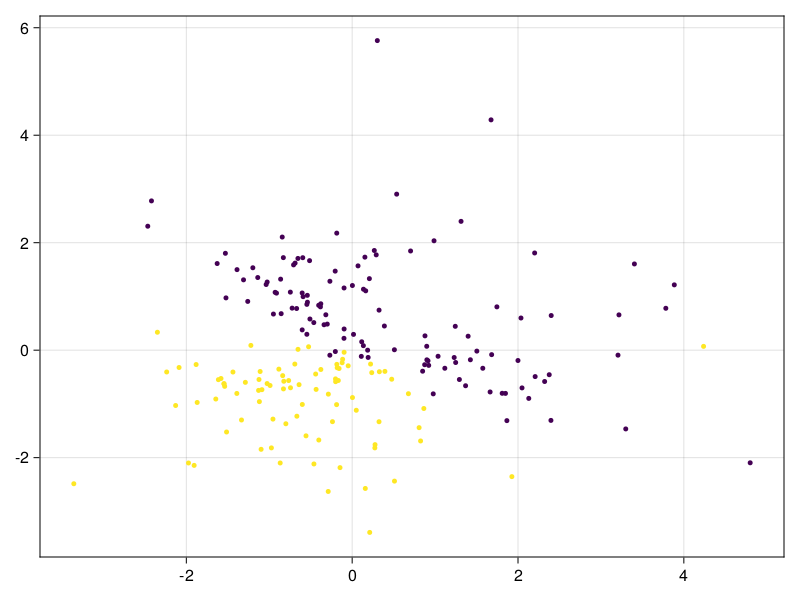

2×2 Matrix{Int64}:
 73  27
 12  88

0.805

True:1 and 10


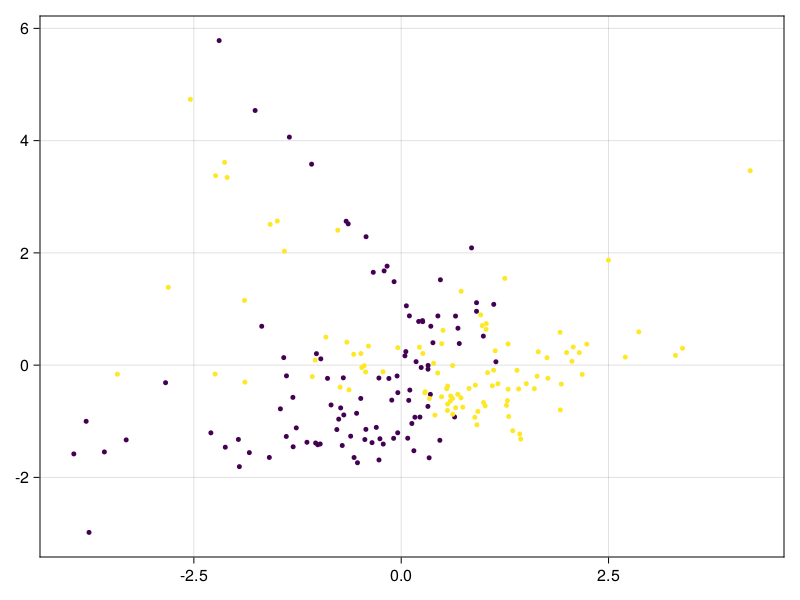

Predict:


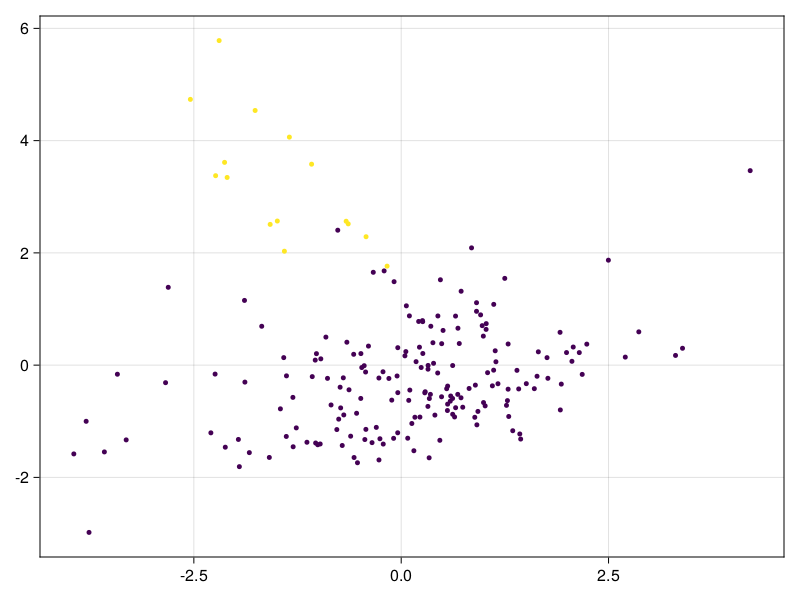

2×2 Matrix{Int64}:
 8  92
 7  93

0.505

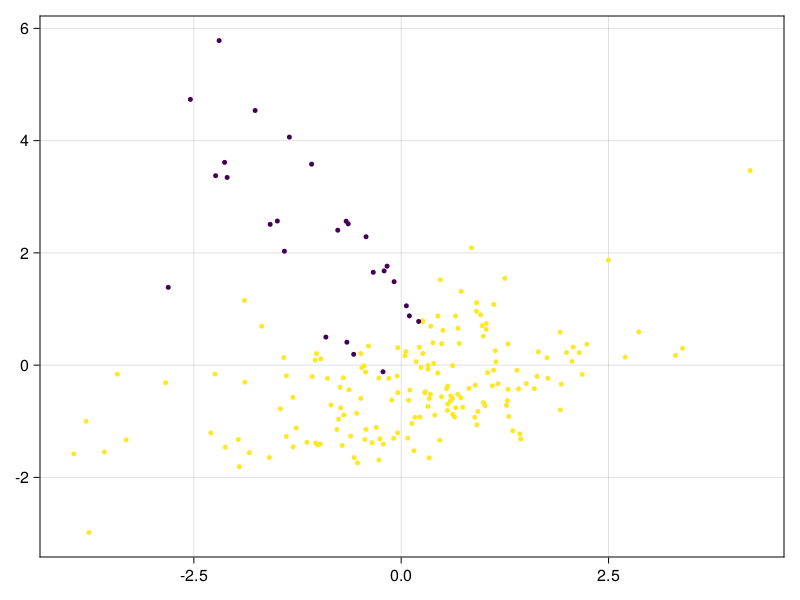

2×2 Matrix{Int64}:
 14  86
 13  87

0.505

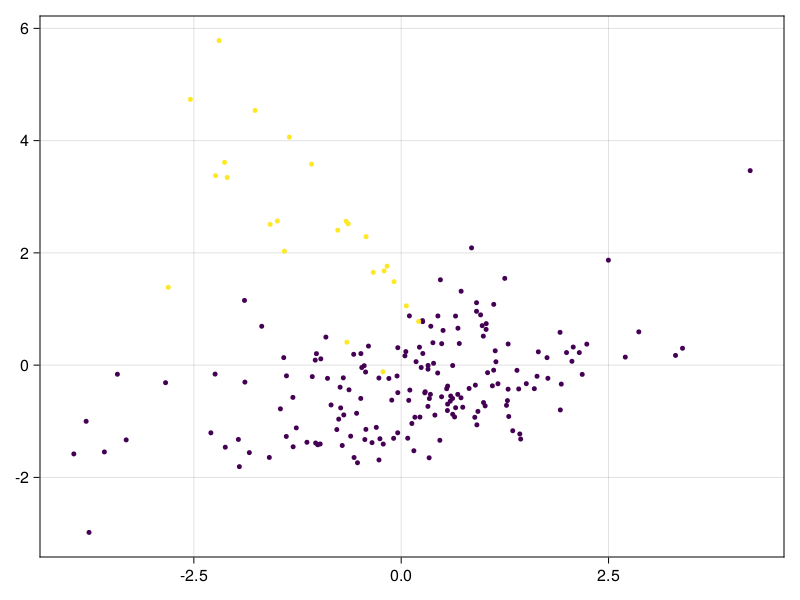

2×2 Matrix{Int64}:
 13  87
 11  89

0.51

True:1 and 11


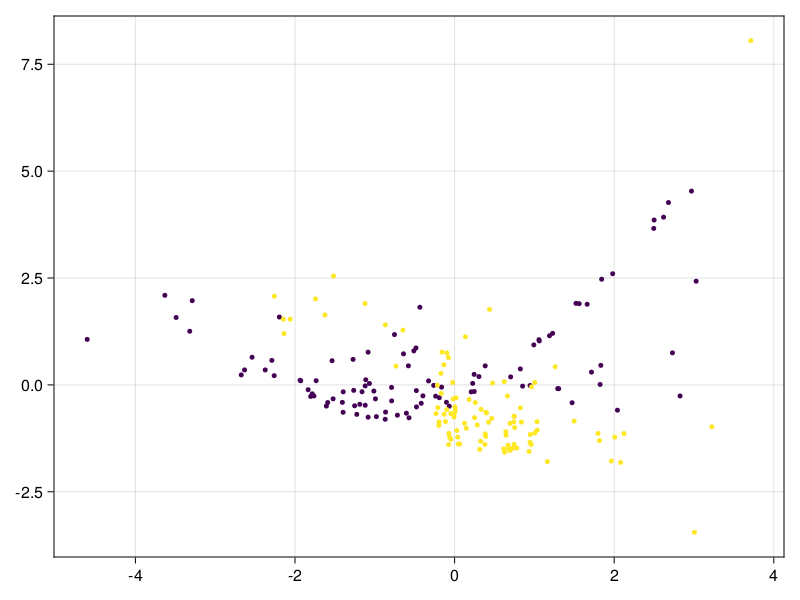

Predict:


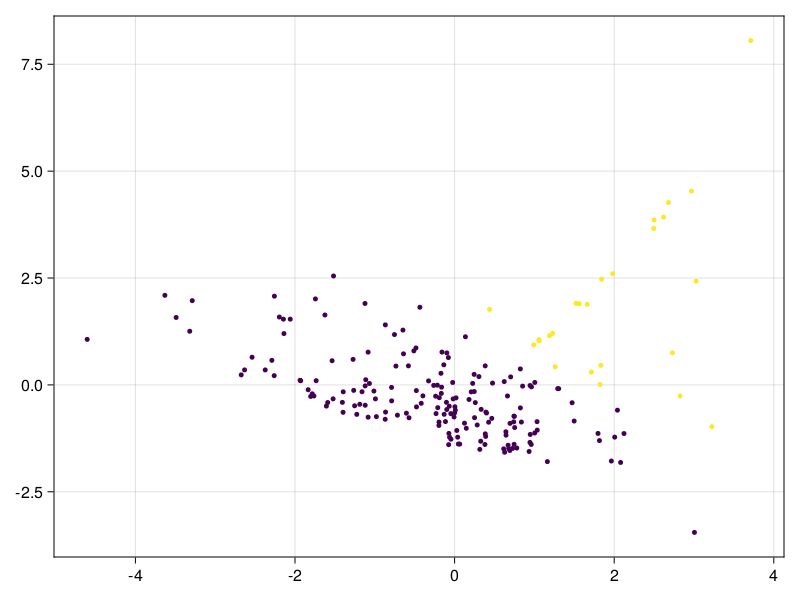

2×2 Matrix{Int64}:
 21  79
  4  96

0.585

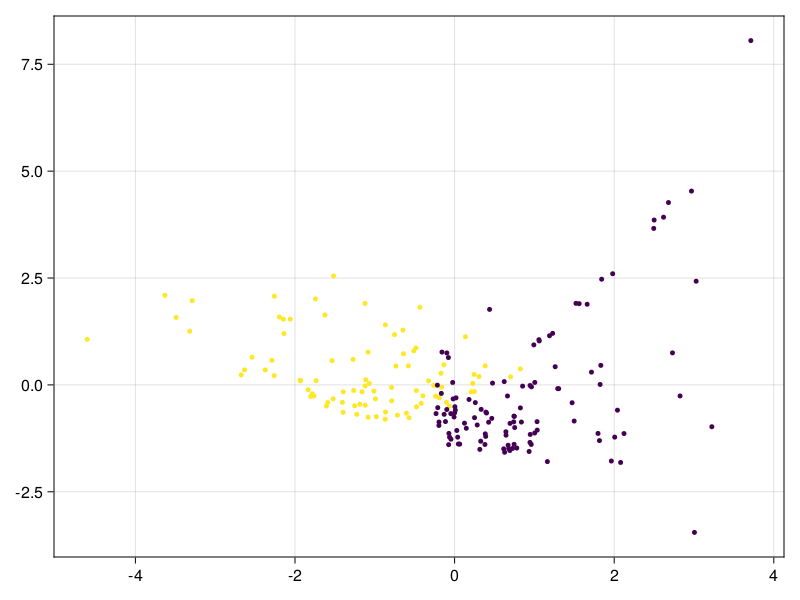

2×2 Matrix{Int64}:
 73  27
 14  86

0.795

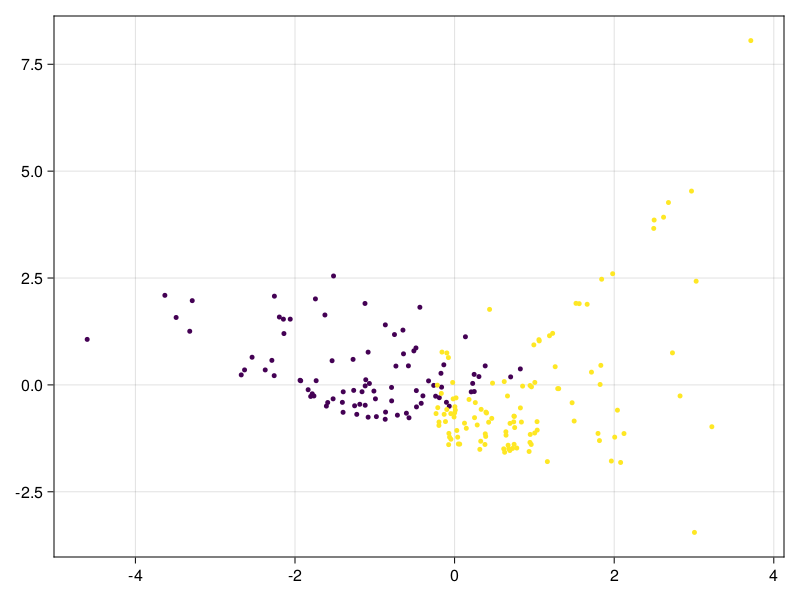

2×2 Matrix{Int64}:
 73  27
 14  86

0.795

True:1 and 12


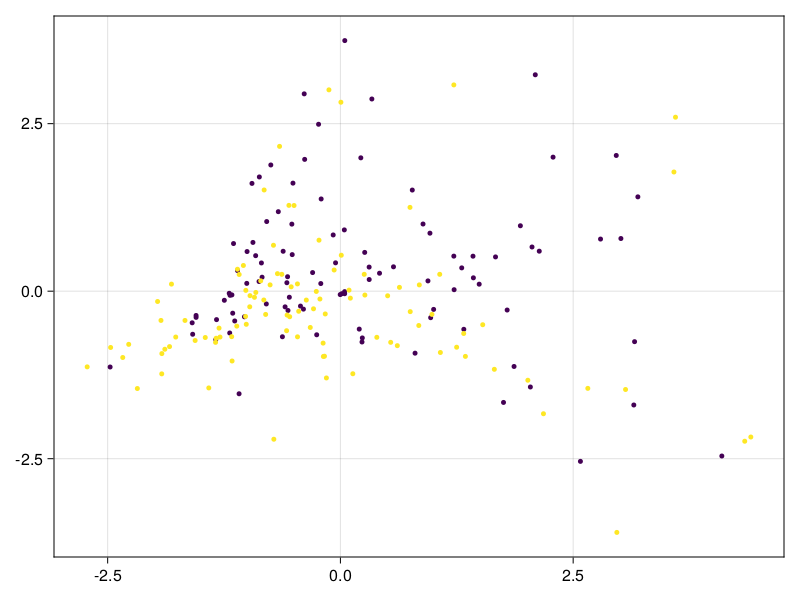

Predict:


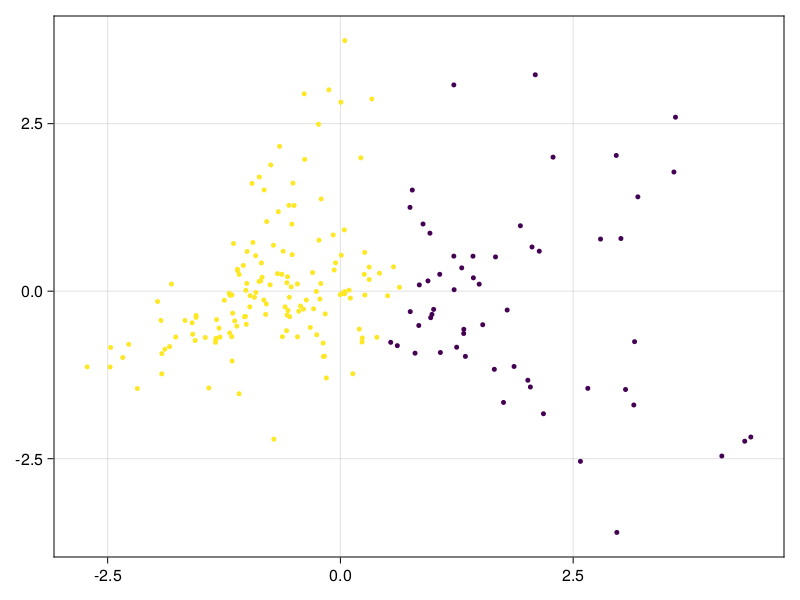

2×2 Matrix{Int64}:
 32  68
 24  76

0.54

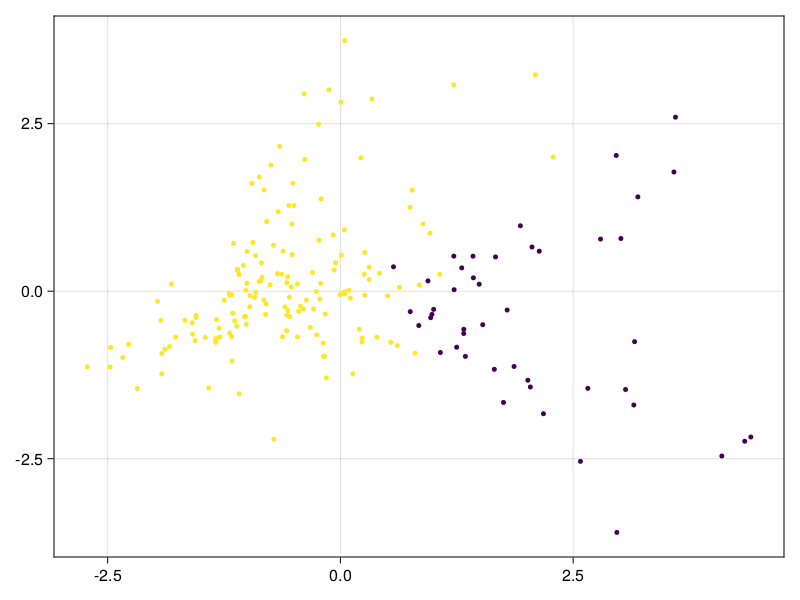

2×2 Matrix{Int64}:
 27  73
 18  82

0.545

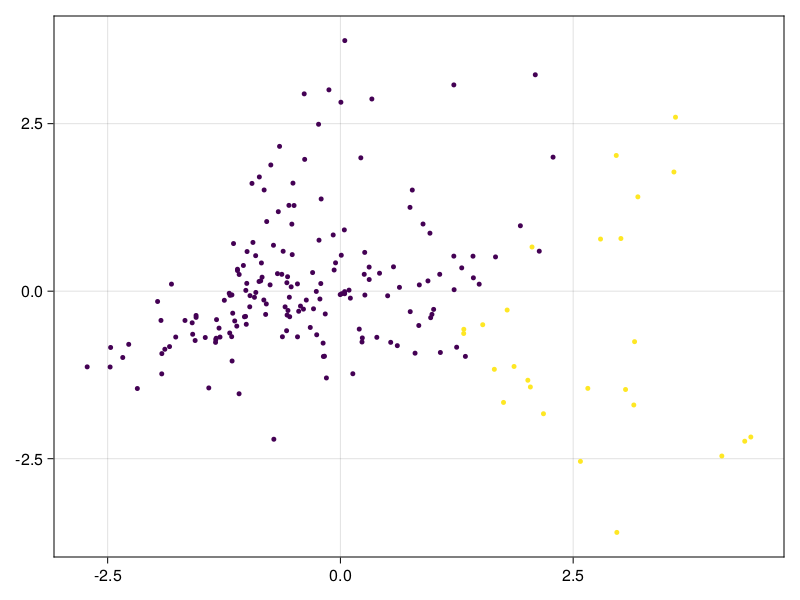

2×2 Matrix{Int64}:
 14  86
 12  88

0.51

True:1 and 13


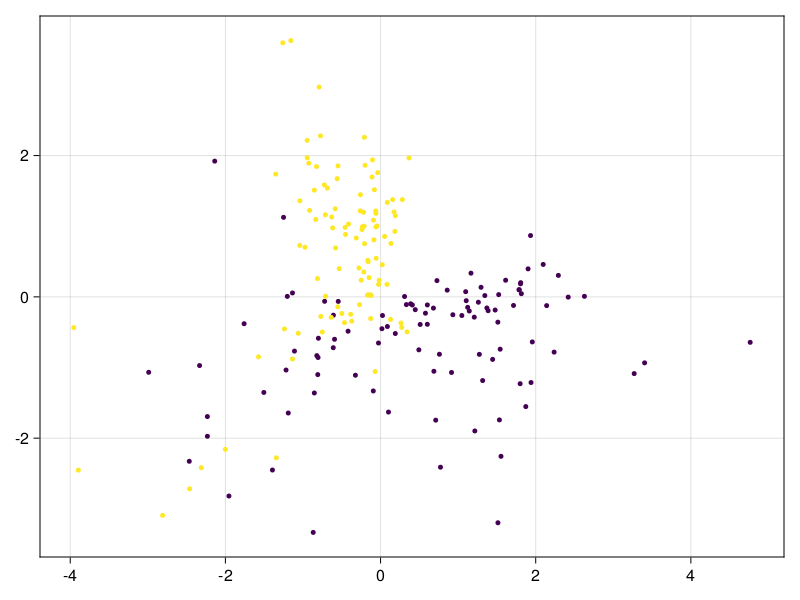

Predict:


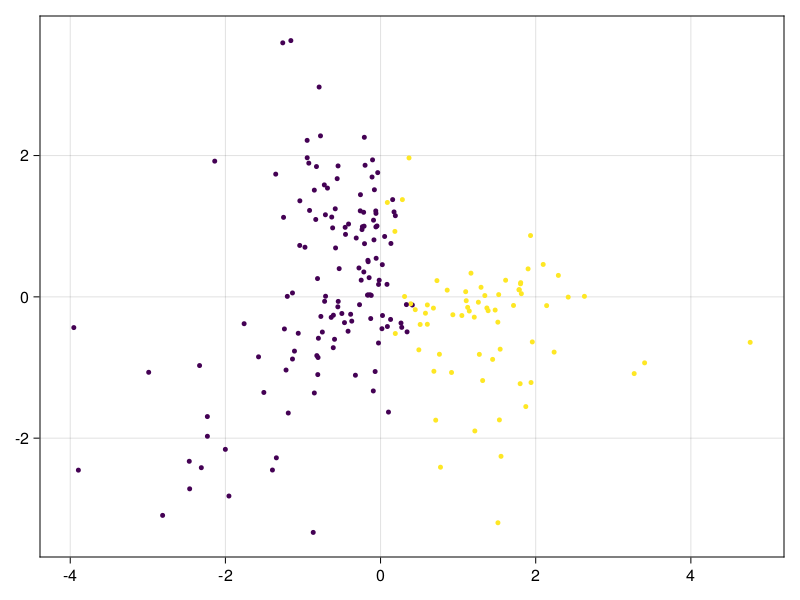

2×2 Matrix{Int64}:
 63  37
  4  96

0.795

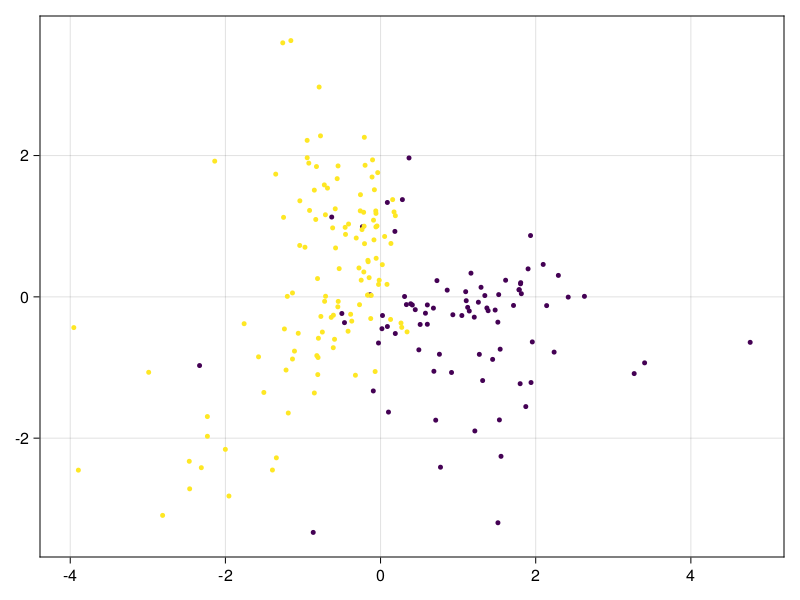

2×2 Matrix{Int64}:
 73  27
  9  91

0.82

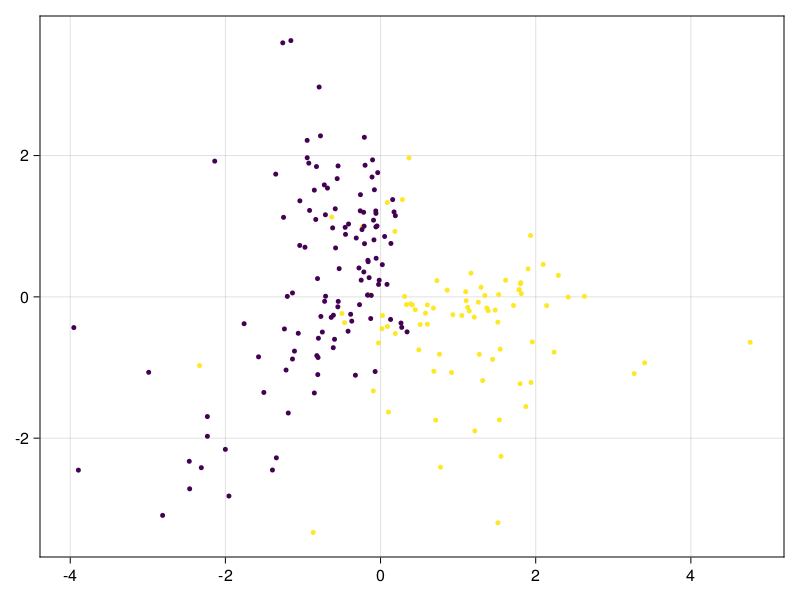

2×2 Matrix{Int64}:
 73  27
  9  91

0.82

True:1 and 14


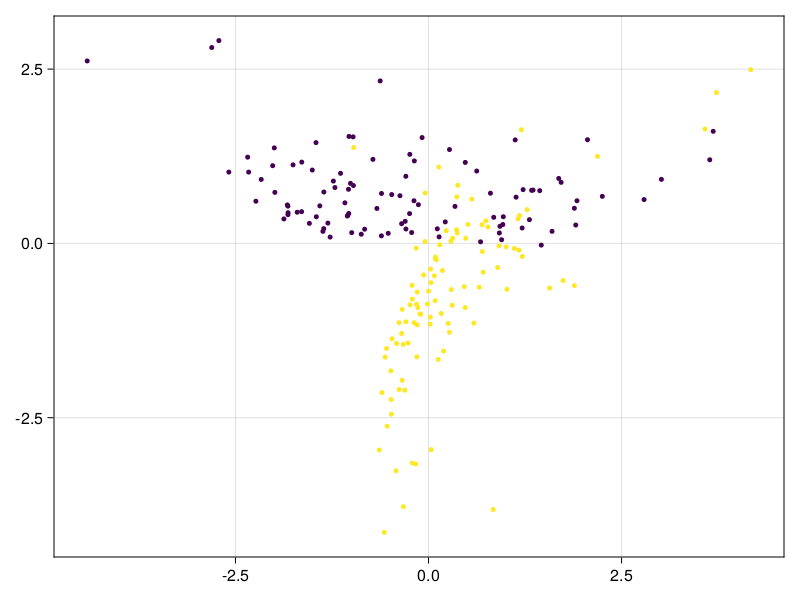

Predict:


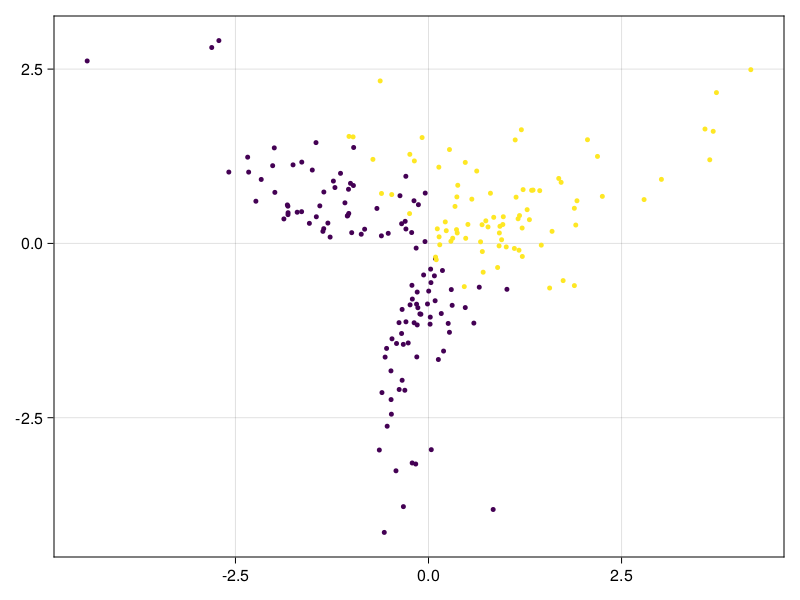

2×2 Matrix{Int64}:
 46  54
 37  63

0.545

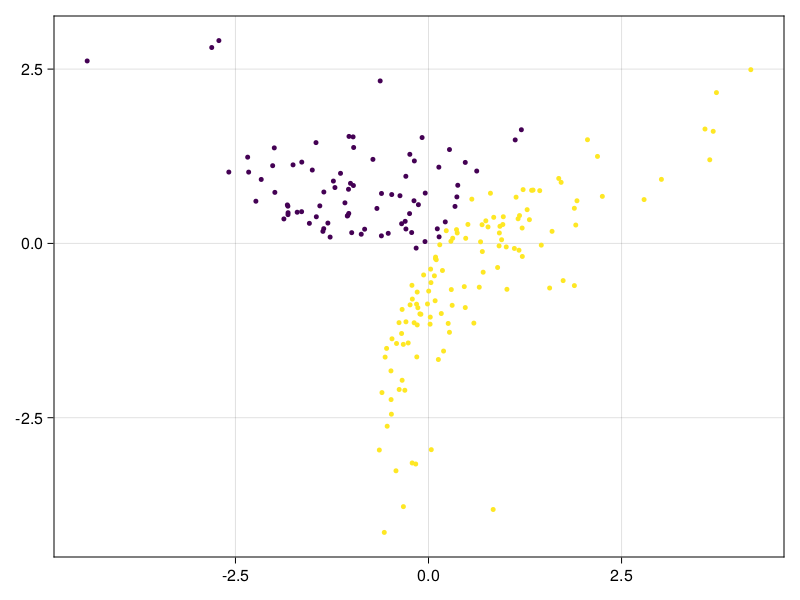

2×2 Matrix{Int64}:
 72  28
  8  92

0.82

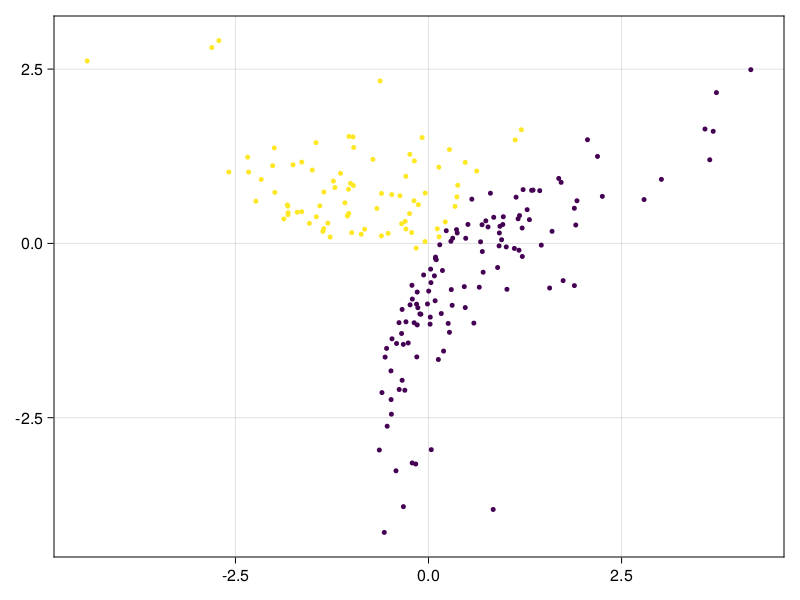

2×2 Matrix{Int64}:
 72  28
  8  92

0.82



In [80]:
@suppress_err begin
    fixed = trees[10]
    compared = copy(trees)
    compared = deleteat!(compared, 10)
    counter = 1
    for i in compared
        gt = ground_true(fixed,i)
        tree = vcat(fixed ,i)
        tree = standardize_tree(tree)

        print("True:")
        println(1, " and ",counter)   
        counter +=1
        display(plot_clusters(tree, gt))
        
        pred_kmeans = kmeans_label(tree, 2) 
        println("Predict:")
        display(plot_clusters(tree, pred_kmeans))
        m,x = accuracy(2, gt, pred_kmeans)
        display(m)
        print(x)

        pred_prob, pred_llpg = GMM_label(tree, 2, method = :split)
        display(plot_clusters(tree, pred_prob))
        m,x = accuracy(2, gt, pred_prob)
        display(m)
        print(x)

        display(plot_clusters(tree, pred_llpg))
        m,x = accuracy(2, gt, pred_llpg)
        display(m)
        println(x)
        println()
    end
end

True:1 and 1


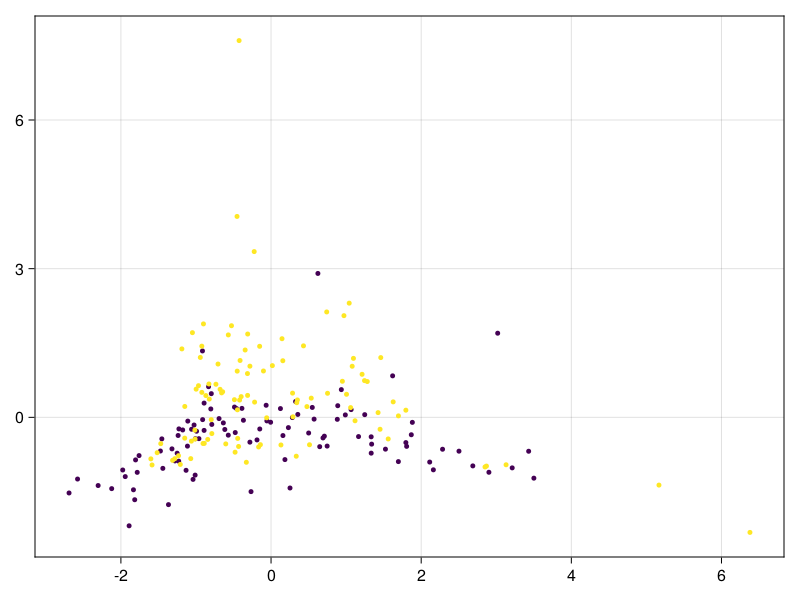

Predict:


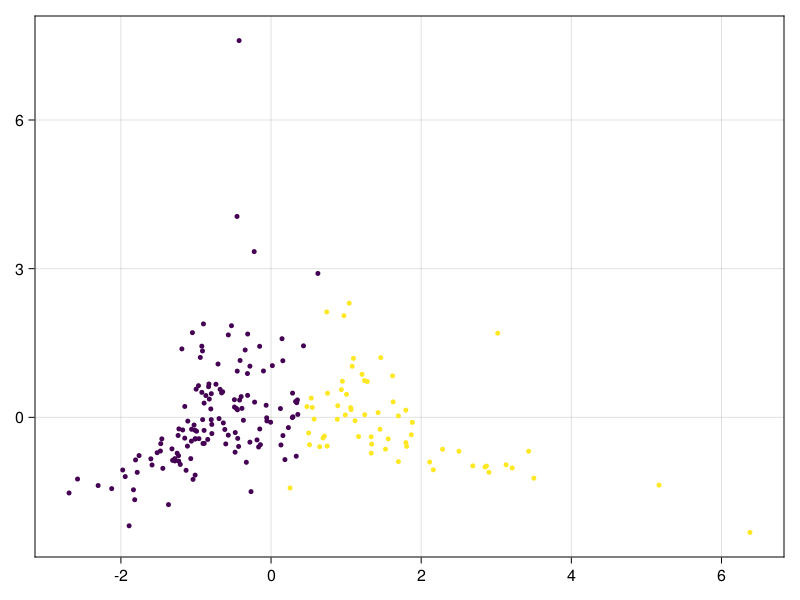

2×2 Matrix{Int64}:
 35  65
 28  72

0.535

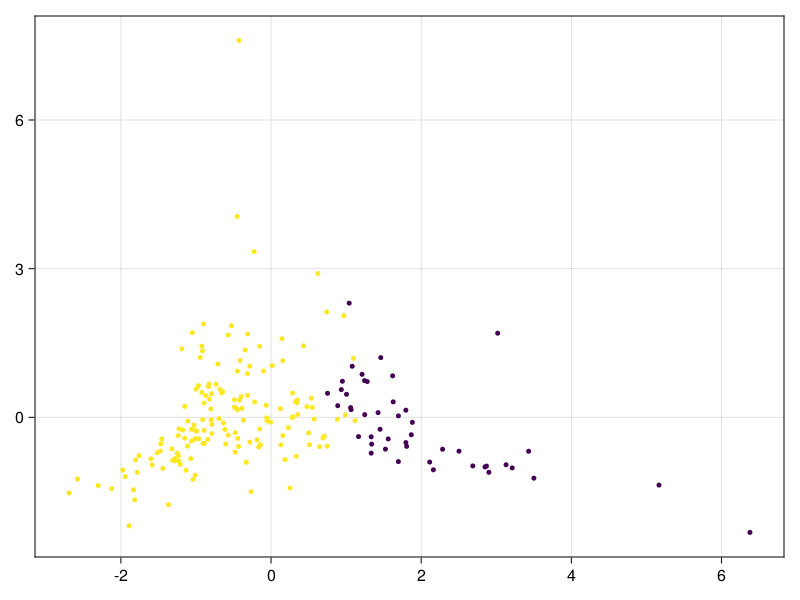

2×2 Matrix{Int64}:
 25  75
 21  79

0.52

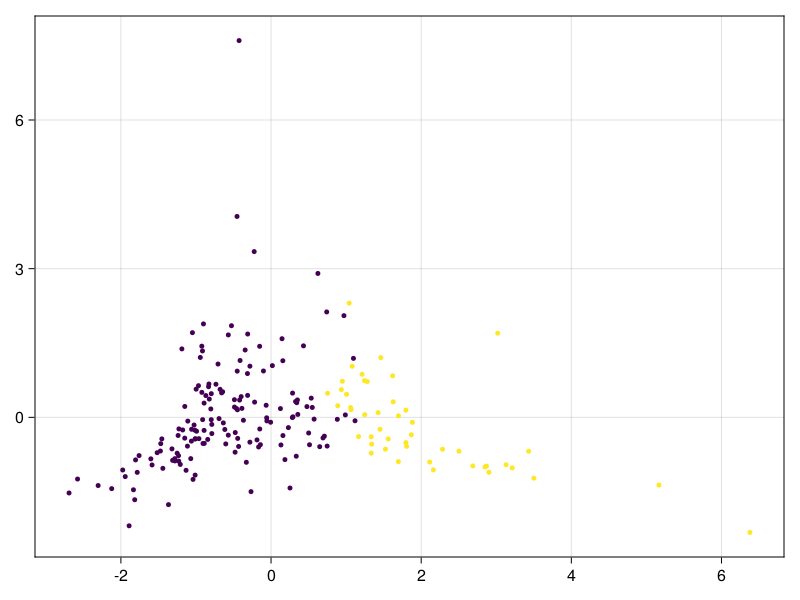

2×2 Matrix{Int64}:
 25  75
 21  79

0.52

True:1 and 2


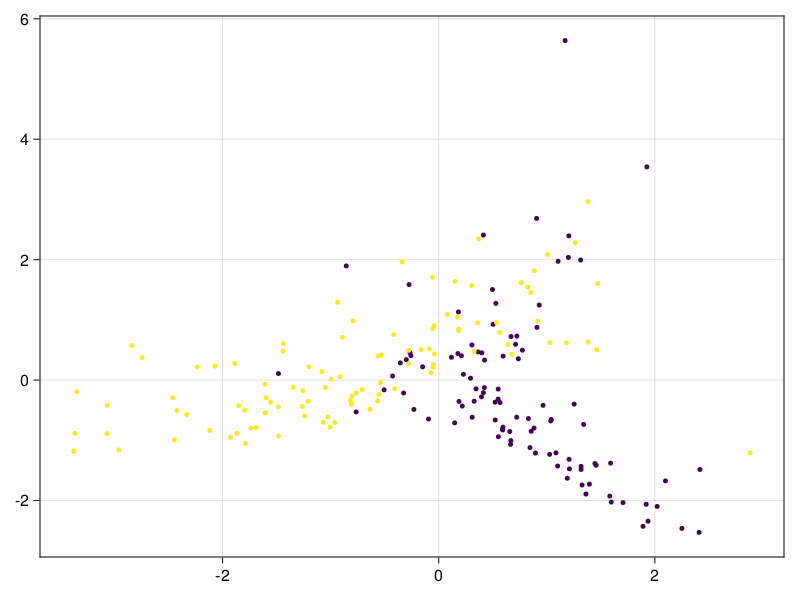

Predict:


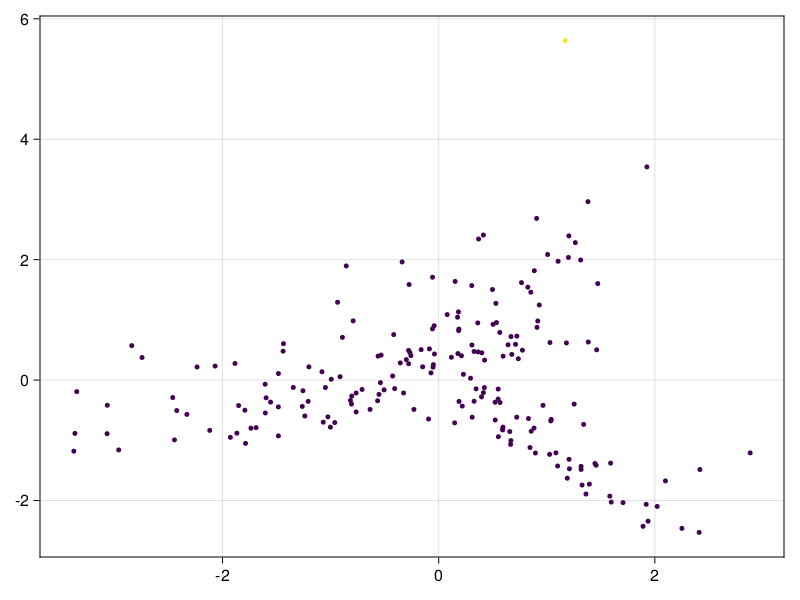

2×2 Matrix{Int64}:
 1   99
 0  100

0.505

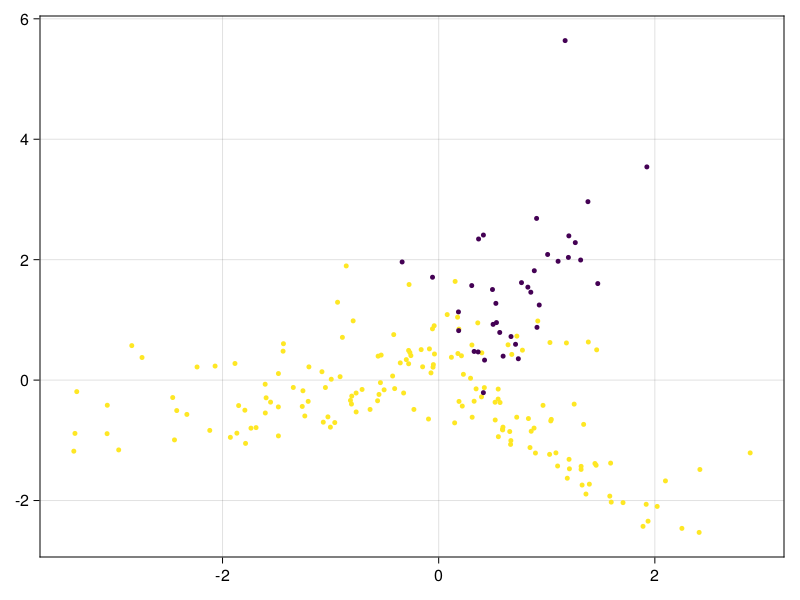

2×2 Matrix{Int64}:
 21  79
 16  84

0.525

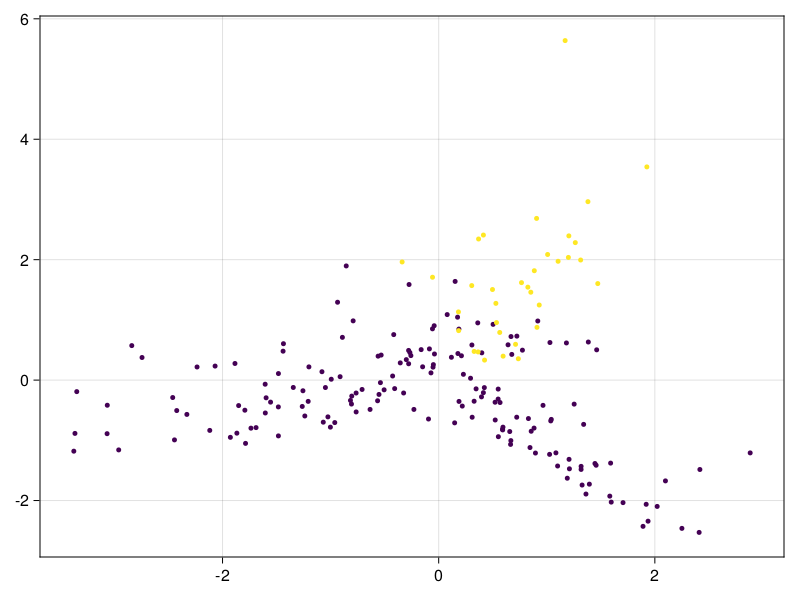

2×2 Matrix{Int64}:
 18  82
 16  84

0.51

True:1 and 3


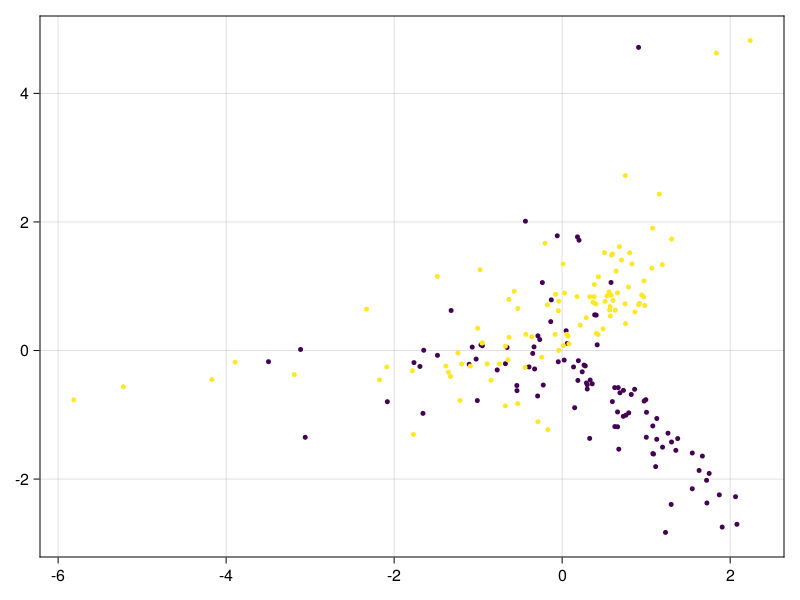

Predict:


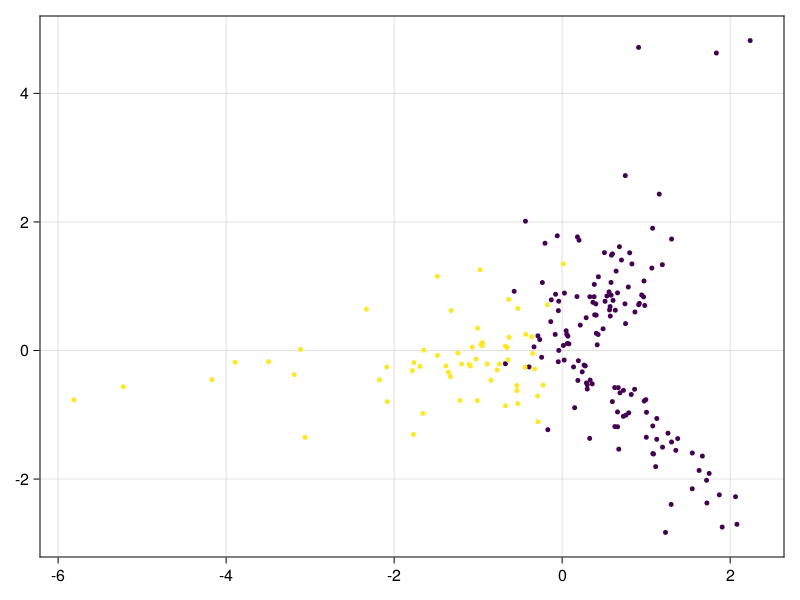

2×2 Matrix{Int64}:
 76  24
 62  38

0.57

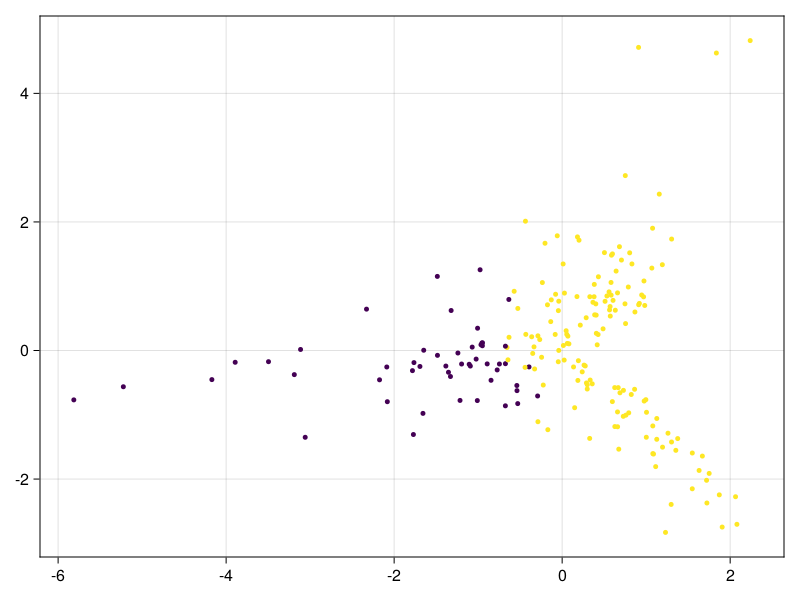

2×2 Matrix{Int64}:
 78  22
 71  29

0.535

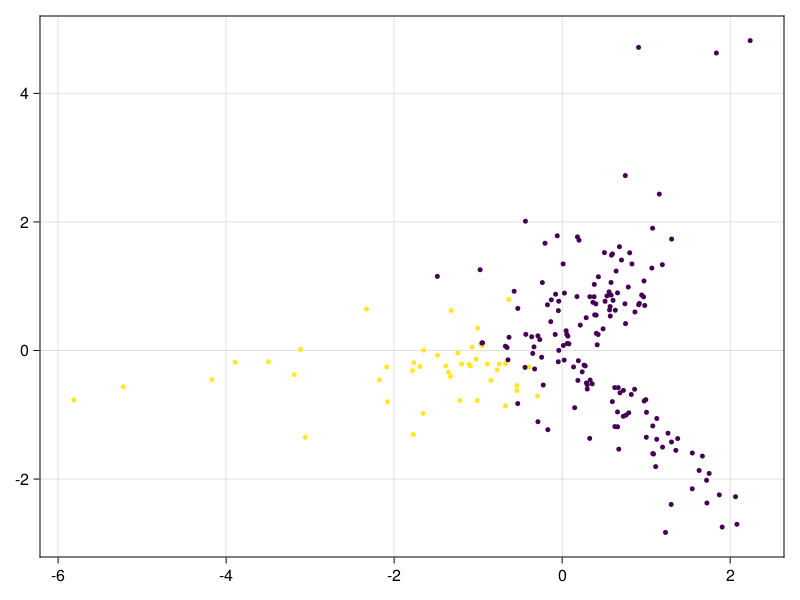

2×2 Matrix{Int64}:
 78  22
 77  23

0.505

True:1 and 4


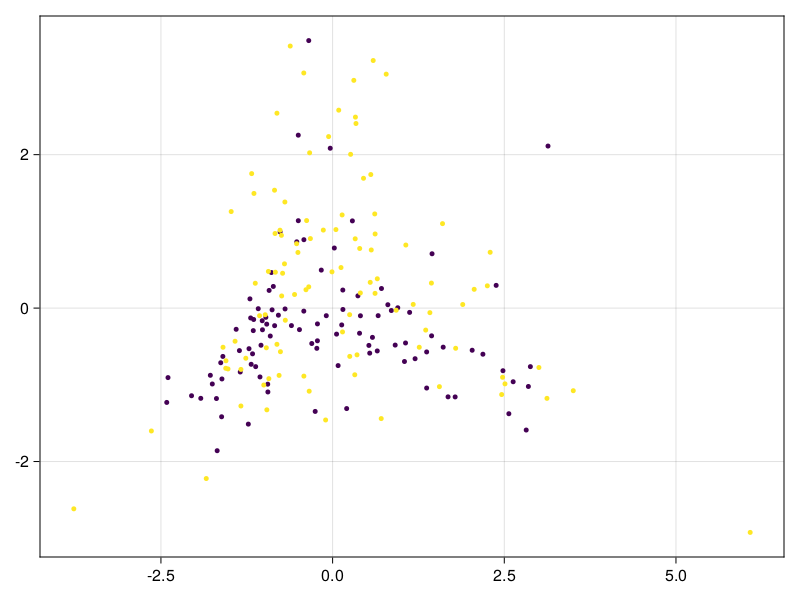

Predict:


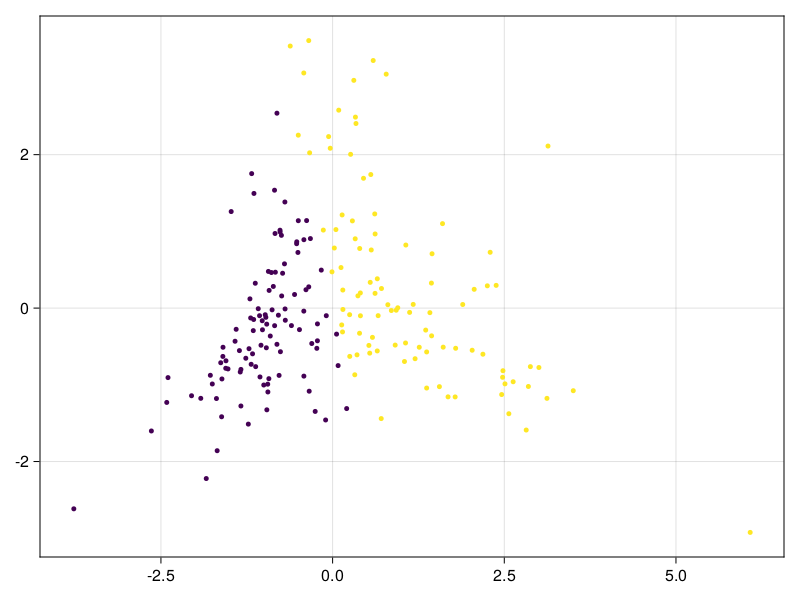

2×2 Matrix{Int64}:
 58  42
 46  54

0.56

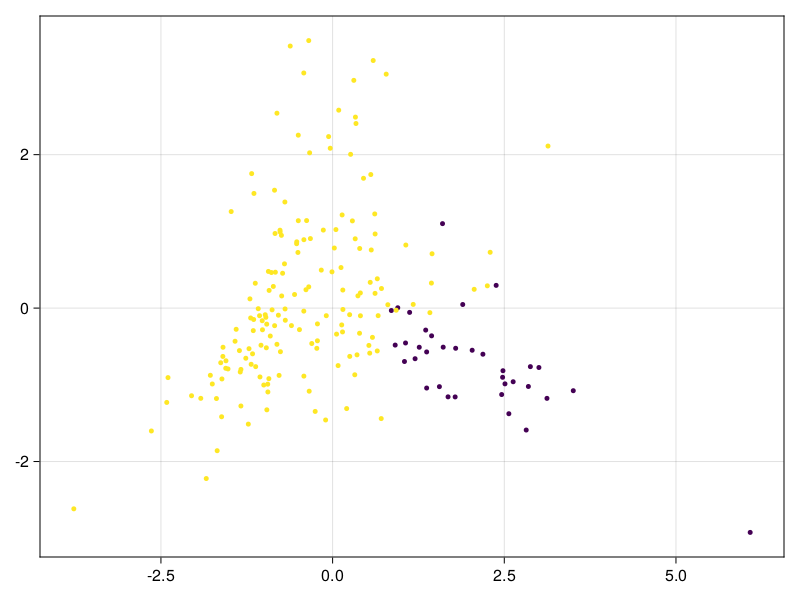

2×2 Matrix{Int64}:
 22  78
 13  87

0.545

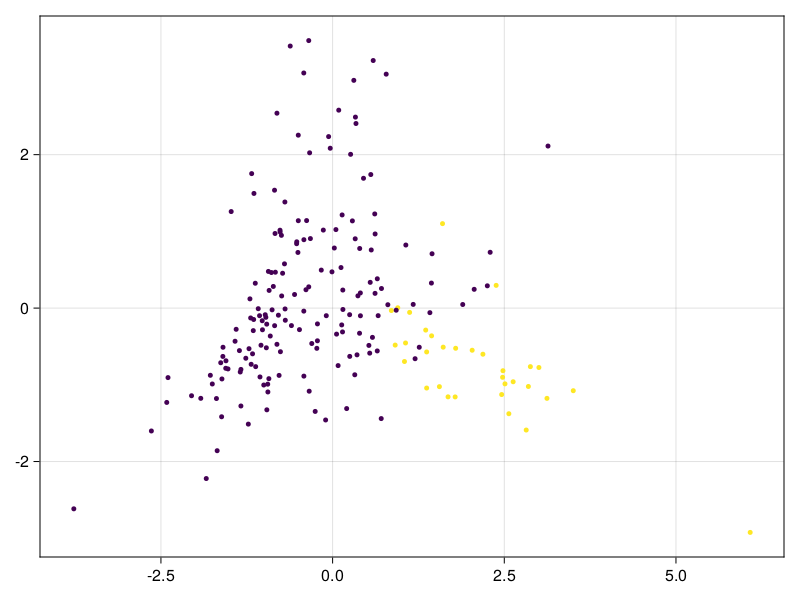

2×2 Matrix{Int64}:
 21  79
 11  89

0.55

True:1 and 5


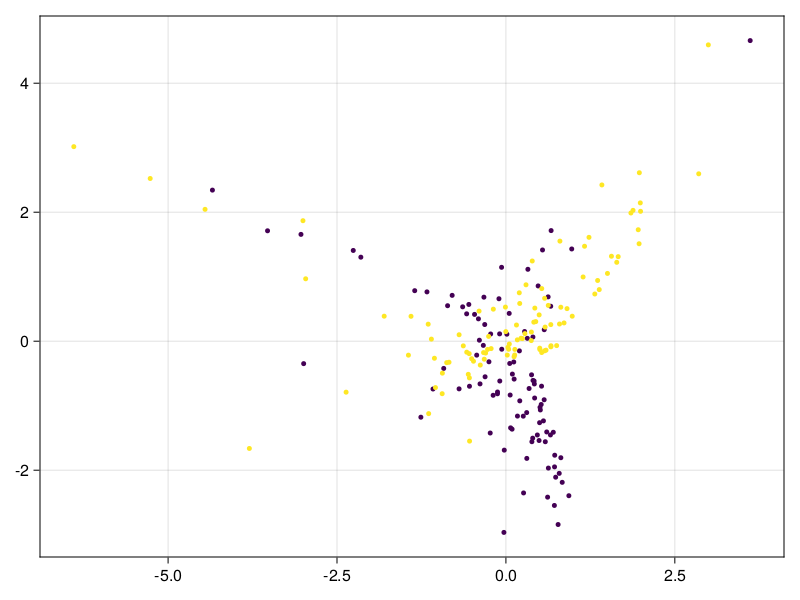

Predict:


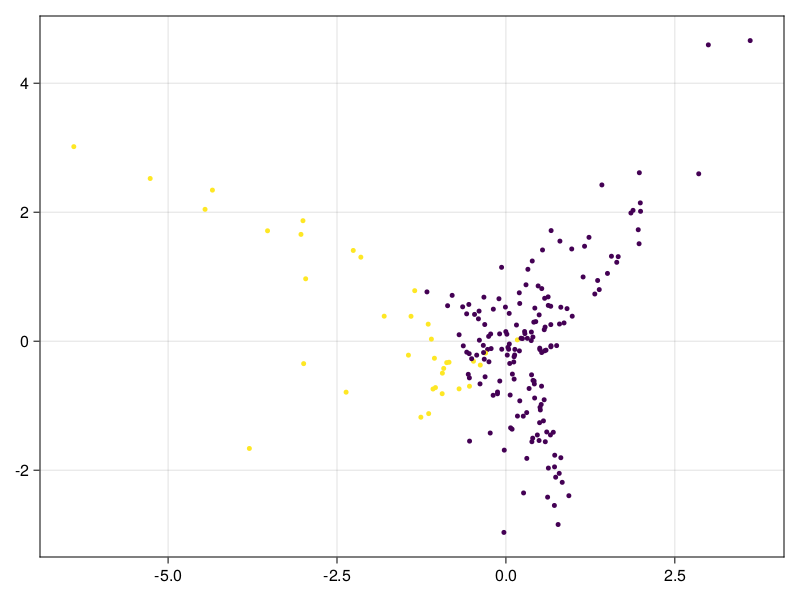

2×2 Matrix{Int64}:
 88  12
 77  23

0.555

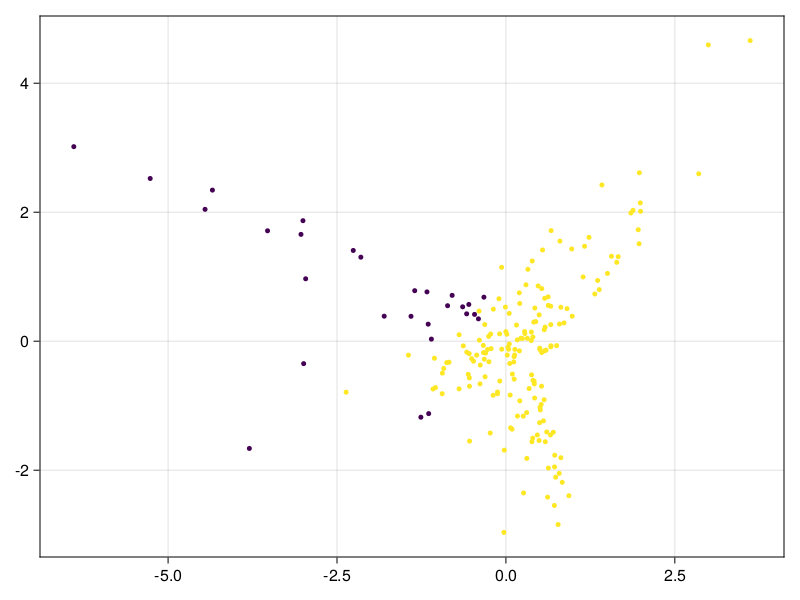

2×2 Matrix{Int64}:
 17  83
 11  89

0.53

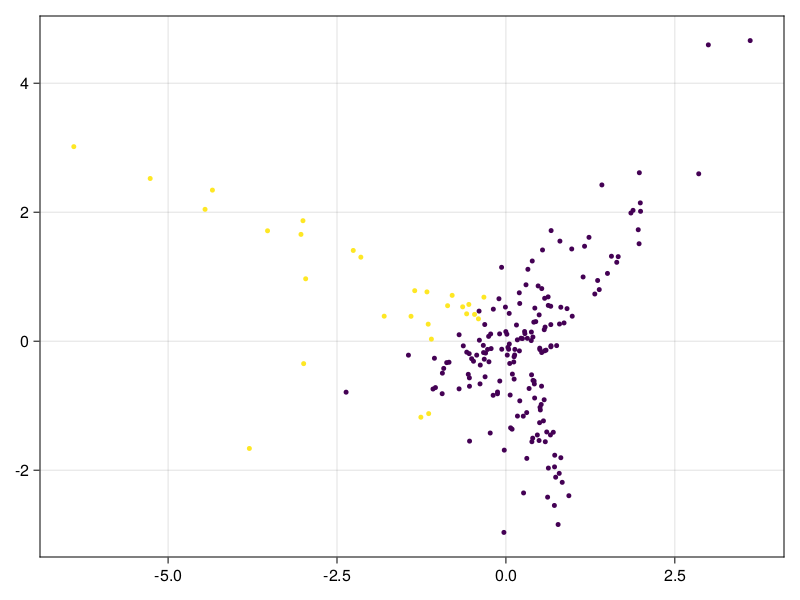

2×2 Matrix{Int64}:
 17  83
 11  89

0.53

True:1 and 6


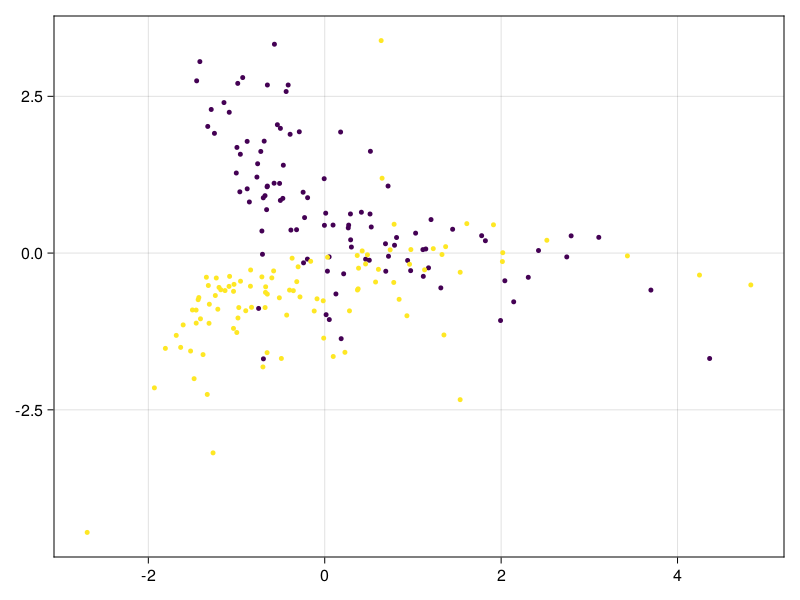

Predict:


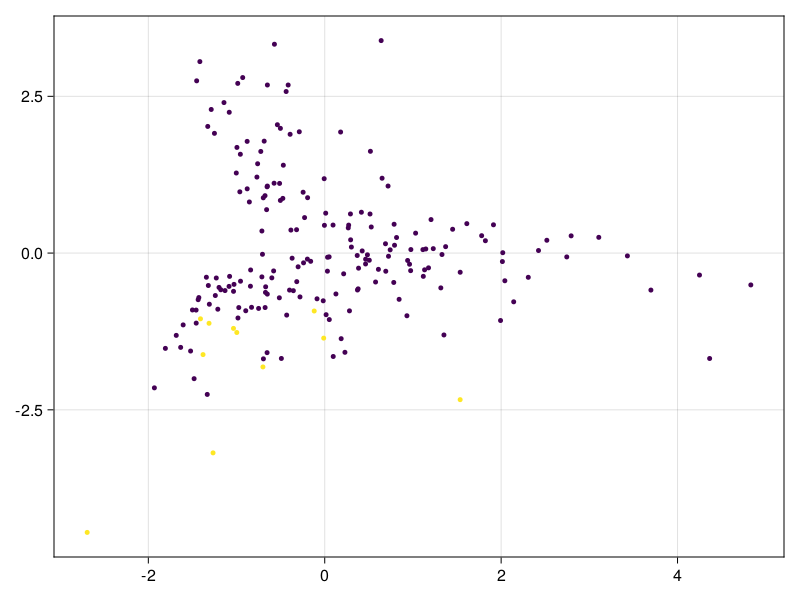

2×2 Matrix{Int64}:
 100   0
  89  11

0.555

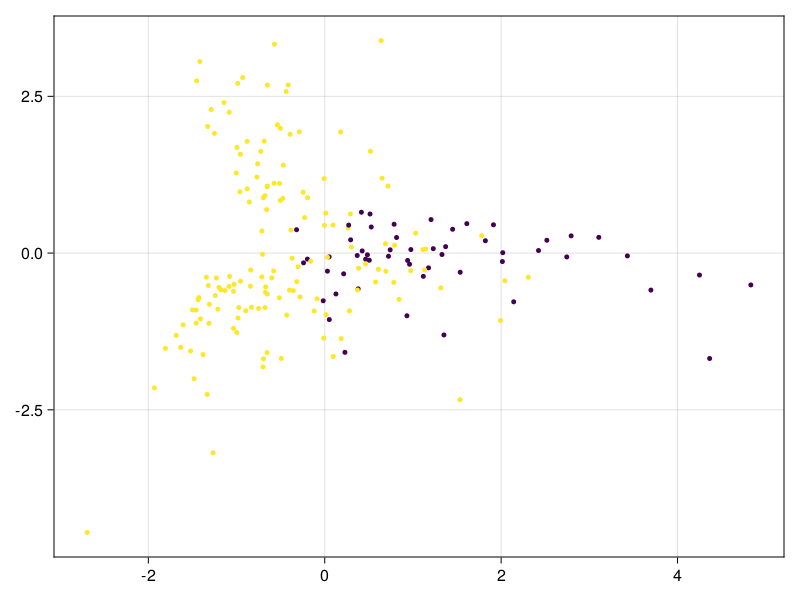

2×2 Matrix{Int64}:
 30  70
 24  76

0.53

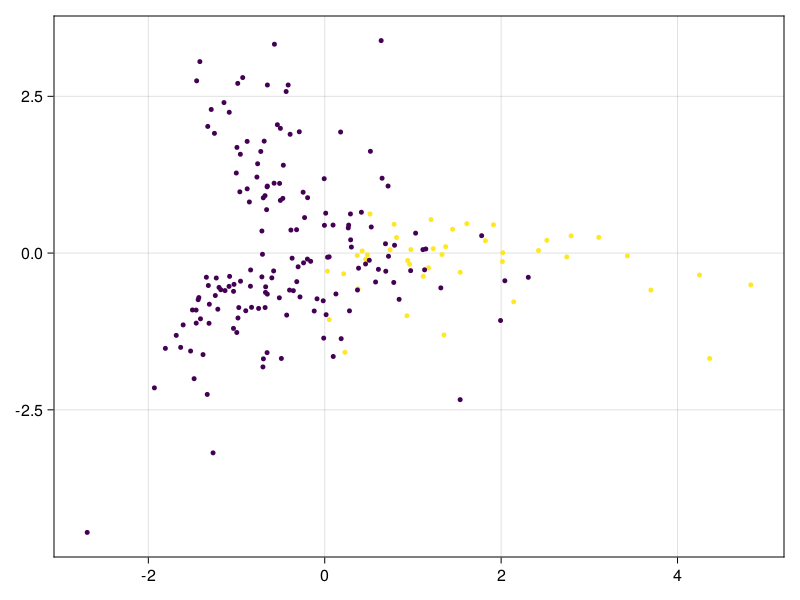

2×2 Matrix{Int64}:
 81  19
 77  23

0.52

True:1 and 7


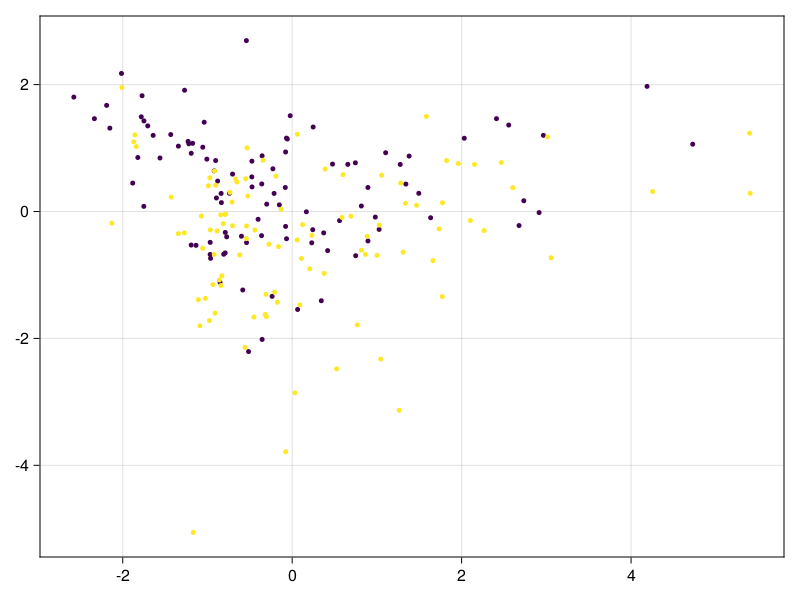

Predict:


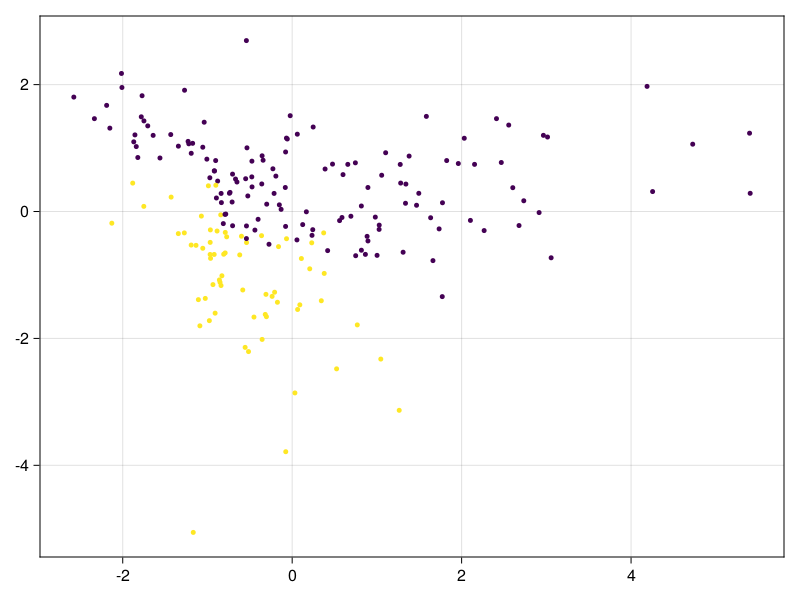

2×2 Matrix{Int64}:
 76  24
 59  41

0.585

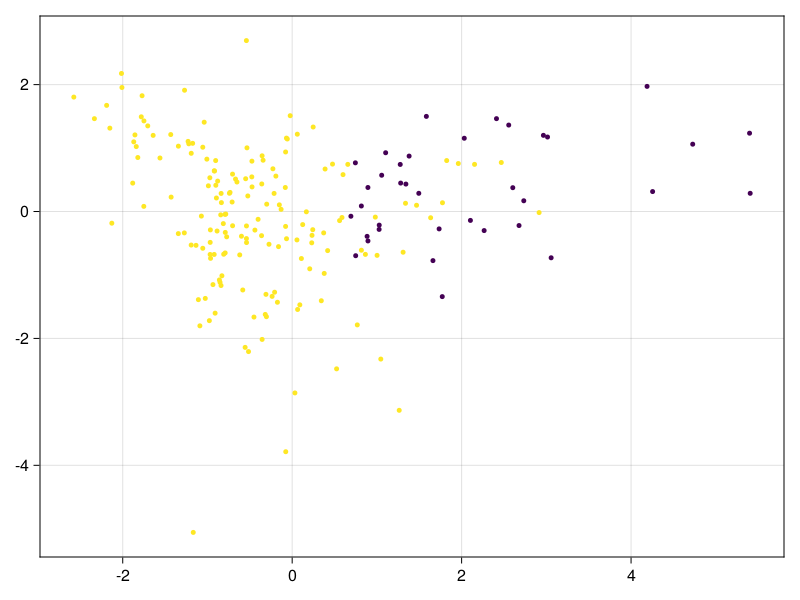

2×2 Matrix{Int64}:
 19  81
 17  83

0.51

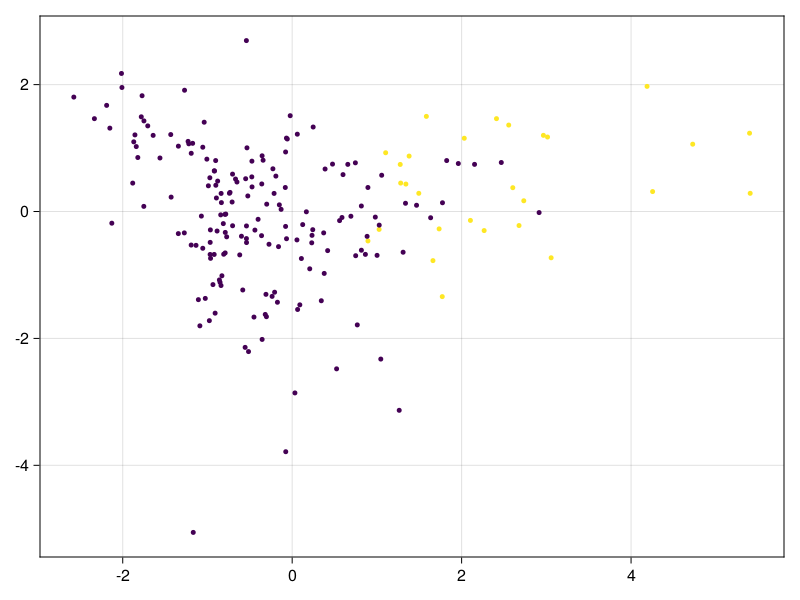

2×2 Matrix{Int64}:
 15  85
 13  87

0.51

True:1 and 8


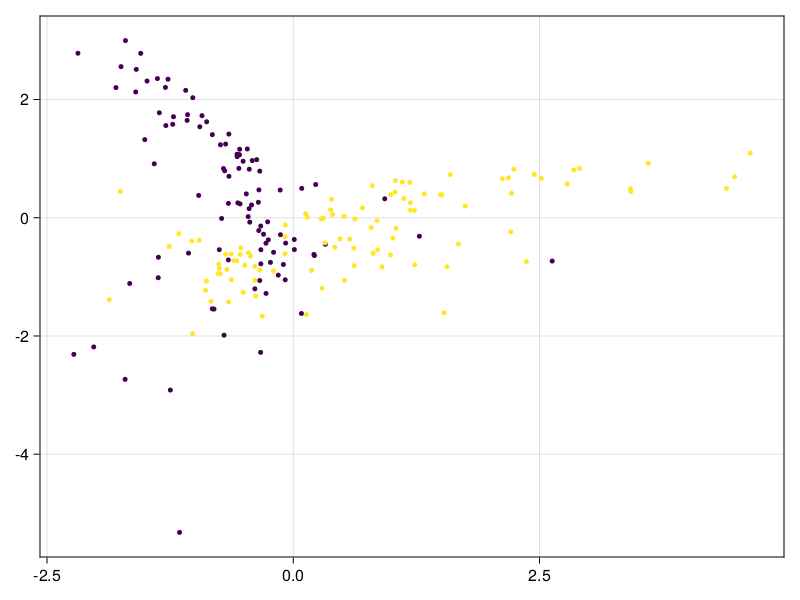

Predict:


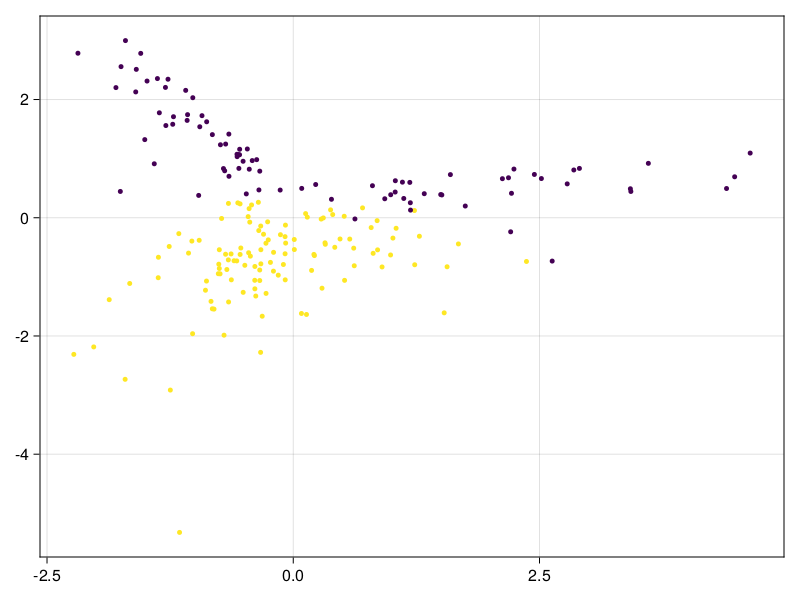

2×2 Matrix{Int64}:
 51  49
 33  67

0.59

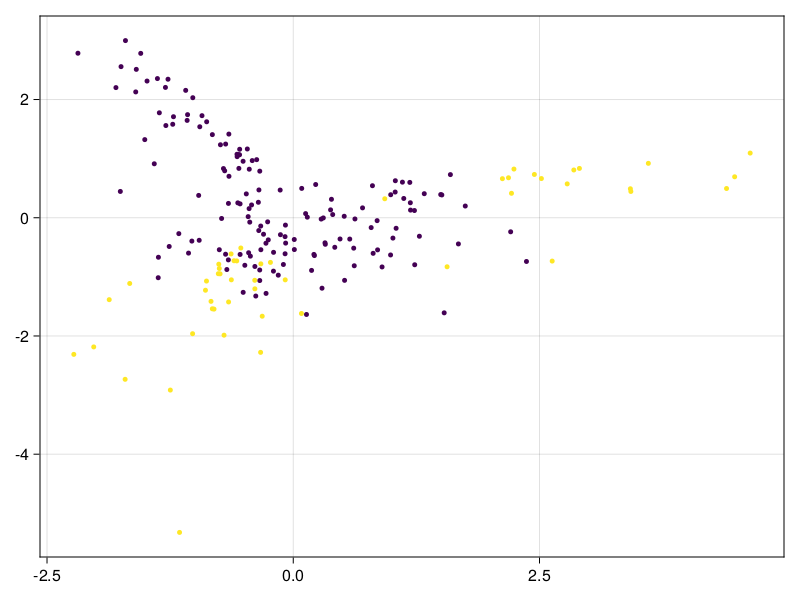

2×2 Matrix{Int64}:
 83  17
 67  33

0.58

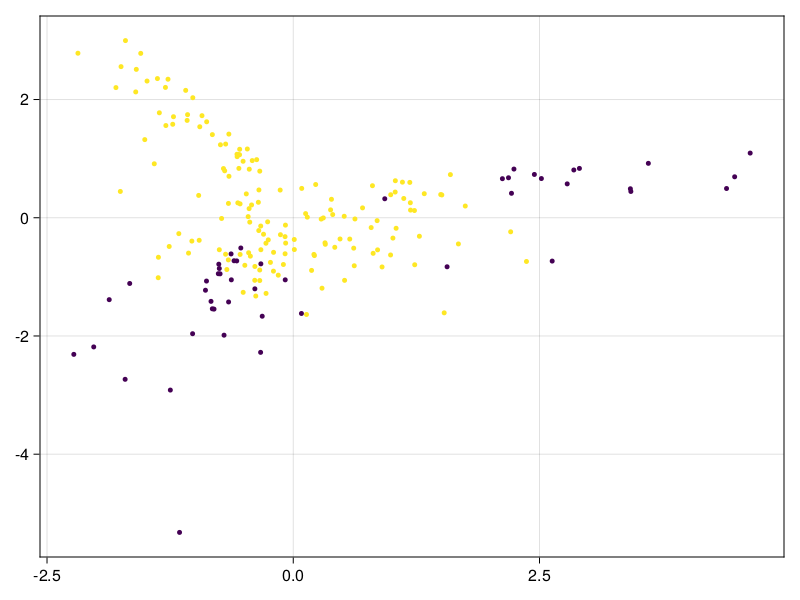

2×2 Matrix{Int64}:
 84  16
 68  32

0.58

True:1 and 9


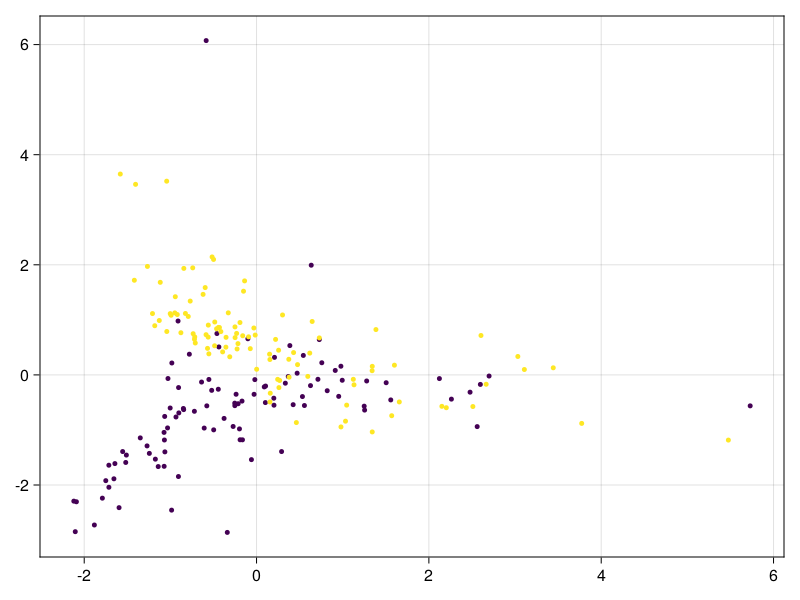

Predict:


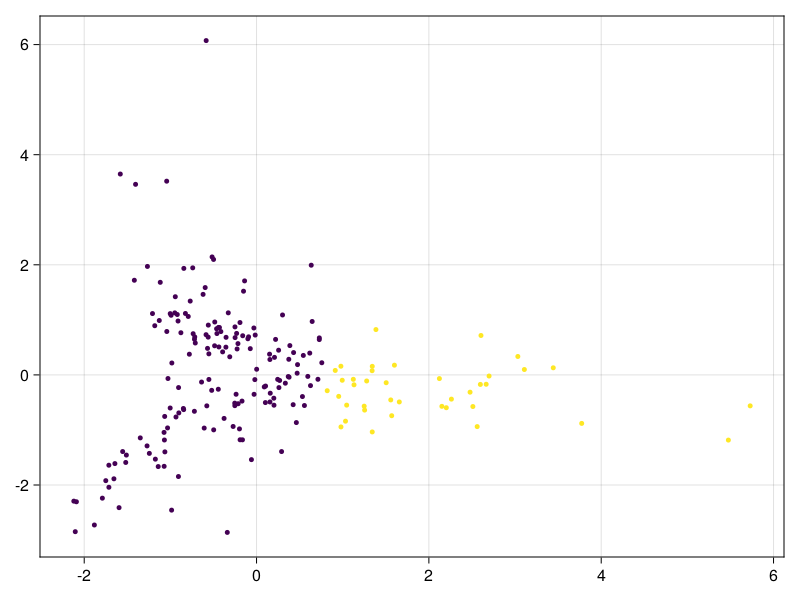

2×2 Matrix{Int64}:
 83  17
 78  22

0.525

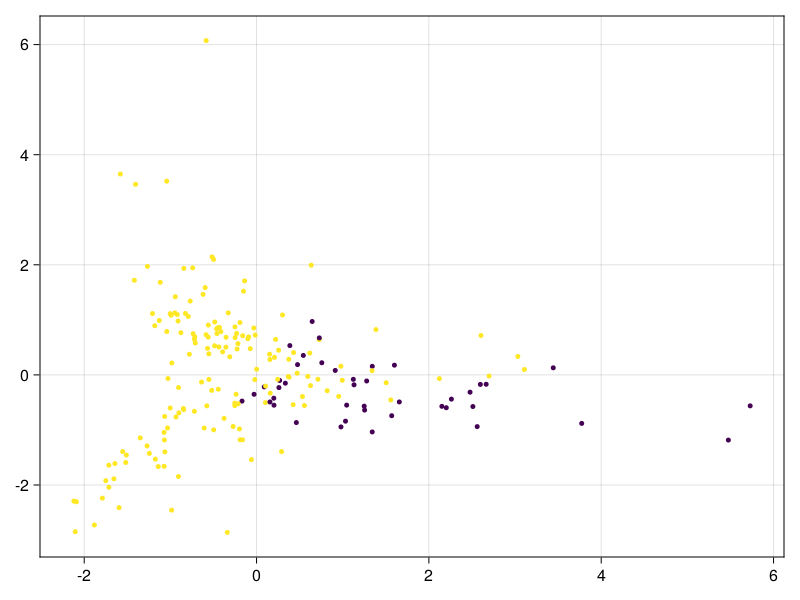

2×2 Matrix{Int64}:
 82  18
 76  24

0.53

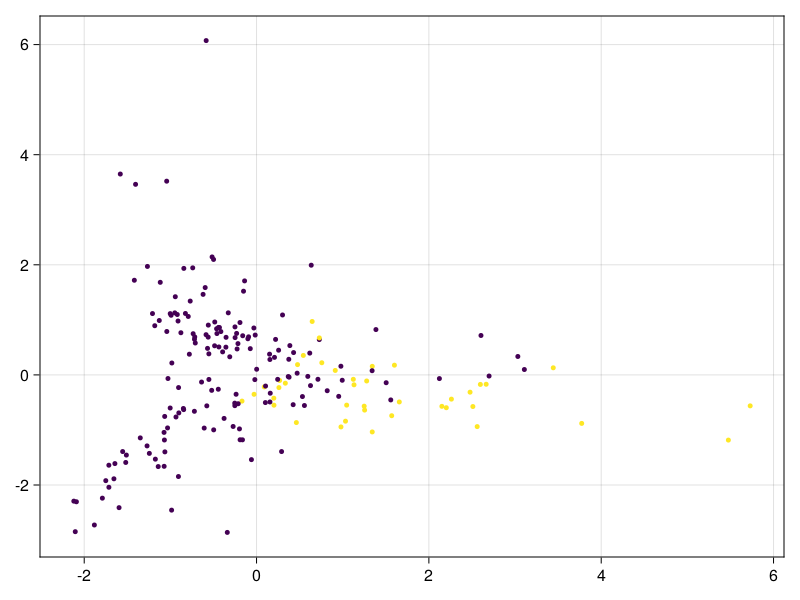

2×2 Matrix{Int64}:
 83  17
 77  23

0.53

True:1 and 10


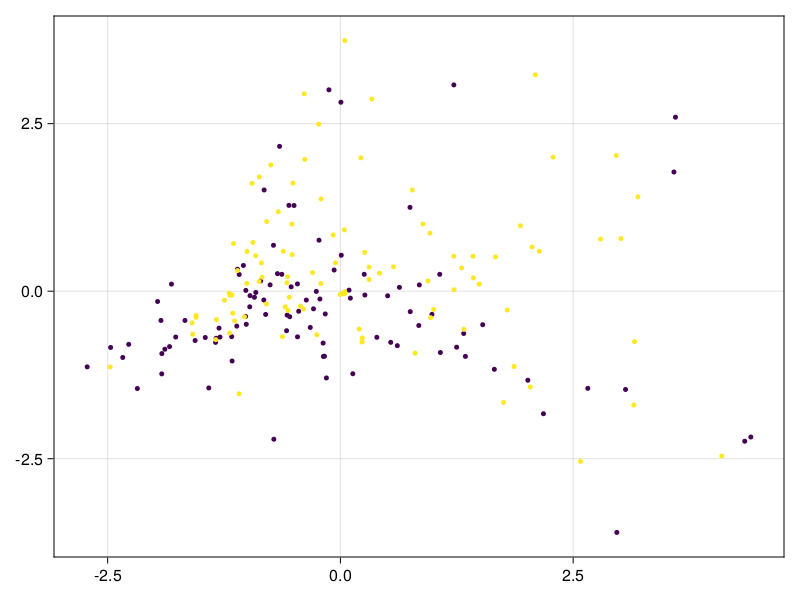

Predict:


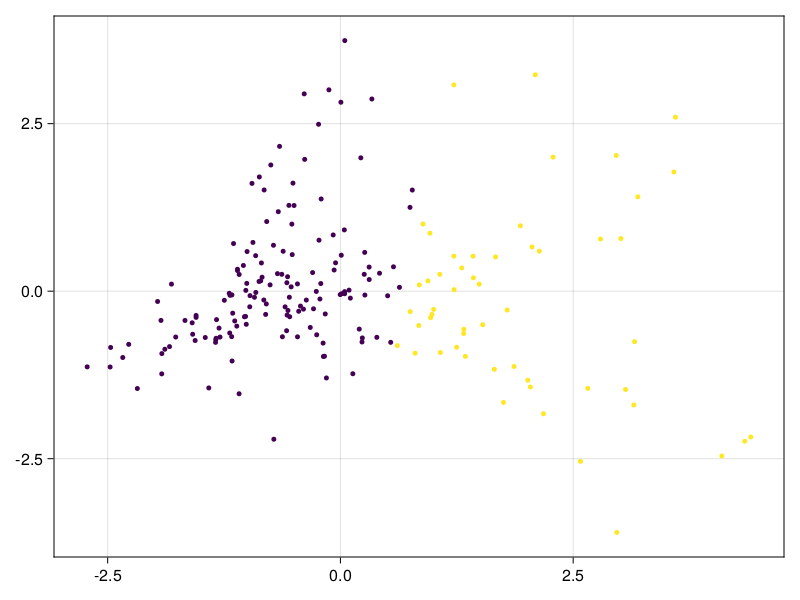

2×2 Matrix{Int64}:
 78  22
 69  31

0.545

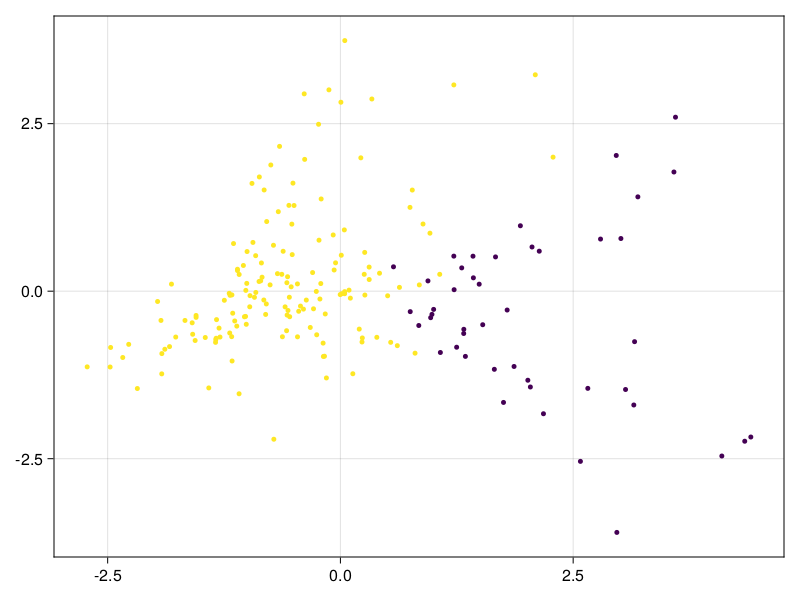

2×2 Matrix{Int64}:
 82  18
 73  27

0.545

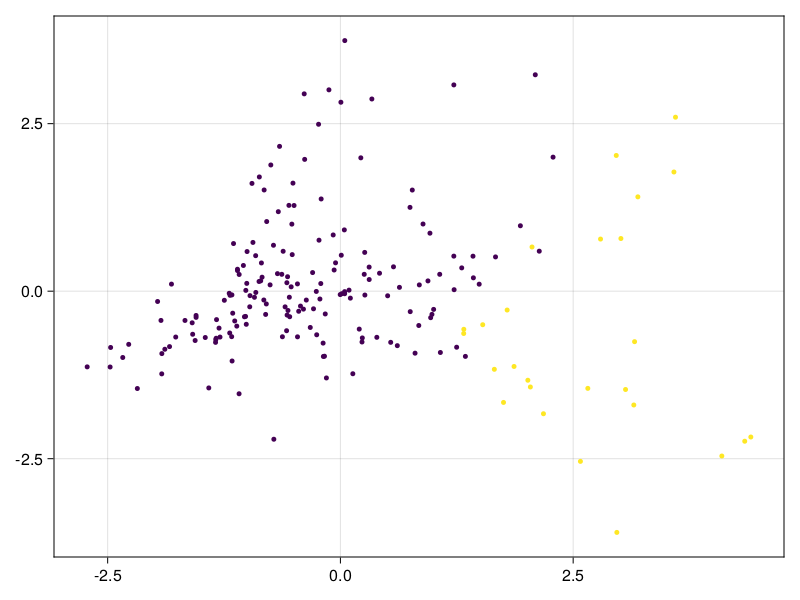

2×2 Matrix{Int64}:
 88  12
 86  14

0.51

True:1 and 11


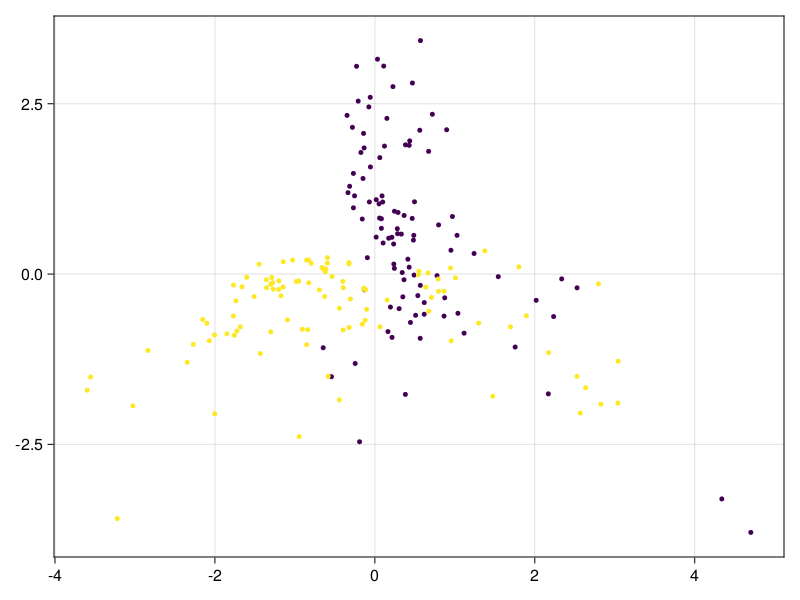

Predict:


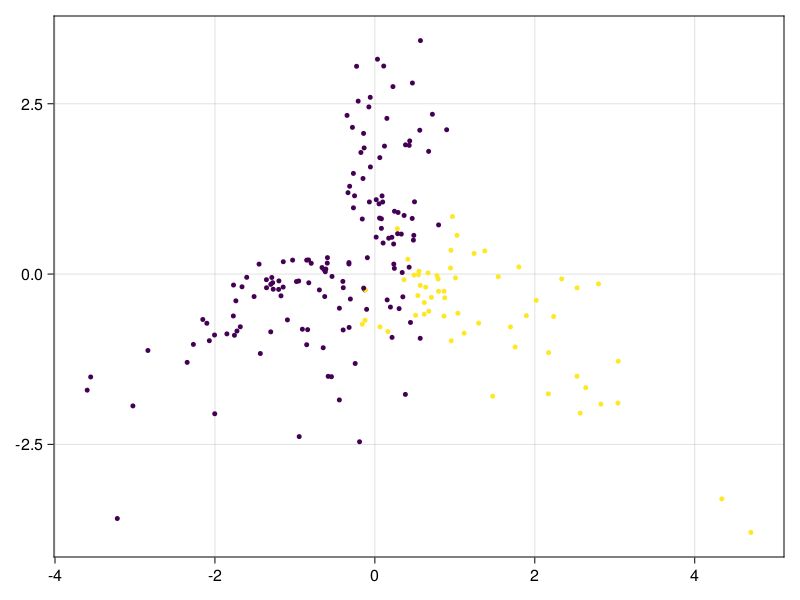

2×2 Matrix{Int64}:
 72  28
 70  30

0.51

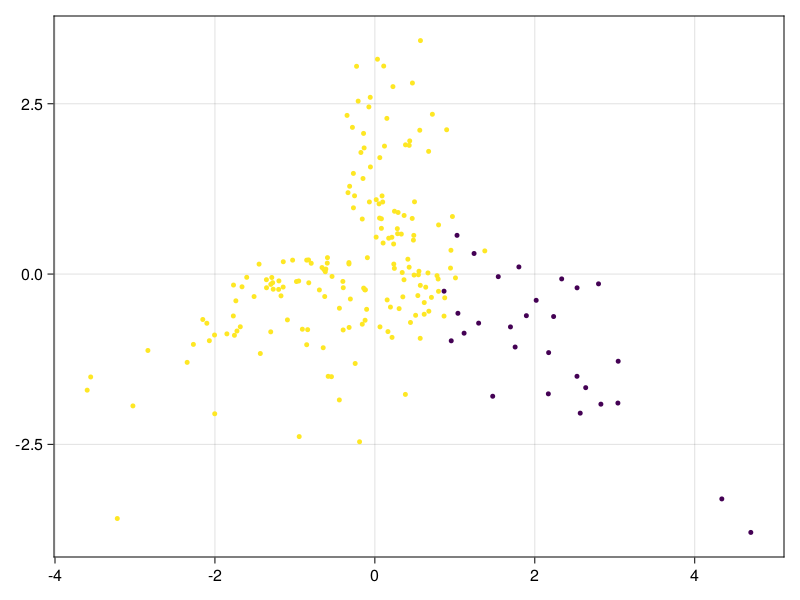

2×2 Matrix{Int64}:
 87  13
 85  15

0.51

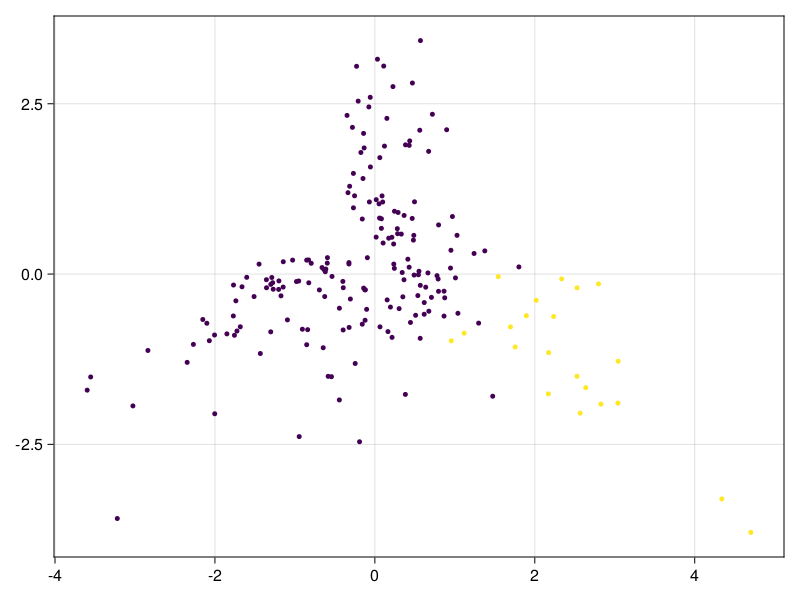

2×2 Matrix{Int64}:
 90  10
 89  11

0.505

True:1 and 12


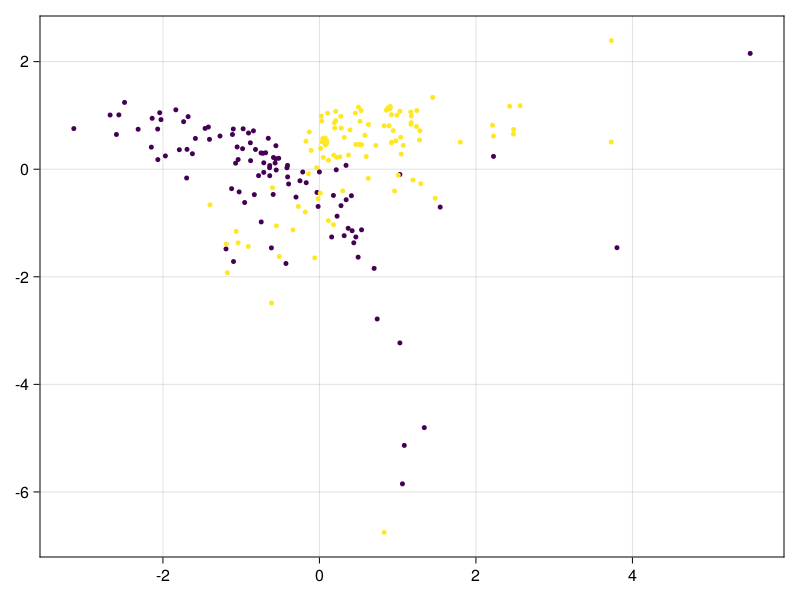

Predict:


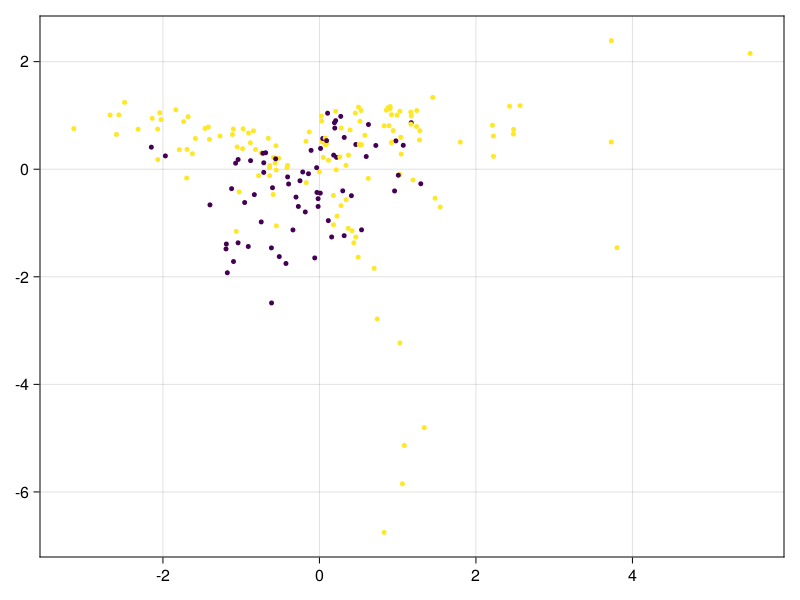

2×2 Matrix{Int64}:
 71  29
 60  40

0.555

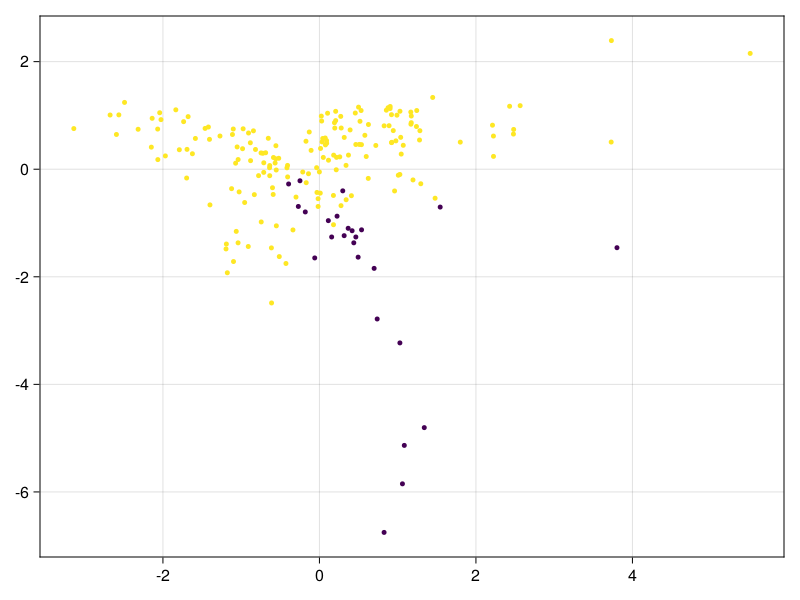

2×2 Matrix{Int64}:
 19  81
  6  94

0.565

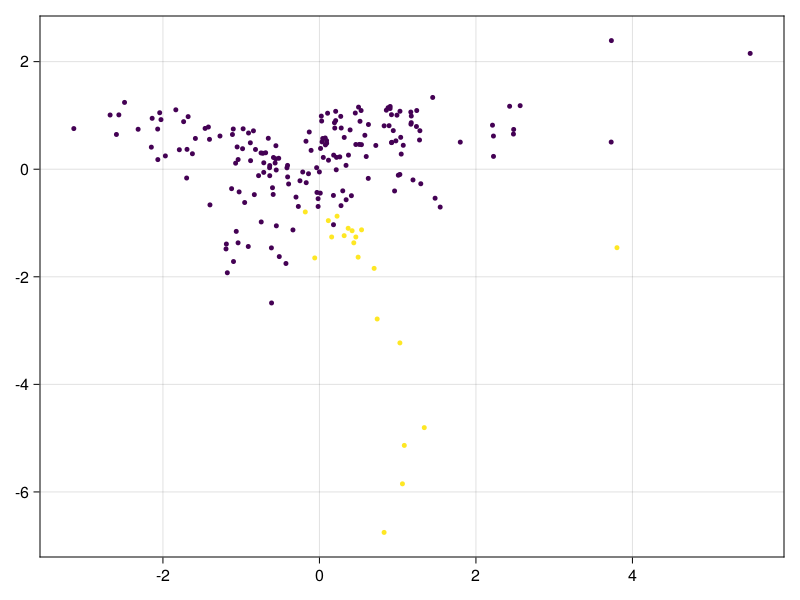

2×2 Matrix{Int64}:
 16  84
  4  96

0.56

True:1 and 13


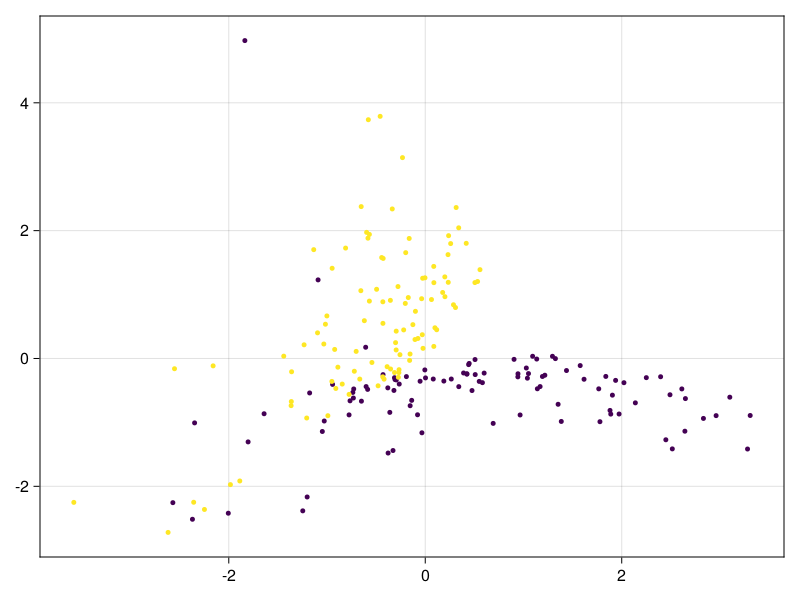

Predict:


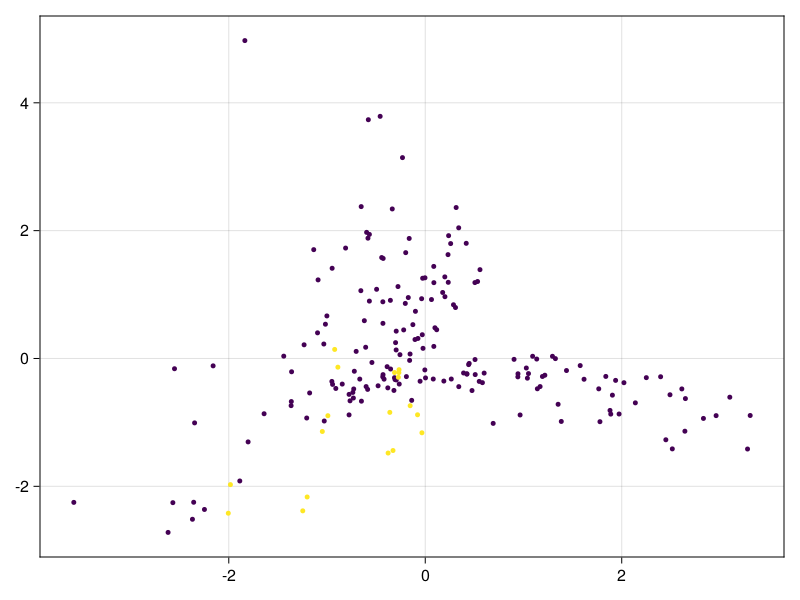

2×2 Matrix{Int64}:
 10  90
  8  92

0.51

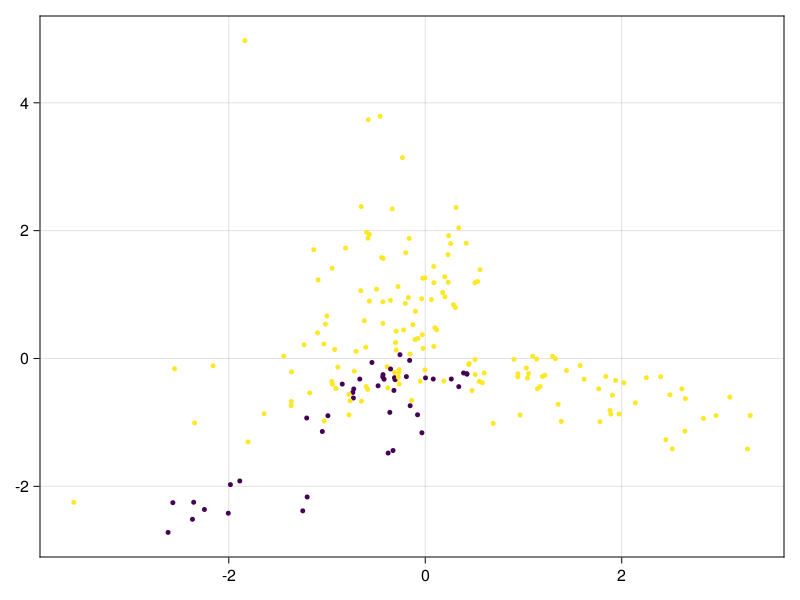

2×2 Matrix{Int64}:
 27  73
 16  84

0.555

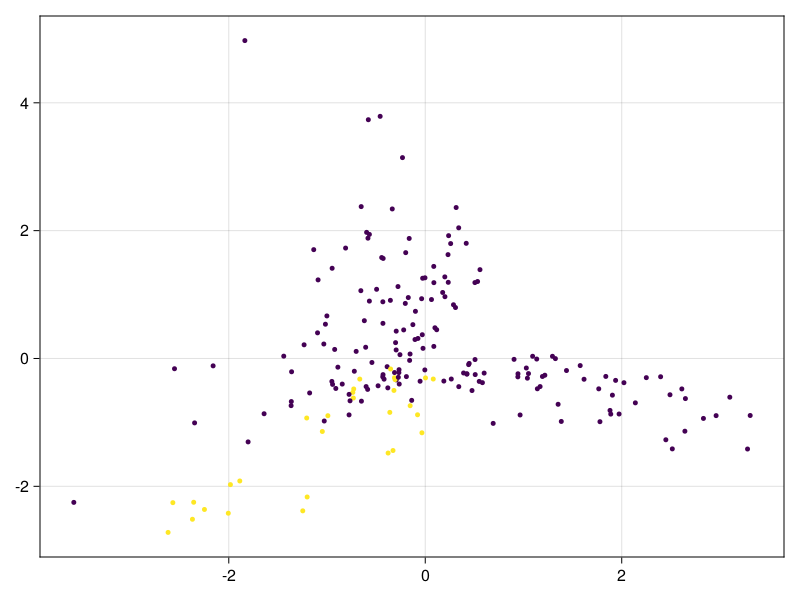

2×2 Matrix{Int64}:
 20  80
  9  91

0.555

True:1 and 14


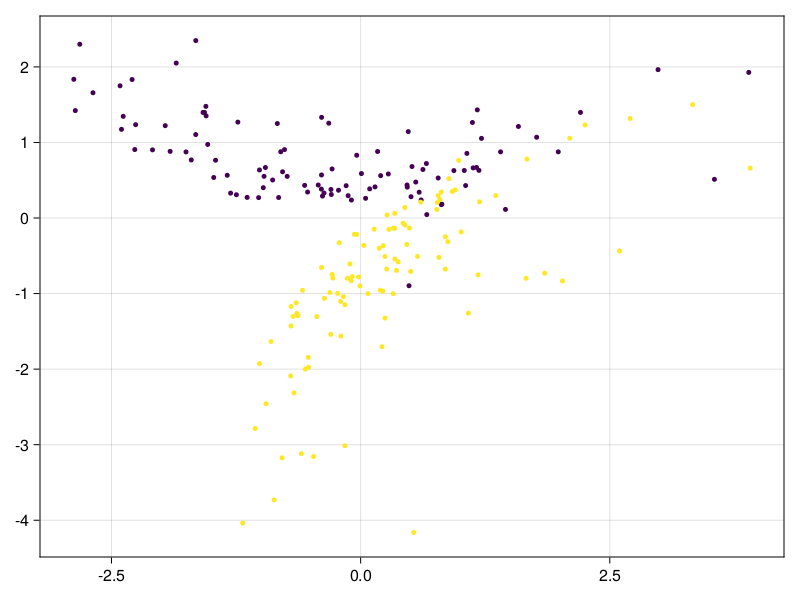

Predict:


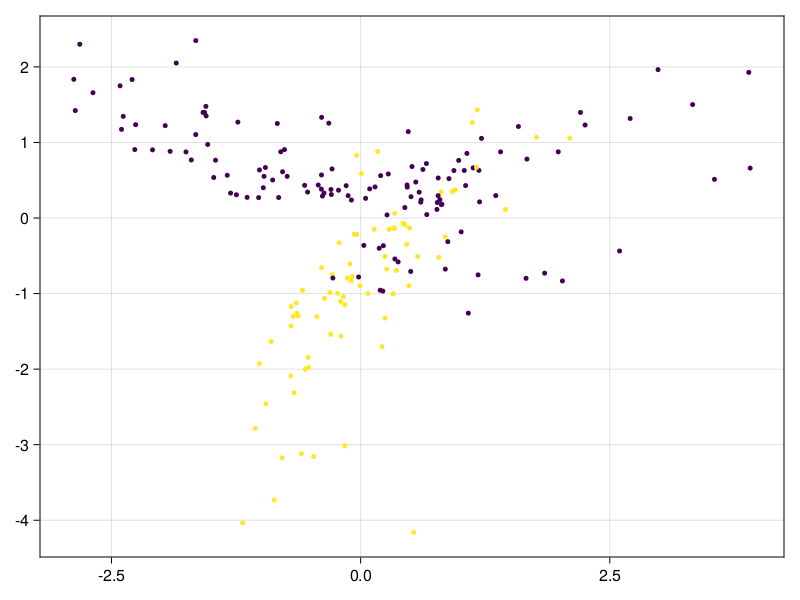

2×2 Matrix{Int64}:
 91   9
 35  65

0.78

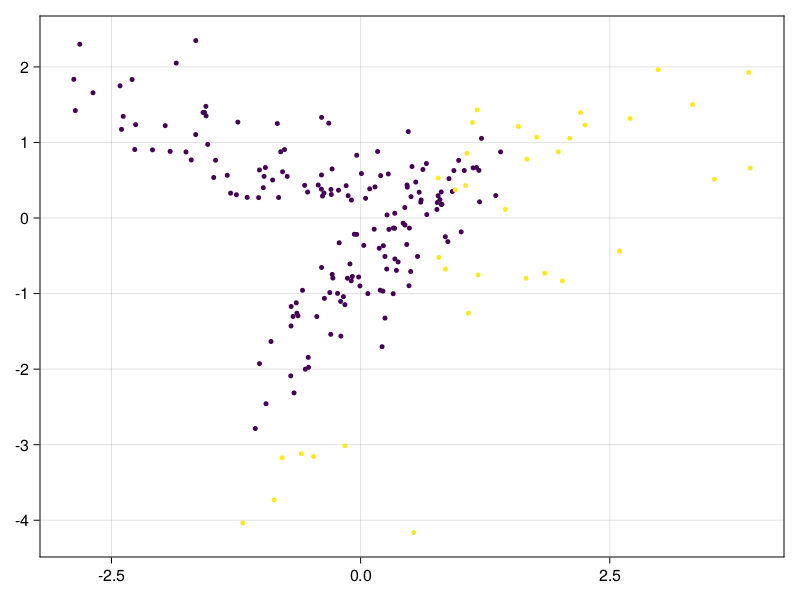

2×2 Matrix{Int64}:
 87  13
 78  22

0.545

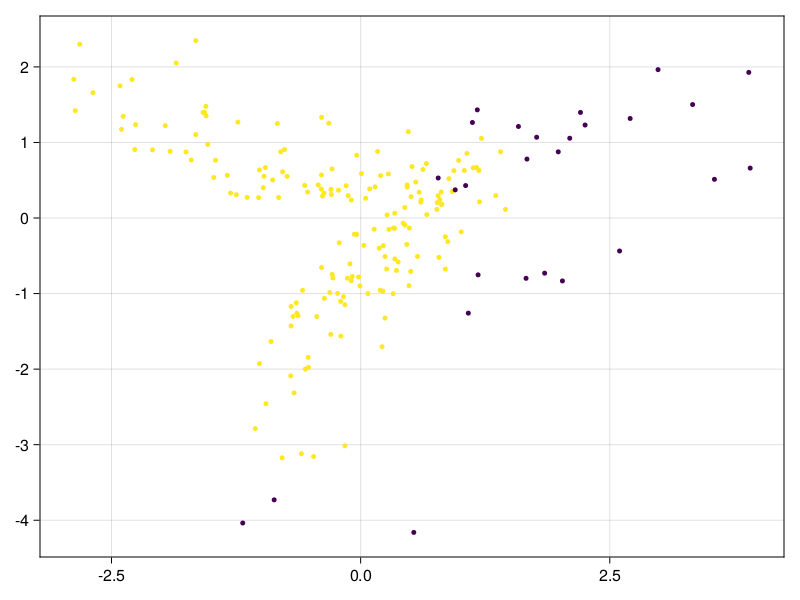

2×2 Matrix{Int64}:
 89  11
 84  16

0.525



In [84]:
@suppress_err begin
    fixed = trees[13]
    compared = copy(trees)
    compared = deleteat!(compared, 13)
    counter = 1
    for i in compared
        gt = ground_true(fixed,i)
        tree = vcat(fixed ,i)
        tree = standardize_tree(tree)

        print("True:")
        println(1, " and ",counter)   
        counter +=1
        display(plot_clusters(tree, gt))
        
        pred_kmeans = kmeans_label(tree, 2) 
        println("Predict:")
        display(plot_clusters(tree, pred_kmeans))
        m,x = accuracy(2, gt, pred_kmeans)
        display(m)
        print(x)

        pred_prob, pred_llpg = GMM_label(tree, 2, method = :split)
        display(plot_clusters(tree, pred_prob))
        m,x = accuracy(2, gt, pred_prob)
        display(m)
        print(x)

        display(plot_clusters(tree, pred_llpg))
        m,x = accuracy(2, gt, pred_llpg)
        display(m)
        println(x)
        println()
    end
end